In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PBA_Fetcher import PBA_Fetcher
from wordcloud import WordCloud, ImageColorGenerator
from sqlalchemy import create_engine
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score
from math import pi
from PIL import Image

In [2]:
fetcher = PBA_Fetcher()

In [5]:
fetcher.get_avg_player_team()

year conference   player_name team_name pos  j_number  height  weight  \
0     2017        GOV     L. Henton       ALA  SF       0.0    78.0   206.0   
1     2017        GOV     C. Abueva       ALA  PF       0.0    73.0     0.0   
2     2017        GOV      J. Casio       ALA   G       0.0    70.0     0.0   
3     2017        GOV   C. Banchero       ALA   G      22.0    74.0     0.0   
4     2017        GOV     V. Manuel       ALA   F       0.0    76.0   227.0   
...    ...        ...           ...       ...  ..       ...     ...     ...   
1417  2020         PH     R. Escoto       SMB   C       0.0    78.0   185.0   
1418  2020         PH      P. Zamar       SMB   G       0.0     0.0   215.0   
1419  2020         PH  R. Gamalinda       SMB   G       0.0    76.0     0.0   
1420  2020         PH   V. Pessumal       SMB   G       0.0    74.0   215.0   
1421  2020         PH     W. Comboy       SMB   G       0.0     0.0     0.0   

      ply_GP  ply_MIN  ...  tm_TO  tm_PTO  tm_PF  tm_FBm  tm_FBa  tm_FBm%  \
0         11    41.81  ...  15.64   17.64  22.27    7.18    8.18    11.91   
1          8    28.19  ...  15.64   17.64  22.27    7.18    8.18    11.91   
2         11    23.81  ...  15.64   17.64  22.27    7.18    8.18    11.91   
3         10    23.40  ...  15.64   17.64  22.27    7.18    8.18    11.91   
4          8    16.89  ...  15.64   17.64  22.27    7.18    8.18    11.91   
...      ...      ...  ...    ...     ...    ...     ...     ...      ...   
1417       1    11.52  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1418       1     4.52  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1419       1     5.57  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1420       1     9.65  ...  19.00   21.00  26.00    6.00    6.00    13.00   
1421       1     0.43  ...  19.00   21.00  26.00    6.00    6.00    13.00   

      tm_bPTS  tm_PTS  tm_W  tm_L  
0       36.73    94.0     3     8  
1       36.73    94.0     3     8  
2       36.73    94.0     3     8  
3       36.73    94.0     3     8  
4       36.73    94.0     3     8  
...       ...     ...   ...   ...  
1417    16.00    94.0     1     0  
1418    16.00    94.0     1     0  
1419    16.00    94.0     1     0  
1420    16.00    94.0     1     0  
1421    16.00    94.0     1     0  

[1422 rows x 58 columns]

In [15]:
fetcher.get_all()

year conference   player_name team_name pos  j_number  height  weight  \
0     2017        GOV     L. Henton       ALA  SF       0.0    78.0   206.0   
1     2017        GOV     C. Abueva       ALA  PF       0.0    73.0     0.0   
2     2017        GOV      J. Casio       ALA   G       0.0    70.0     0.0   
3     2017        GOV   C. Banchero       ALA   G      22.0    74.0     0.0   
4     2017        GOV     V. Manuel       ALA   F       0.0    76.0   227.0   
...    ...        ...           ...       ...  ..       ...     ...     ...   
1417  2020         PH     R. Escoto       SMB   C       0.0    78.0   185.0   
1418  2020         PH      P. Zamar       SMB   G       0.0     0.0   215.0   
1419  2020         PH  R. Gamalinda       SMB   G       0.0    76.0     0.0   
1420  2020         PH   V. Pessumal       SMB   G       0.0    74.0   215.0   
1421  2020         PH     W. Comboy       SMB   G       0.0     0.0     0.0   

      ply_GP_avg  ply_MIN_avg  ...  tm_TO_total  tm_PTO_total  tm_PF_total  \
0             11        41.81  ...        15.64         17.64        22.27   
1              8        28.19  ...        15.64         17.64        22.27   
2             11        23.81  ...        15.64         17.64        22.27   
3             10        23.40  ...        15.64         17.64        22.27   
4              8        16.89  ...        15.64         17.64        22.27   
...          ...          ...  ...          ...           ...          ...   
1417           1        11.52  ...        19.00         21.00        26.00   
1418           1         4.52  ...        19.00         21.00        26.00   
1419           1         5.57  ...        19.00         21.00        26.00   
1420           1         9.65  ...        19.00         21.00        26.00   
1421           1         0.43  ...        19.00         21.00        26.00   

      tm_FBm_total  tm_FBa_total  tm_FBm%_total  tm_bPTS_total  tm_PTS_total  \
0             7.18          8.18          11.91          36.73          94.0   
1             7.18          8.18          11.91          36.73          94.0   
2             7.18          8.18          11.91          36.73          94.0   
3             7.18          8.18          11.91          36.73          94.0   
4             7.18          8.18          11.91          36.73          94.0   
...            ...           ...            ...            ...           ...   
1417          6.00          6.00          13.00          16.00          94.0   
1418          6.00          6.00          13.00          16.00          94.0   
1419          6.00          6.00          13.00          16.00          94.0   
1420          6.00          6.00          13.00          16.00          94.0   
1421          6.00          6.00          13.00          16.00          94.0   

      tm_W_total  tm_L_total  
0            3.0         8.0  
1            3.0         8.0  
2            3.0         8.0  
3            3.0         8.0  
4            3.0         8.0  
...          ...         ...  
1417         1.0         0.0  
1418         1.0         0.0  
1419         1.0         0.0  
1420         1.0         0.0  
1421         1.0         0.0  

[1422 rows x 108 columns]

# Word Cloud Player Frequency

In [4]:
def display_wc_player_freq():
    """Show playername Wordcloud based on minutes"""
    # Get player frequency
    engine = create_engine('sqlite:///pba.db')
    with engine.connect() as conn:
        df_player_total_mins = pd.read_sql("""SELECT p.player_name, ts.`MIN`
                                                FROM player p
                                                INNER JOIN total_stat ts
                                                ON p.`index` = ts.player_id
                                            """,
                                           con=conn)
    engine.dispose()
    df_player_total_mins.MIN = (df_player_total_mins.MIN
                                .apply(lambda x: round(x)))
    df_player_total_mins['last_name'] = (df_player_total_mins.player_name
                                     .apply(lambda x: x.split('. ')[1]))
    # Sum total frequency per conference
    player_freq = (df_player_total_mins.groupby('last_name')
               .sum().squeeze().to_dict())
    pba_mask = np.array(Image.open('pba_logo_wc.png'))
    # Word Cloud
    wc = WordCloud(mask=pba_mask, random_state=40, relative_scaling=0, 
                  background_color="white", regexp=r'\b[a-zA-Z]+?\b',
                   repeat=False)

    wc.generate_from_frequencies(player_freq)

    image_colors = ImageColorGenerator(pba_mask)
    wc.recolor(color_func=image_colors)
    plt.figure(figsize=(20, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off');

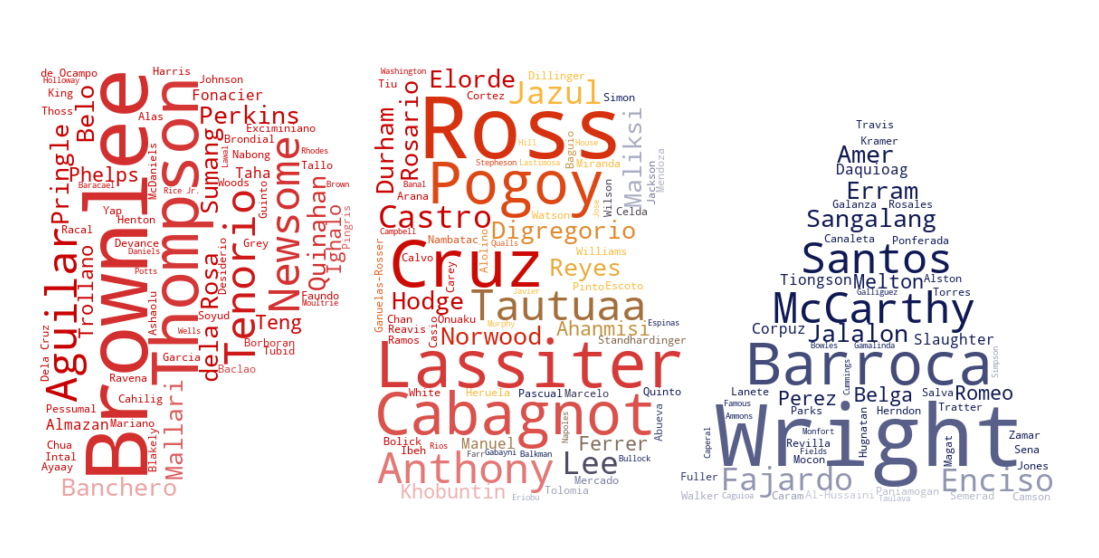

In [4]:
display_wc_player_freq()

# Hierarchical Clustering Team

In [25]:
def plot_variance(decomposition, title, ax, xlabel='SV'):
    """Plot latend"""
    var_exp = decomposition.explained_variance_ratio_
    ax.plot(range(1, len(var_exp)+1), var_exp, 'o-', label='individual')

    ax.set_xlim(0, len(var_exp)+1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('variance explained')
    ax = ax.twinx()
    ax.plot(range(1, len(var_exp)+1),
            var_exp.cumsum(), 'ro-', label='cumulative')
    ax.set_ylabel('cumulative variance explained')
    ax.set_xlim(1)
    ax.axhline(0.9, c='g', linestyle='dashed')
    ax.set_title(title)
    return ax


def plot_dendrogram(Z, ax):
    """Accepts output of linkage and plot dendogram"""
    res = dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_ylabel(r'$\Delta$')
    return ax


def plot_cluster(x, z, t, ax):
    """Accept linkage and plot clusters"""
    y_predict_ng = fcluster(z, t=t, criterion='distance')
    ax.scatter(x[:, 0], x[:, 1], c=y_predict_ng)
    ax.set_title(f'k={max(y_predict_ng)}, t={np.around(t, 3)}')
    return ax


def plot_pca(columns, weights, ax):
    """Plot SVD"""
    for col, vec in zip(columns, weights):
        ax.arrow(0, 0, 2*vec[0], 2*vec[1], width=0.01, ec='none', fc='r')
        ax.text(2*vec[0], 2*vec[1], col, ha='center', color='r', fontsize=18)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    return ax


def plot_svd_bar(columns, weights, ax):
    """Plot top SVD dominant features"""
    order = np.argsort(np.abs(weights))[-10:]
    ax.barh([columns[i] for i in order], weights[order])
    return ax


def purity(y_true, y_pred):
    """Compute the class purity

    Parameters
    ----------
    y_true : array
        List of ground-truth labels
    y_pred : array
        Cluster labels

    Returns
    -------
    purity : float
        Class purity
    """
    # YOUR CODE HERE
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    res = confmat.max(axis=0).sum() / np.sum(confmat)
    return res


def agglo_cluster_range(X, method, t_start, t_stop, actual):
    """
    Return a dictionary of the cluster labels, internal validation
    values and, if actual labels is given, external validation values,
    for every  𝑘.

    Parameters
    ----------
    X : matrix
        design matrix
    method : str
         linkage method
    t_start : int
        start of threshold
    t_stop : int
        stop of threshold
    actual : array
        actual labels

    Returns
    -------
    cluster_range : dictionary
        Cluster range
    """
    ys = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    last_k = 0
    for t in np.linspace(t_start, t_stop, 12):
        z = linkage(X, method=method, optimal_ordering=True)
        y = fcluster(z, t, criterion='distance')
        new_k = len(set(y))
        if last_k == new_k:
            continue

        last_k = new_k
        ps.append(purity(actual, y))
        amis.append(adjusted_mutual_info_score(actual, y))
        ars.append(adjusted_rand_score(actual, y))
    res = dict(
        ps=ps,
        amis=amis,
        ars=ars
    )
    return res


def plot_external(ps, amis, ars, ax):
    """Plot external validation values"""
    ks = np.arange(len(ps) + 1, 1, -1)
    ax.plot(ks, ps[::-1], '-o', label='PS')
    ax.plot(ks, amis[::-1], '-ro', label='AMI')
    ax.plot(ks, ars[::-1], '-go', label='AR')
    ax.set_xlabel('$k$')
    ax.set_ylabel('PS/AMI/AR')
    ax.legend()
    return ax


def plot_radar(df_radar, ax, color):
    """PLot radar plot"""
    df_radar.iloc[:, 1:] -= df_radar.iloc[:, 1:].min()
    df_radar.iloc[:, 1:] /= df_radar.iloc[:, 1:].max()
    df_radar.iloc[:, 1:] *= 100
    # number of variable
    categories = list(df_radar)[1:]
    N = len(categories)
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # What will be the angle of each axis in the plot?
    # (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot

    # Draw one axe per variable + add labels labels yet
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories,
                       fontdict={'fontsize': 16, 'fontweight': 'bold'})
    ax.set_yticks([20, 40, 60, 80])
    ax.set_yticklabels(["20", "40", "60", "80"])

    ax.tick_params(direction='out', length=6, width=2, colors='grey',
                   grid_color='grey', grid_alpha=0.5, size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    ax.set_ylim(0, 100)

    for i, df in df_radar.groupby('cluster'):
        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values = df.mean(0).drop('cluster').values.flatten().tolist()
        values += values[:1]

        # Plot data
        ax.plot(angles, values, linewidth=2, linestyle='solid',
                color=color[i-1], label=f'Group {i}')

        # Fill area
        ax.fill(angles, values, color[i-1],
                alpha=0.3, color=color[i-1])

    return ax

## Average Player Statistics By Conference

In [26]:
df_avg_player = fetcher.get_avg_player()
df_avg_player = df_avg_player.loc[df_avg_player.year.astype(int) < 2020]

### All average player statistics

In [27]:
feature_raw = df_avg_player.drop(['year', 'conference', 'player_name',
                                  'team_name', 'pos', 'j_number'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player.pos)
target = lbl_enc.transform(df_avg_player.pos)

#### Explore Dimensionality Reduction

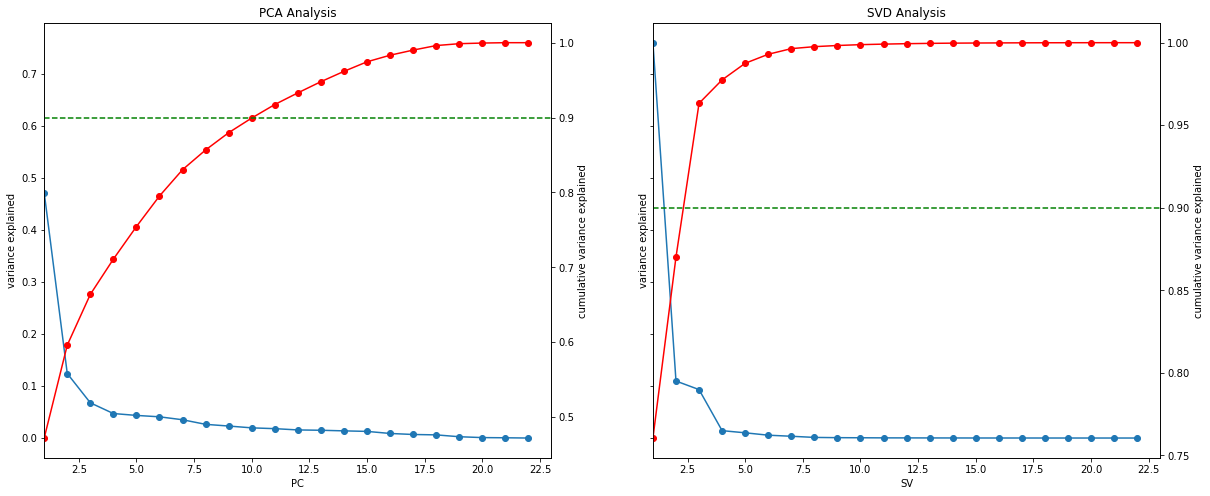

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 97% cumulative explained variance with just four components where using PCA needed nine components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [29]:
svd_avg = TruncatedSVD(2).fit(feature)
feature_new = svd_avg.transform(feature)

In [30]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

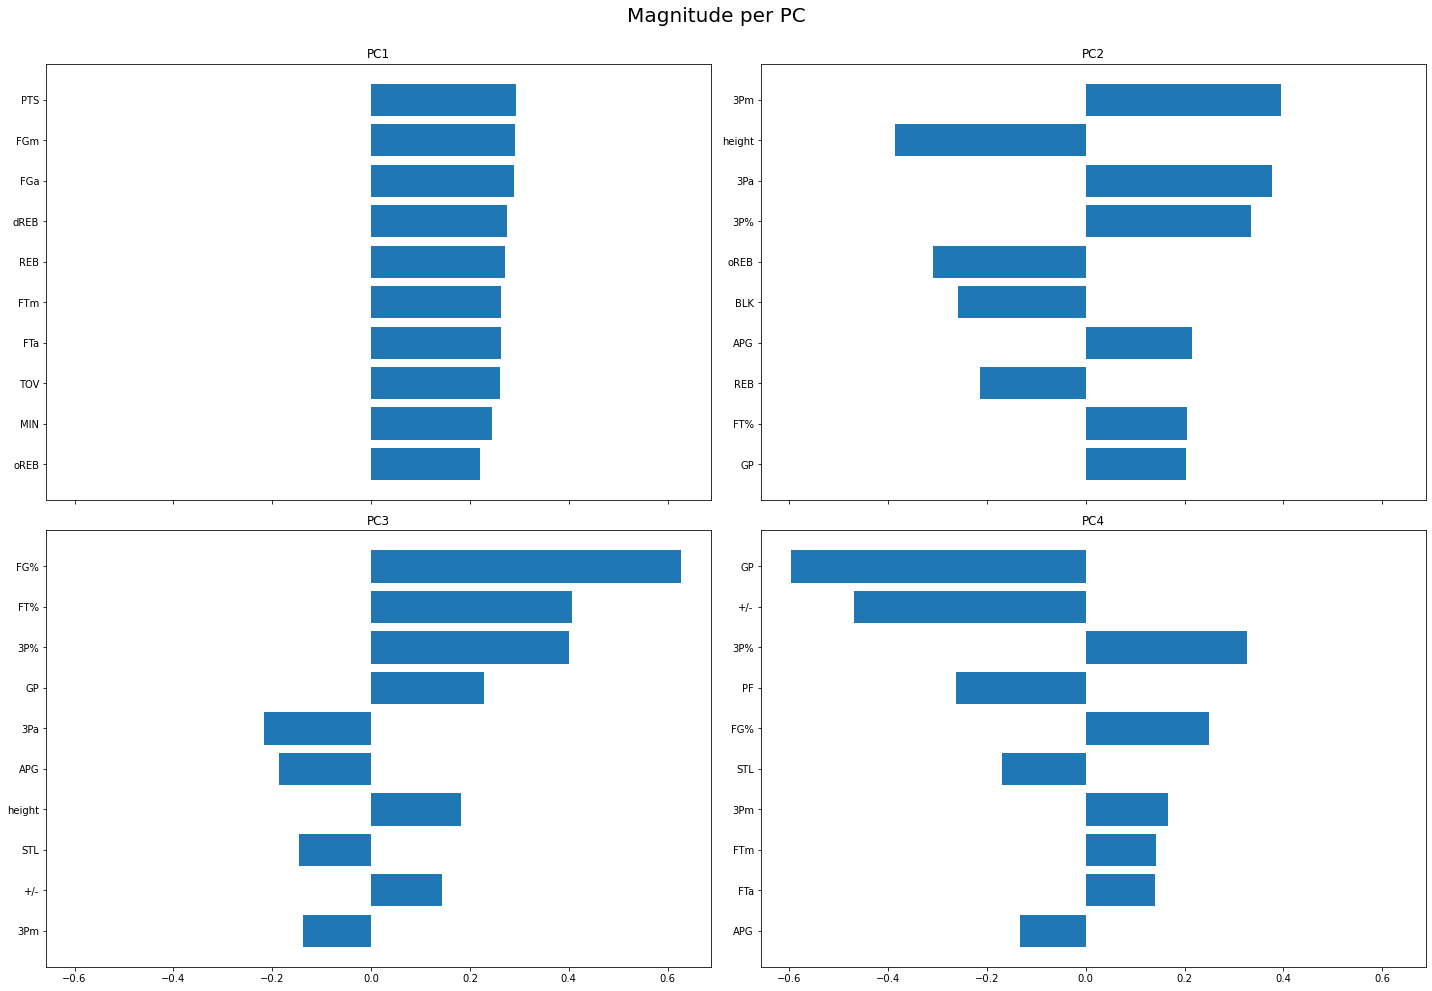

In [31]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that average points, field goals made, three-points made, and height are among the top features of Principal components 1 and 2. We can infer that most of the features dominant in PC1 are offensive attributes, while the majority dominant features in PC2 relates to defense.

#### Ward's Method

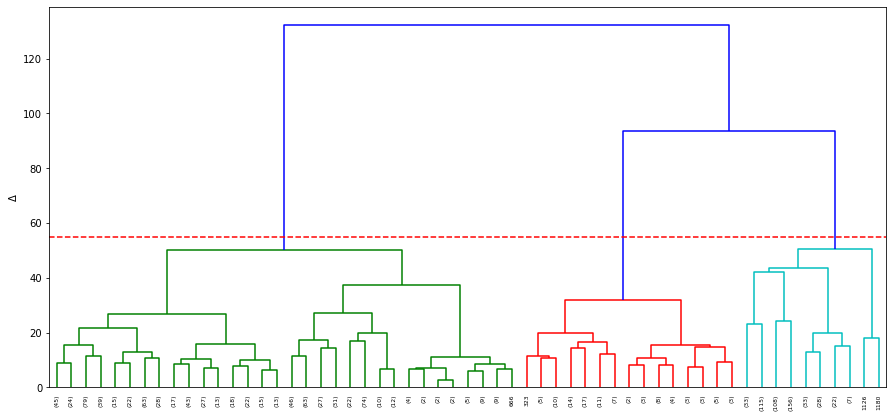

In [32]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(55, c='r', linestyle='dashed');

#### Single Linkage Method

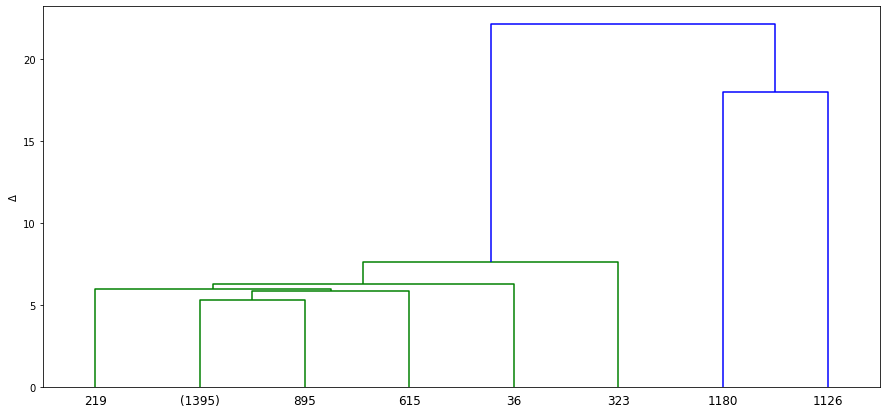

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

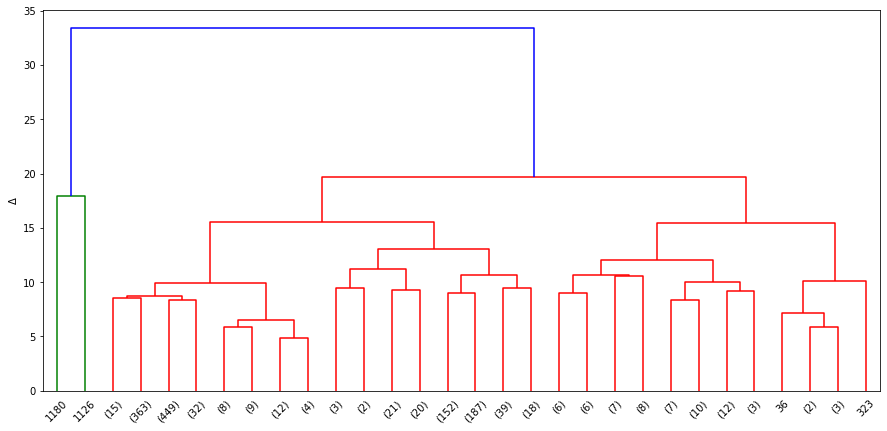

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(45, c='r', linestyle='dashed');

#### Average Linkage Method

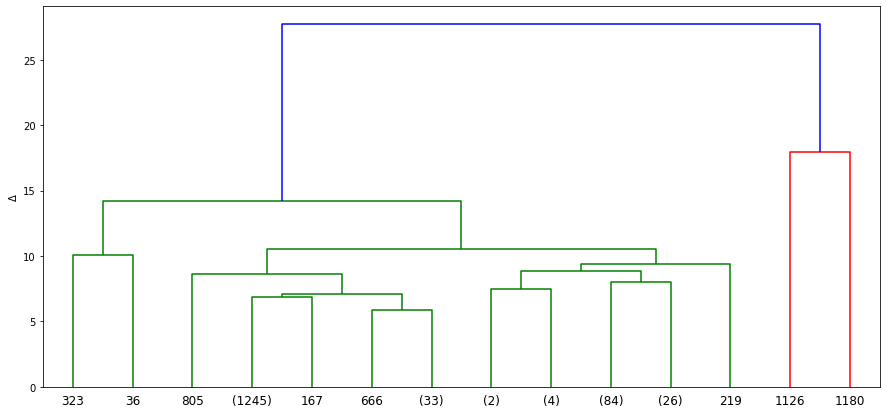

In [35]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

##### Choosing the right threshold

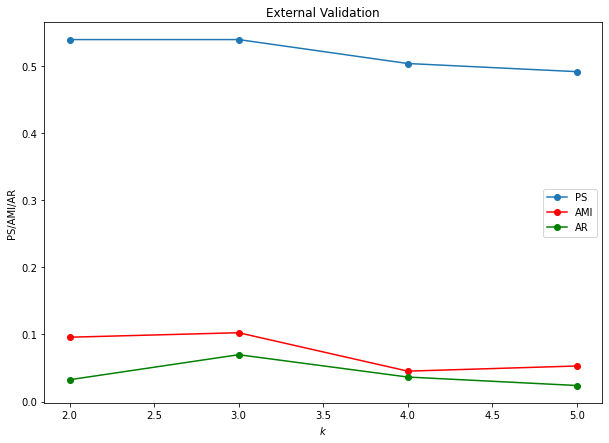

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=40, t_stop=55, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into three groups with the highest distance for every cluster, whereas other methods failed to do so. In validating the clusters with position of each player, we can infer that 3 cluster is the ideal number of groups since it has the highest adjusted mutual information and adjusted rand index.

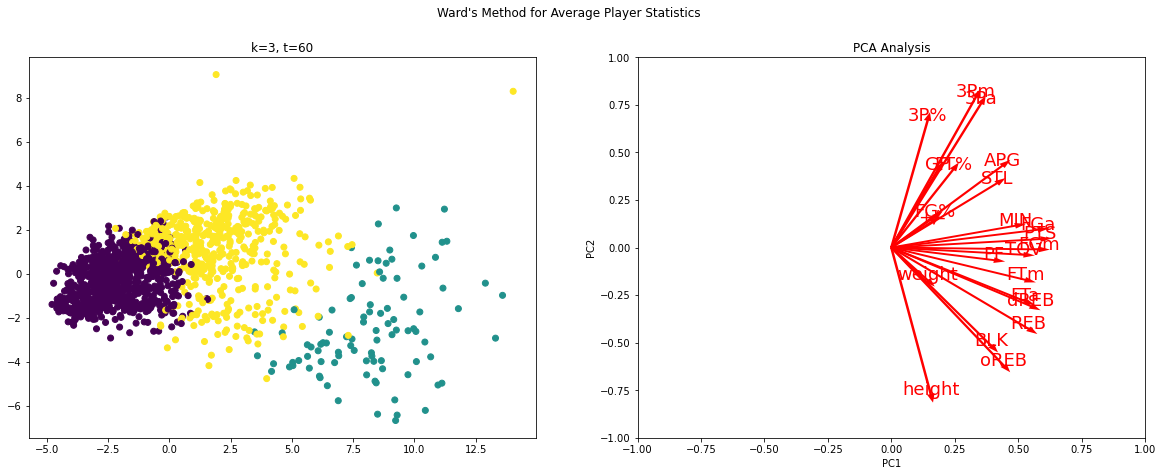

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 60, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics");

Observing the PC1 and PC2 of the decomposed dataset, we can find that the most dominant feature in PC2 is the three-point percentage, attempted, made, and height. While the most dominant feature in PC1 is the average points, field goals attempted and made. Upon further examining the plot above, we infer that offensive players that excel with three-point shots most probably not excel in height or defense attributes like block and rebounds.

In [74]:
y_cluster = fcluster(Z_ward, t=60, criterion='distance')
df_avg_player_cluster = df_avg_player.copy()
df_avg_player_cluster['cluster'] = y_cluster

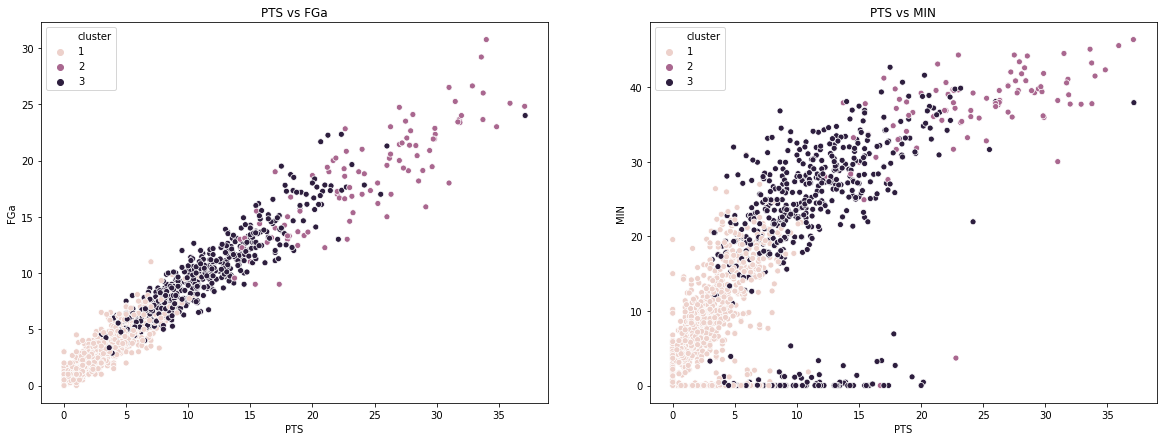

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_cluster, ax=ax1)

ax2.set_title('PTS vs MIN')
sns.scatterplot(x='PTS', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_cluster, ax=ax2)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are benchwarmers or defensive players. While players who belong in group 2 have high field goal attempts and points made are a imports and offensive players.  Upon further investigation, we can see that the identified imports in cluster 2 have the longest playing time in the court. In contrast, players who are identified benchwarmers have the shortest time in the court.

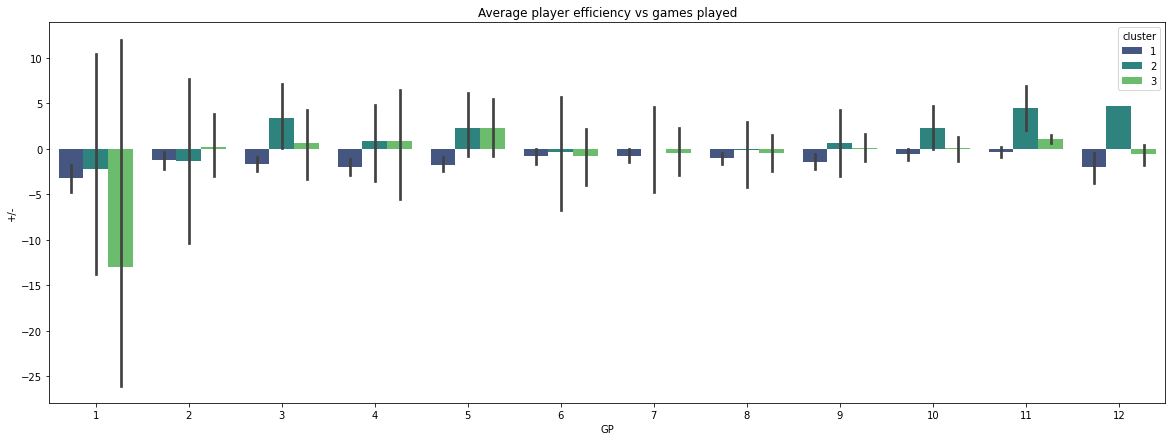

In [22]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_cluster)
plt.title('Average player efficiency vs games played')
plt.show()

Based on the plot above, we can see that players who have a few numbers of games played have low-performance efficiency. Although the number of games played by the player increases, we can see an improvement in player efficiency from 3 to 5, although with a sudden decrease for 6 to 9 games. The player efficiency increases again for those who have played 10 to 12 games. Based on these results, we can infer that teams with great players having high offensive and defensive attributes have the highest number of games. Teams with such players are not eliminated in the early round, thus a higher chance of becoming champions. In contrast, teams with players with negative player efficiency (High number of missed field goals and free throws, and turnover) tend to be eliminated at the start of the season. We can also see that players with the highest player efficiency belong in group 2 identified as imports.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

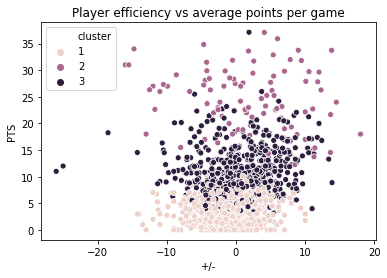

In [20]:
ax = sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                     data=df_avg_player_cluster)
ax.set_title('Player efficiency vs average points per game');

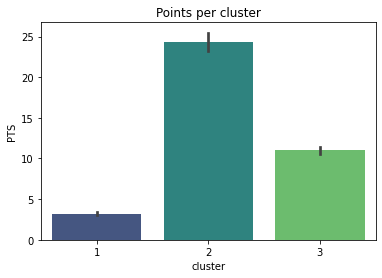

In [21]:
ax = sns.barplot(x='cluster', y='PTS', data=df_avg_player_cluster,
                 palette='viridis', estimator=np.mean)
ax.set_title('Points per cluster');

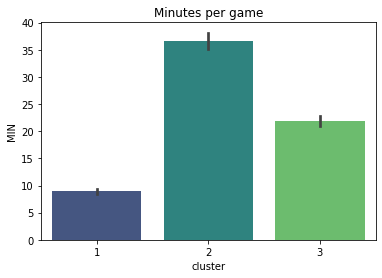

In [22]:
ax = sns.barplot(x='cluster', y='MIN', data=df_avg_player_cluster,
                 palette='viridis', estimator=np.mean)
ax.set_title('Minutes per game');

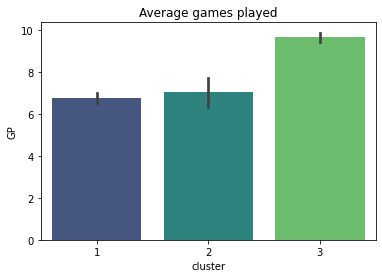

In [23]:
ax= sns.barplot(x='cluster', y='GP', data=df_avg_player_cluster,
            palette='viridis', estimator=np.mean)
ax.set_title('Average games played');

#### Radar plot

In [ ]:
df_avg_player_cluster

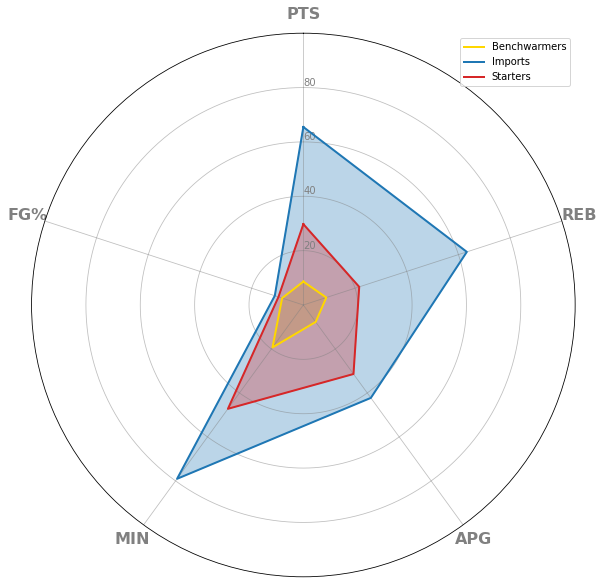

In [24]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_cluster[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['gold', 'tab:blue', 'tab:red'])
plt.legend(['Benchwarmers', 'Imports', 'Starters']);

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, minutes player, and field goal percentage of each player. Players that have been identified as benchwarmers can bee seen with the lowest attributes. Benchwarmer players' highest attribute is the MIN, 20% average minutes per game, compared to other clusters, points are still quite small. The second clustered group we have identified are starter players. These players have a higher skill set than benchwarmers, thus having a longer time is spent in the court. Although imports have the highest skillset over all the other groups, the change in the field goal percentage of starters and imports is not significant. There is a 40% gap in rebounds between imports and starters, which is a huge jump. We can tell that import players dominate other players in terms of rebounding. Since these players have the highest skill set, they play 80% of the time, which is considered the longest.

### Average Player Statistics Governor's Cup

In [37]:
m1 = df_avg_player.conference == 'GOV'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_gov = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_gov.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_gov.pos)
target = lbl_enc.transform(df_avg_player_gov.pos)

#### Explore Dimensionality Reduction

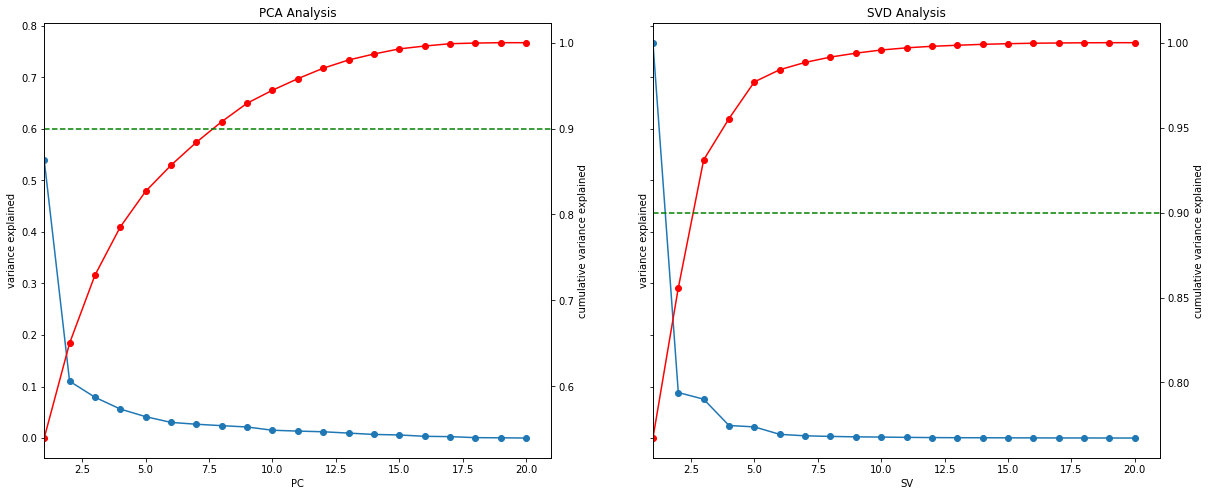

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 93% cumulative explained variance with just three components where using PCA needed seven components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [39]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

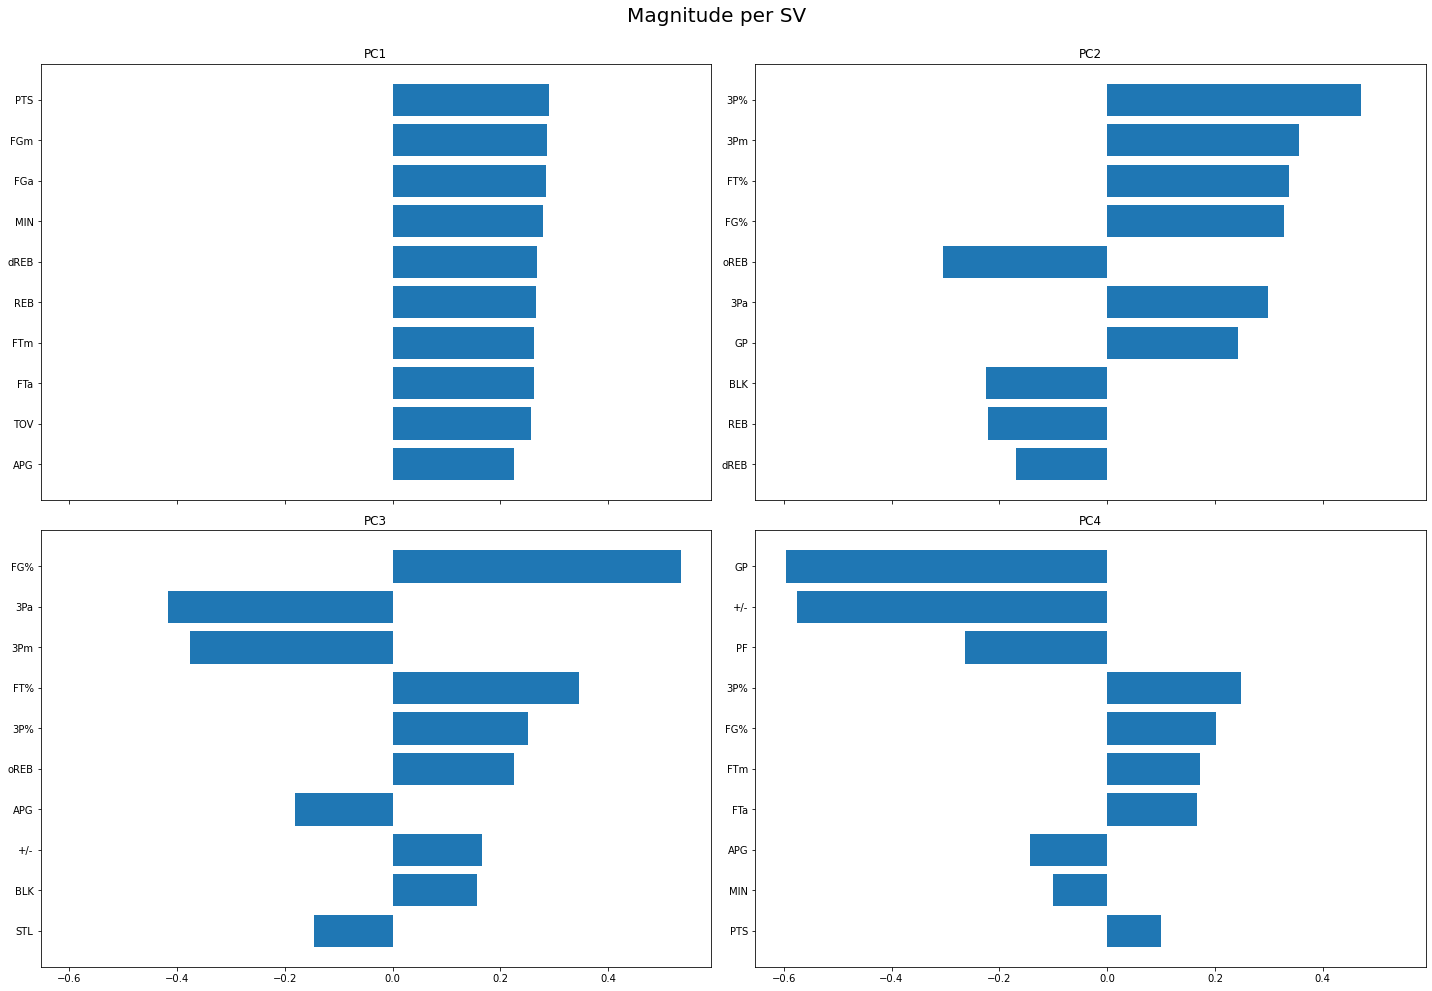

In [40]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per SV', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that average points, field goals made, 3-points made, and 3-point% are among the top features of Principal components 1 and 2.

#### Ward's Method

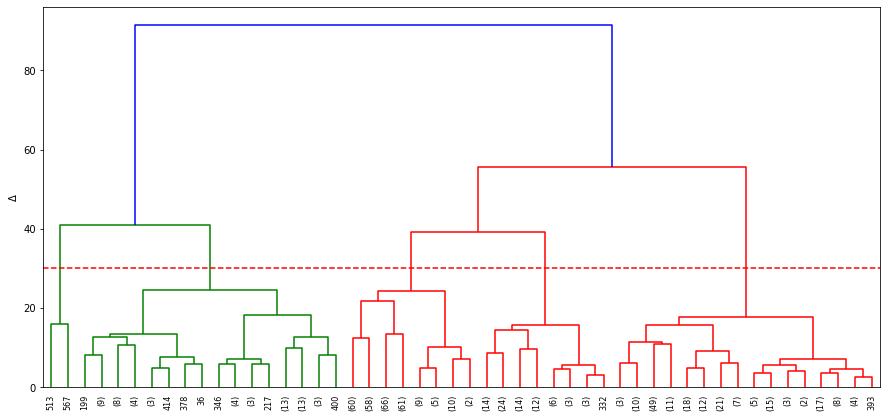

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(30, c='r', linestyle='dashed');

#### Single Linkage Method

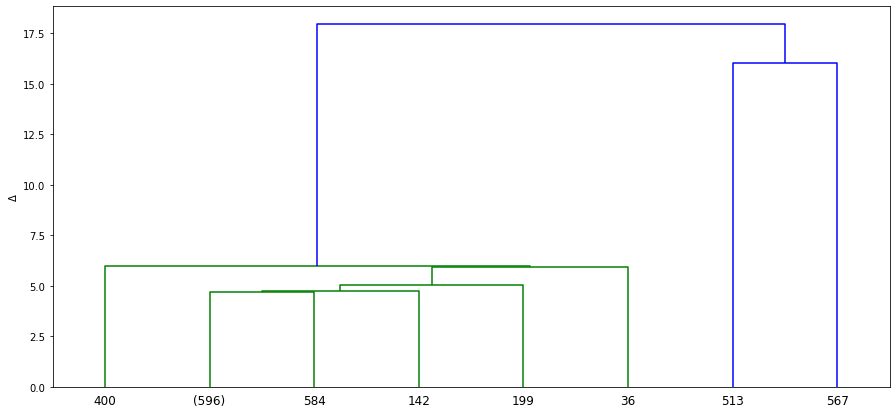

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

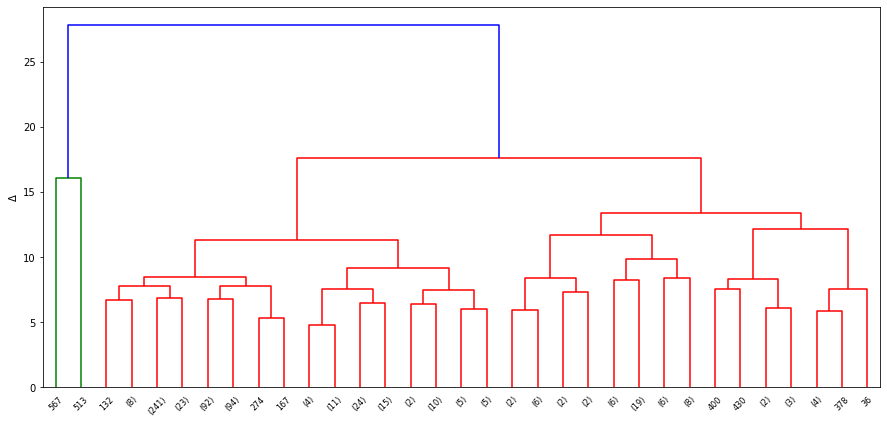

In [43]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(50, c='r', linestyle='dashed');

#### Average Linkage Method

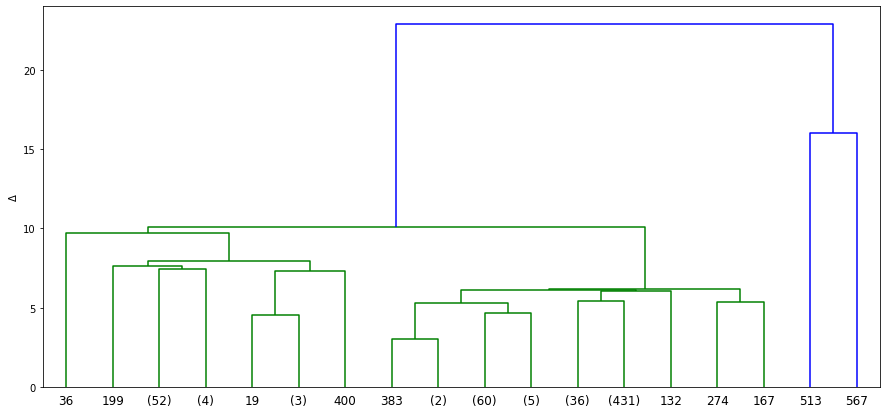

In [44]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax);

#### Result

##### Choosing the right threshold

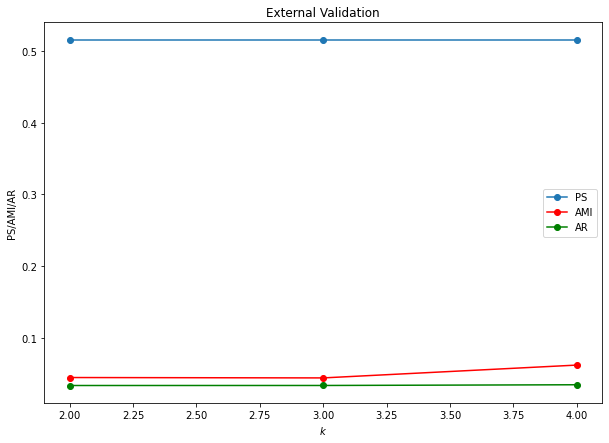

In [45]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=40, t_stop=60, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into 2 groups with the highest distance for every cluster, whereas other methods failed to do so. In validating the clusters with position of each player, we can infer that 2 cluster is the ideal number of groups since it has the highest adjusted mutual information and adjusted rand index.

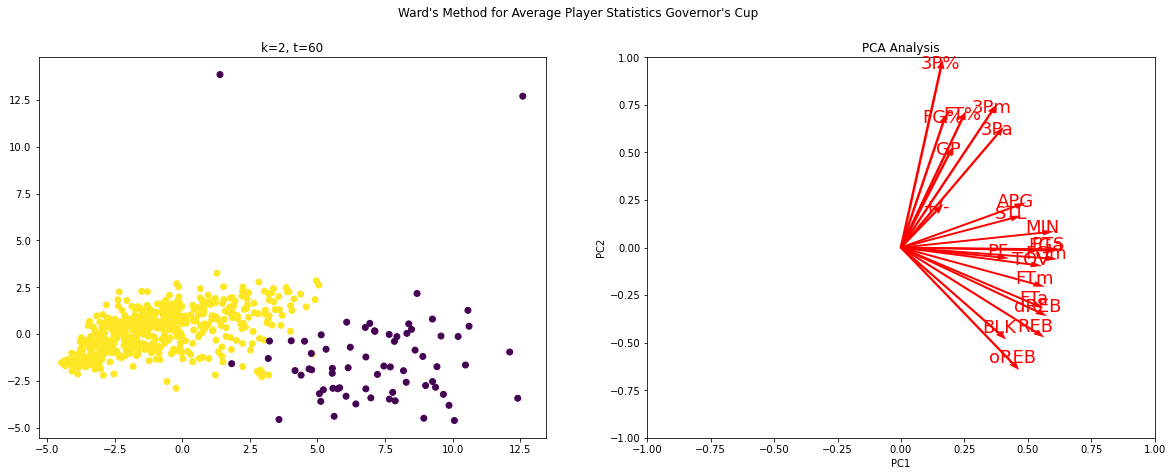

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 60, ax1)
ax2= plot_pca(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics Governor's Cup");

Observing the PC1 and PC2 of the decomposed dataset, we can find that the most dominant feature in PC2 is the field goal and three-point percentage, attempted and made. While the most dominant feature in PC1 is the average points, minutes per game. Upon further examination of the data, we can see that free throws are orthogonal to three points and field goals, thus inferring they have no correlation. We can also see that the three points vectors also have no correlation to blocks and rebounds. Thus inferring that most three point shooters are smaller than people who excel in rebounds and blocks but compensates in shooting.

In [43]:
y_cluster = fcluster(Z_ward, t=60, criterion='distance')
df_avg_player_gov['cluster'] = y_cluster

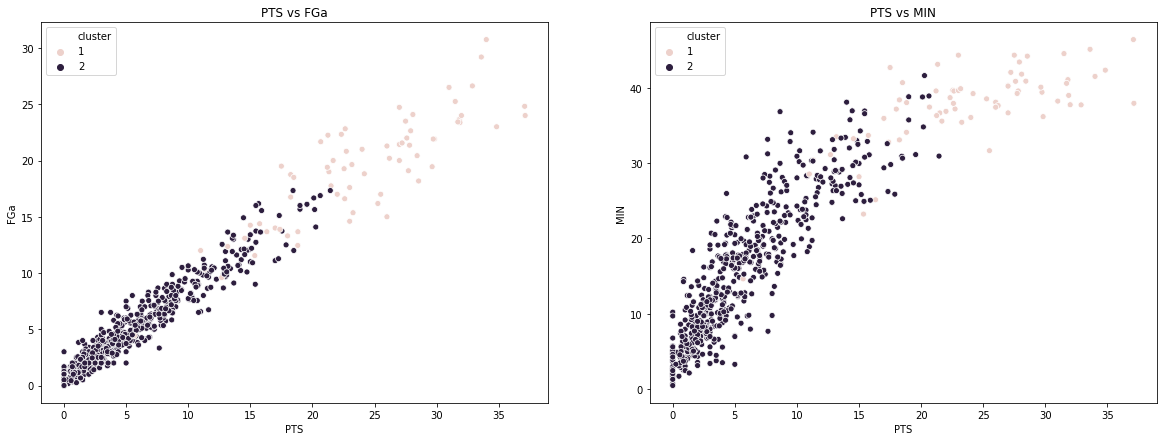

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_gov, ax=ax1)
ax1.set_title('PTS vs FGa')

ax2.set_title('PTS vs MIN')
sns.scatterplot(x='PTS', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_gov, ax=ax2)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 2 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are benchwarmers or defensive players. While players who belong in group 1 have high field goal attempts and points made are a starters and offensive players.  Upon further investigation, we can see that the identified starters in cluster 1 have the longest playing time in the court. In contrast, players who are identified benchwarmers have the shortest time in the court.

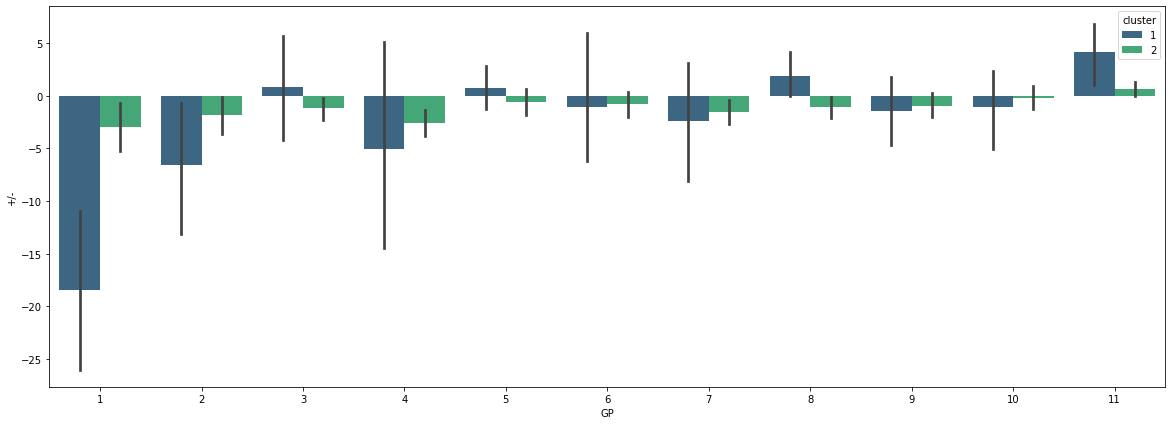

In [158]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_gov)
plt.show()

Based on the plot above, we can see that players who have a few numbers of games played have low-performance efficiency. Although the number of games played by the player increases, we can see an improvement in player efficiency. Based on these results, we can infer that teams with great players having high offensive and defensive attributes have the highest number of games. Teams with such players are not eliminated in the early round, thus a higher chance of becoming champions. In contrast, teams with players with negative player efficiency (High number of missed field goals and free throws, and turnover) tend to be eliminated at the start of the season. We can also see that players with the highest player efficiency belong in group 1 identified as starters.

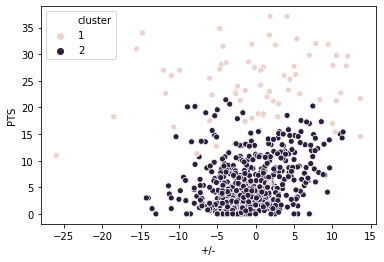

In [159]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_gov)

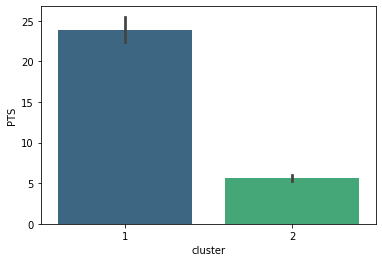

In [160]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_gov,
            palette='viridis', estimator=np.mean)

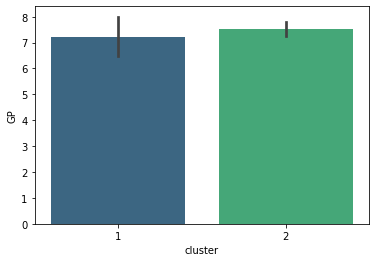

In [161]:
# sns.barplot(x='cluster', y='MIN', data=df_avg_player_gov,
#             estimator=np.mean)
sns.barplot(x='cluster', y='GP', data=df_avg_player_gov,
            palette='viridis', estimator=np.mean)

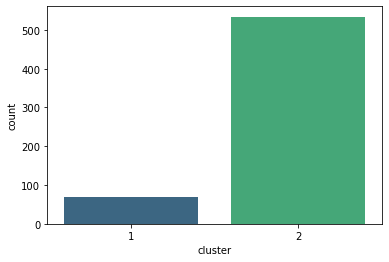

In [162]:
sns.countplot(x='cluster', data=df_avg_player_gov,
             palette='viridis')

#### Radar plot

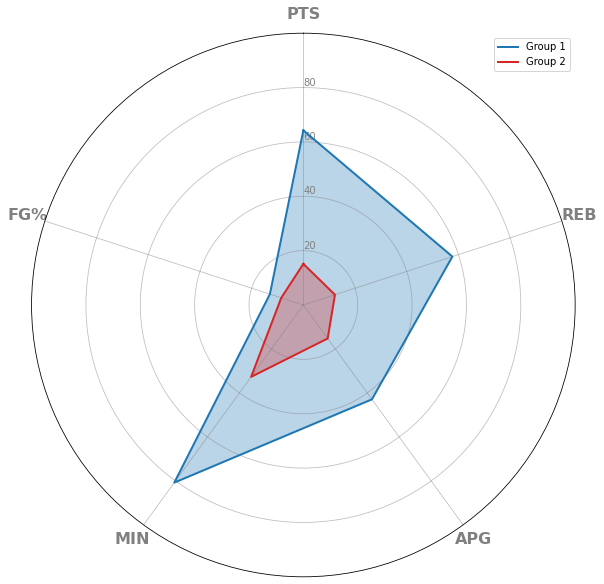

In [164]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_gov[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:red'])
plt.legend();

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, minutes player, and field goal percentage of each player. Players that have been identified as benchwarmers can bee seen with the lowest attributes. Benchwarmer players' highest attribute is the MIN, 30% average minutes per game, compared to other clusters, points are still quite small. The second clustered group we have identified are starter players. These players have a higher skill set than benchwarmers, thus having a longer time is spent in the court. We can tell that starter players dominate other players in terms of rebounding, assist, and average points per game. Since these players have the highest skill set, they play 80% of the time, which is considered the longest.

### Average Player Statistics Commisioner's Cup

In [75]:
m1 = df_avg_player.conference == 'COM'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_com = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_com.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_com.pos)
target = lbl_enc.transform(df_avg_player_com.pos)

#### Explore Dimensionality Reduction

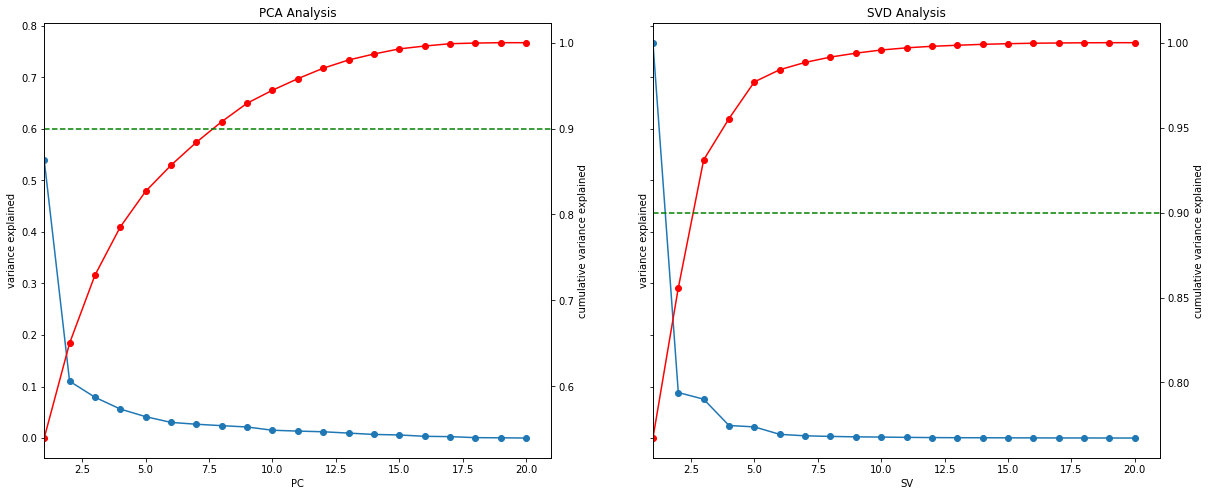

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 93% cumulative explained variance with just 3 components where using PCA needed 8 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [48]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

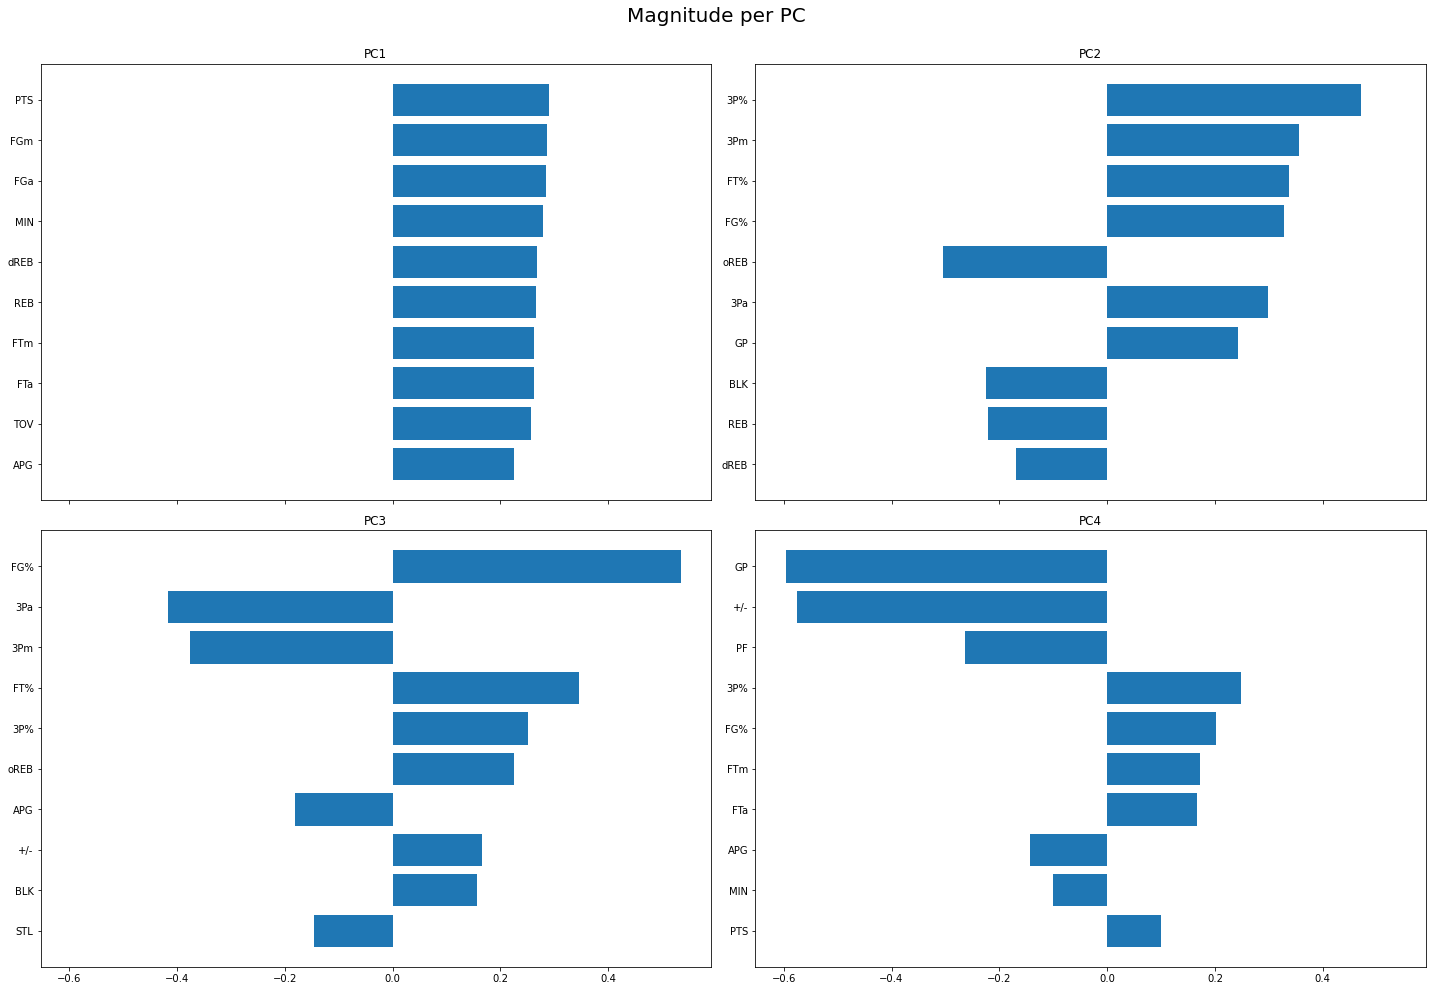

In [49]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that average points, field goals made, 3-points made, attempted, and percentage are among the top features of Principal components 1 and 2.

#### Ward's Method

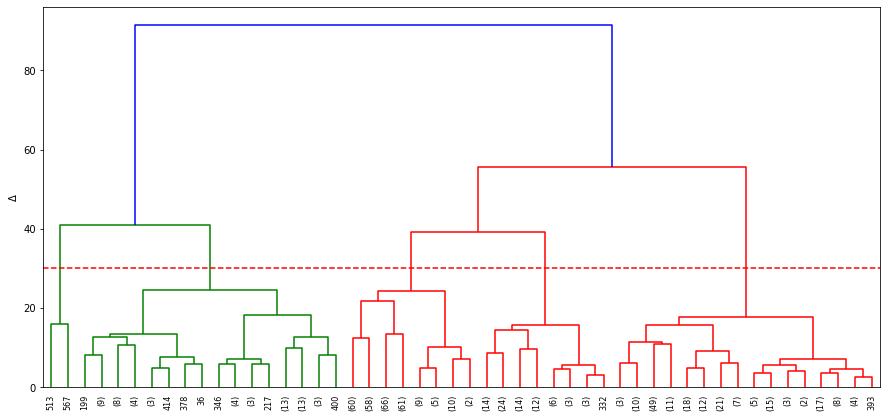

In [50]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(30, c='r', linestyle='dashed');

#### Single Linkage Method

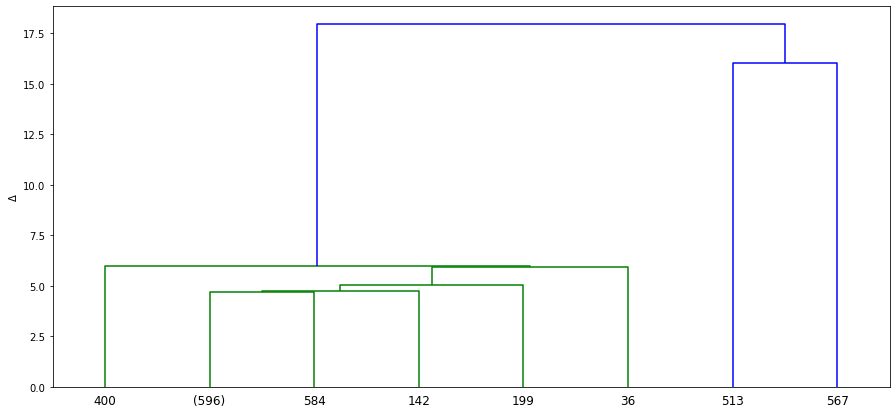

In [51]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

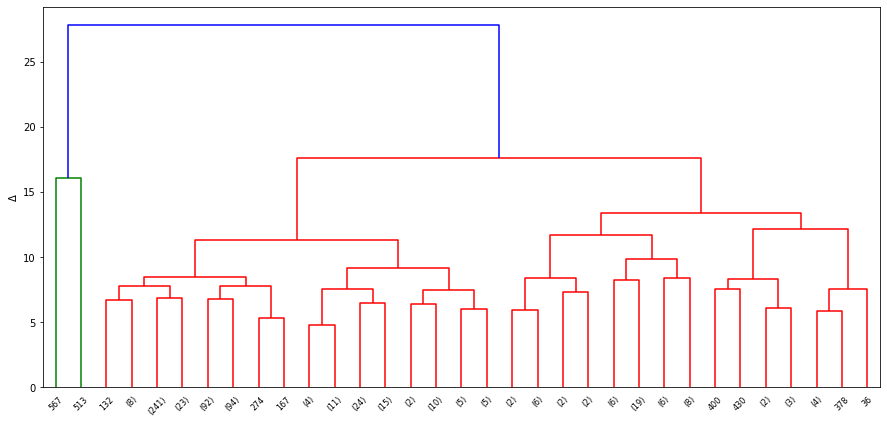

In [52]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(47, c='r', linestyle='dashed');

#### Average Linkage Method

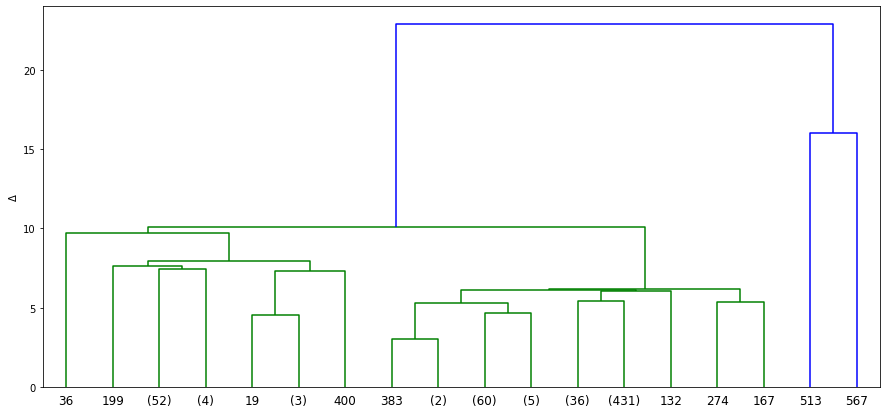

In [53]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

##### Choosing the right threshold

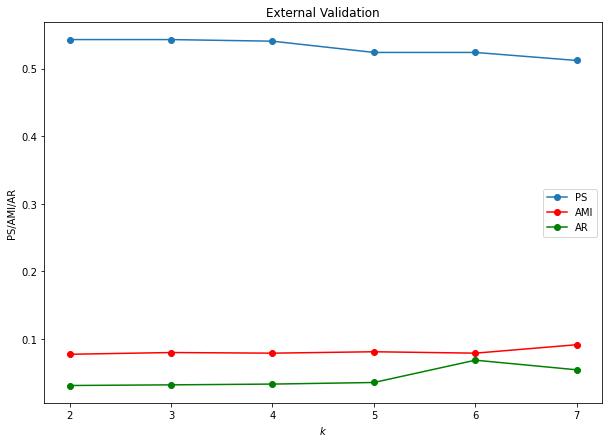

In [33]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=15, t_stop=30, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into 3 groups with the highest distance for every cluster, whereas other methods failed to do so. Validating the clusters with each player's position, we can infer that 3 clusters are the ideal number of groups since it has the highest adjusted mutual information and adjusted rand index. Even though increasing the clusters also increases adjusted mutual and rand index, we prioritize a higher purity.

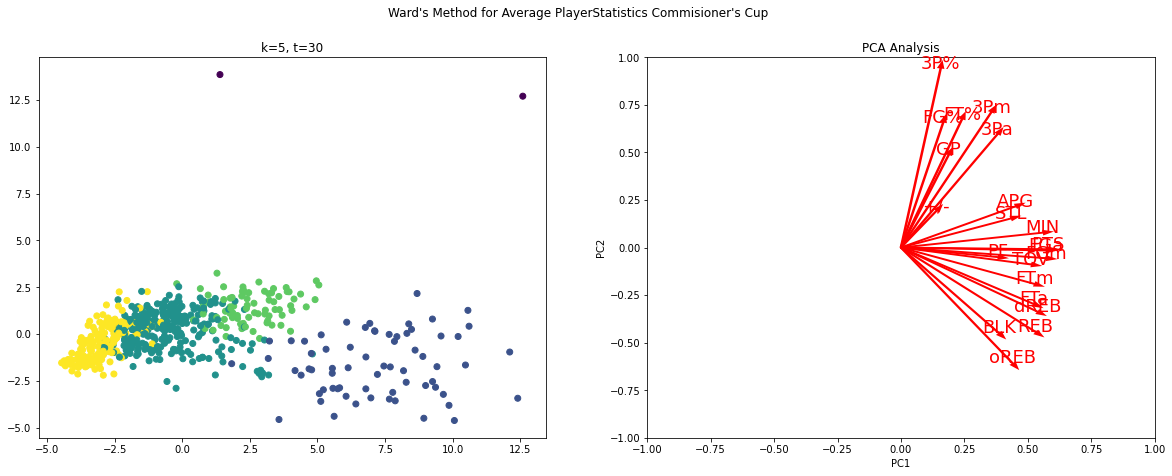

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 30, ax1)
ax2= plot_pca(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')


plt.suptitle("Ward's Method for Average Player"
             "Statistics Commisioner's Cup");

Observing the PC1 and PC2 of the decomposed dataset, we can find that the most dominant feature in PC2 is three points percentage, attempted and made, rebounds, blocks and free throws. While the most dominant feature in PC1 is the average points, minutes per game. Upon further examination of the data, we can see that three points vectors also have no correlation to blocks and rebounds since they are orthogonal to each other. Thus inferring that most three point shooters are smaller than people who excel in rebounds and blocks but compensates in shooting.

In [82]:
y_cluster = fcluster(Z_ward, t=30, criterion='distance')
df_avg_player_com['cluster'] = y_cluster

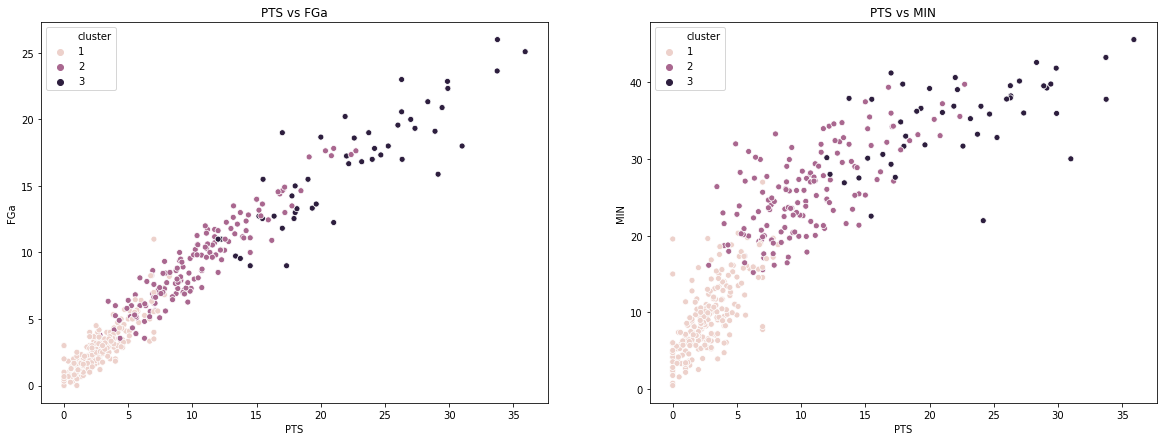

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_com, ax=ax1)

ax2.set_title('PTS vs MIN')
sns.scatterplot(x='PTS', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_com, ax=ax2);

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are benchwarmers or defensive players. While players who belong in group 3 have high field goal attempts and points made are a imports and offensive players.  Upon further investigation, we can see that the identified imports in cluster 3 have the longest playing time in the court. In contrast, players who are identified benchwarmers have the shortest time in the court.

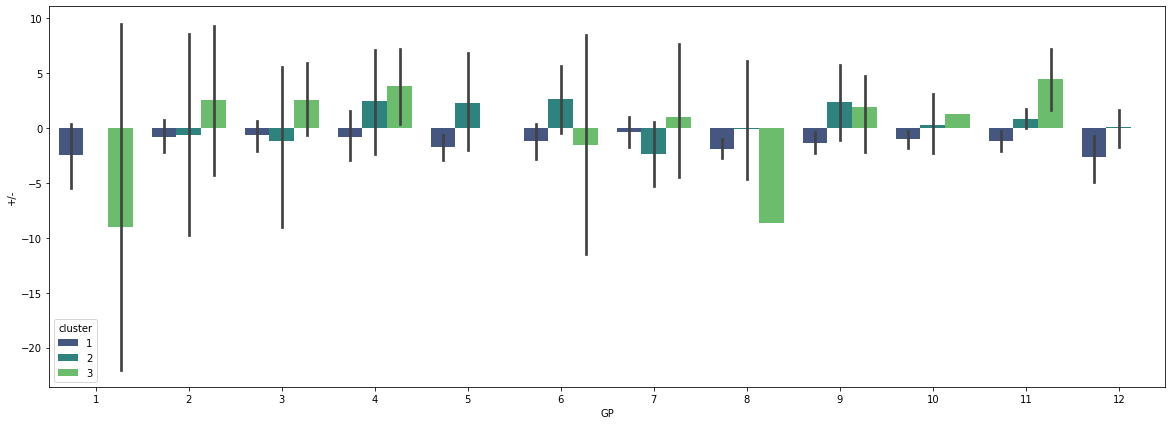

In [84]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_com)
plt.show()

Based on the plot above, we can see that players who have a few numbers of games played have low-performance efficiency. Although the number of games played by the player increases, we can see an improvement in player efficiency. However, we could see a sudden drop on player efficiency on players who played 7 or 8 games but increases again on players with 9 games onwards. Based on these results, we can infer that teams with great players having high offensive and defensive attributes have the highest number of games. Teams with such players are not eliminated in the early round, thus a higher chance of becoming champions. In contrast, teams with players with negative player efficiency (High number of missed field goals and free throws, and turnover) tend to be eliminated at the start of the season. We can also see that players with the highest player efficiency belong in group 1 identified as starters.

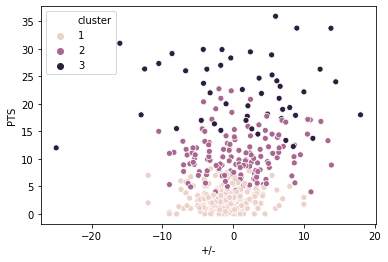

In [38]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_com)

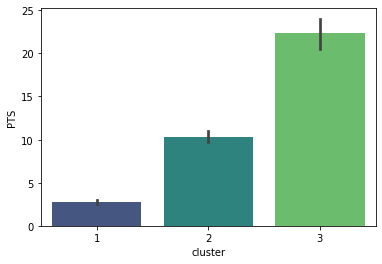

In [39]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

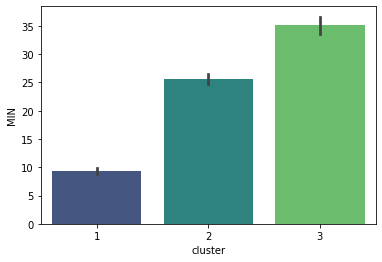

In [40]:
sns.barplot(x='cluster', y='MIN', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

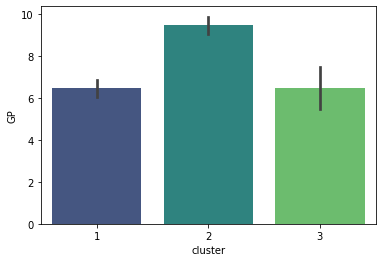

In [41]:
sns.barplot(x='cluster', y='GP', data=df_avg_player_com,
            palette='viridis', estimator=np.mean)

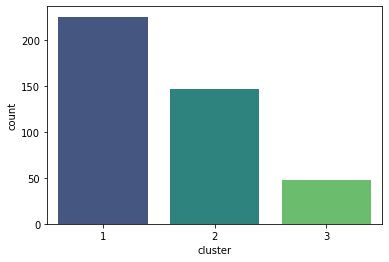

In [42]:
sns.countplot(x='cluster', data=df_avg_player_com,
             palette='viridis')

#### Radar plot

In [111]:
m1 = df_avg_player_com.cluster == 3
m2 = df_avg_player_com.year == '2019'
m3 = df_avg_player_com.player_name == 'J. Fajardo'
df_avg_player_com.loc[m3,
                      ['player_name', 'year', 'PTS',
                       'REB', 'APG', 'MIN',
                       'FG%']].sort_values(by='PTS',
                                           ascending=False).head(10)

player_name  year    PTS    REB   APG    MIN   FG%
398  J. Fajardo  2018  19.64  11.36  1.55  31.85  0.59
994  J. Fajardo  2019  16.36  11.45  1.36  30.61  0.53

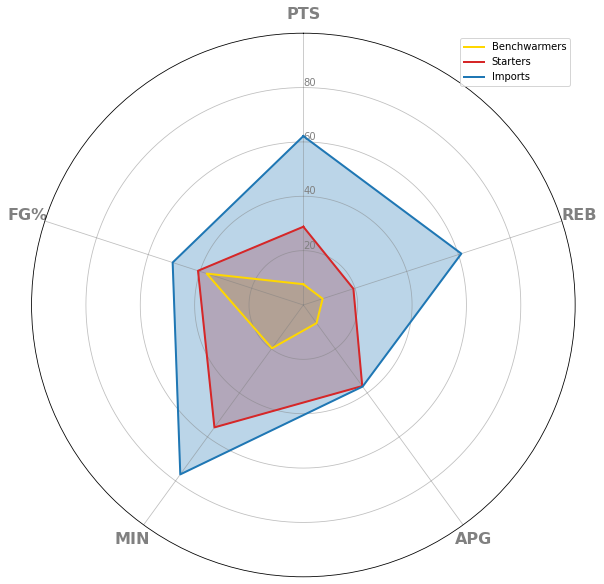

In [85]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_com[['cluster', 'PTS',
                              'REB', 'APG', 'MIN',
                              'FG%']].copy()
plot_radar(df_radar, ax, ['gold', 'tab:red', 'tab:blue'])
plt.legend(['Benchwarmers', 'Starters', 'Imports'])

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, minutes player, and field goal percentage of each player. Players that have been identified as benchwarmers can bee seen with the lowest attributes. Benchwarmer players' highest attribute is the FG%, almost 40% field goal percentage, compared to other clusters, points are still quite small. The second clustered group we have identified are starter players. These players have a higher skill set than benchwarmers, thus having a longer time is spent in the court. Although imports have the highest skillset over all the other groups, the assist per game of starters and imports are 40% which is almost identical. Thus, we infer that local starting players' often rely on teamwork. There is a 40% gap in rebounds between imports and starters, which is a huge jump. We can tell that import players dominate other players in terms of rebounding. Since these players have the highest skill set, they play 80% of the time, which is considered the longest.

### Average Player Statistics Philippine Cup

In [59]:
m1 = df_avg_player.conference == 'PH'
m2 = df_avg_player.year.astype(int) < 2020
df_avg_player_ph = df_avg_player.loc[m1 & m2].copy()

feature_raw = df_avg_player_ph.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_ph.pos)
target = lbl_enc.transform(df_avg_player_ph.pos)

#### Explore Dimensionality Reduction

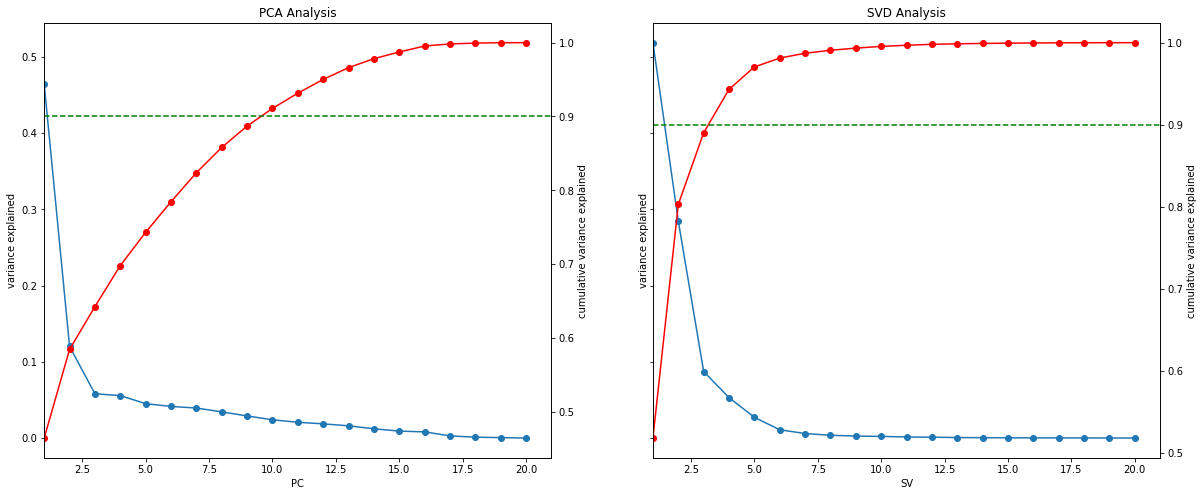

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 90% cumulative explained variance with just 3 components where using PCA needed 8 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [61]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

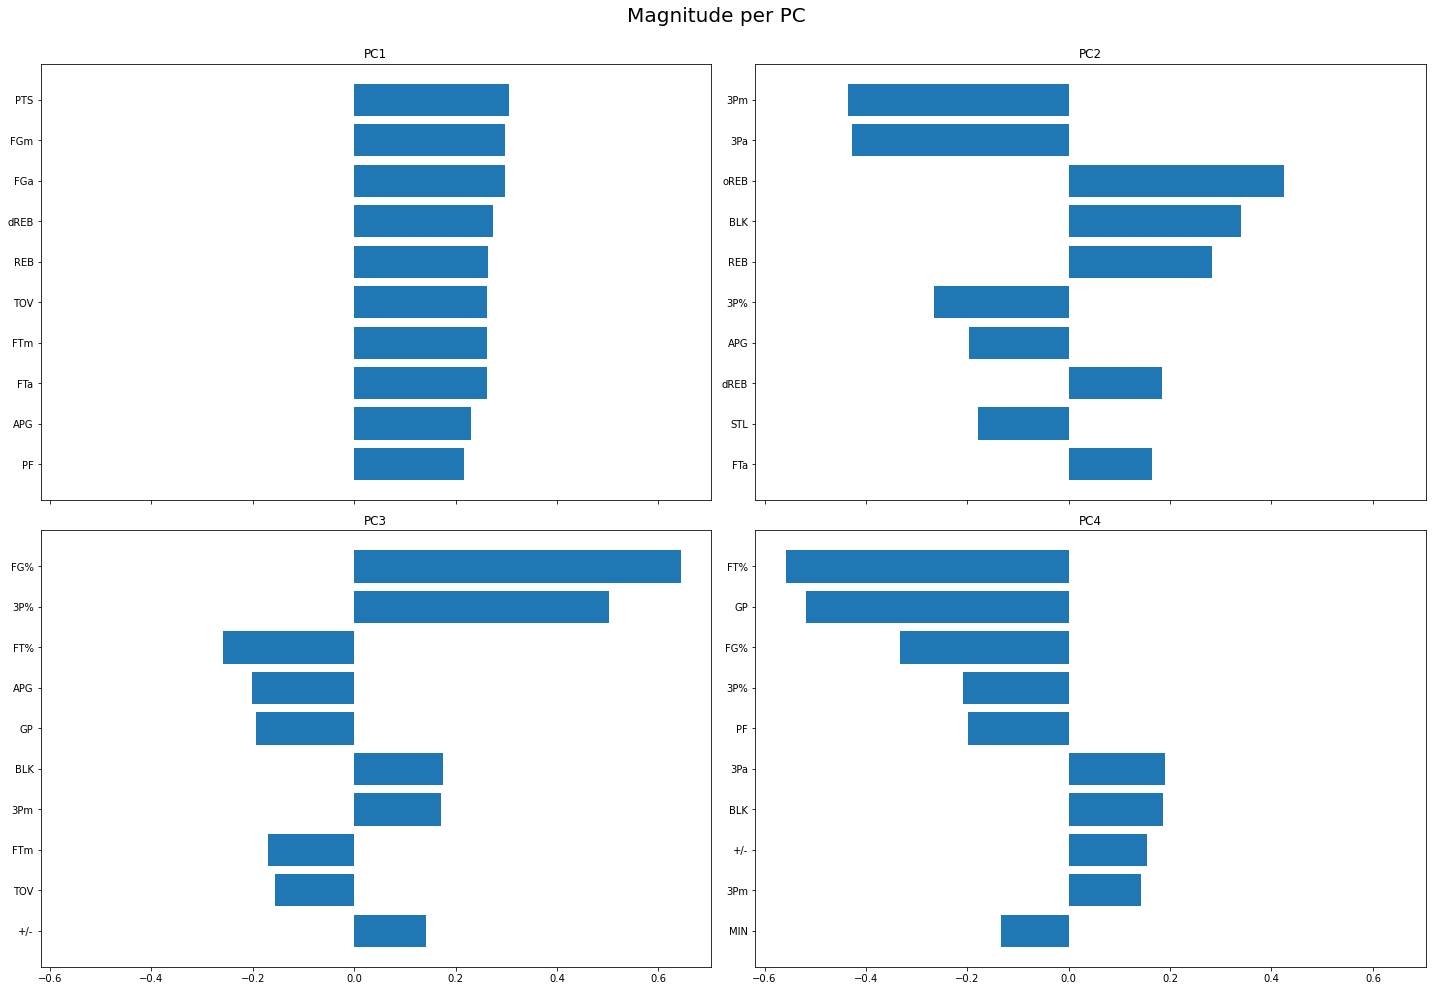

In [62]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that average points, field goals and 3-points made, attempted, and percentage are among the top features of Principal components 1 and 2. Upon further investigation, we can see that the magnitude 3-points made, attempted and percentage have a negative magnitude in PC2. In contrast, rebounds and blocks have a positive magnitude in PC2

#### Ward's Method

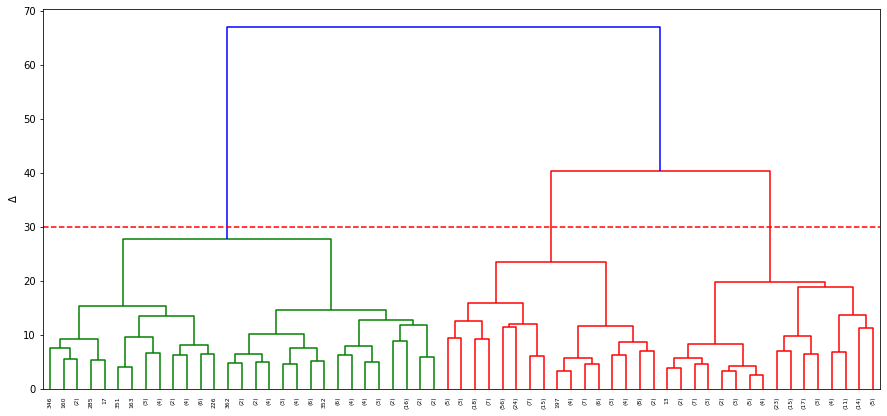

In [63]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(30, c='r', linestyle='dashed');

#### Single Linkage Method

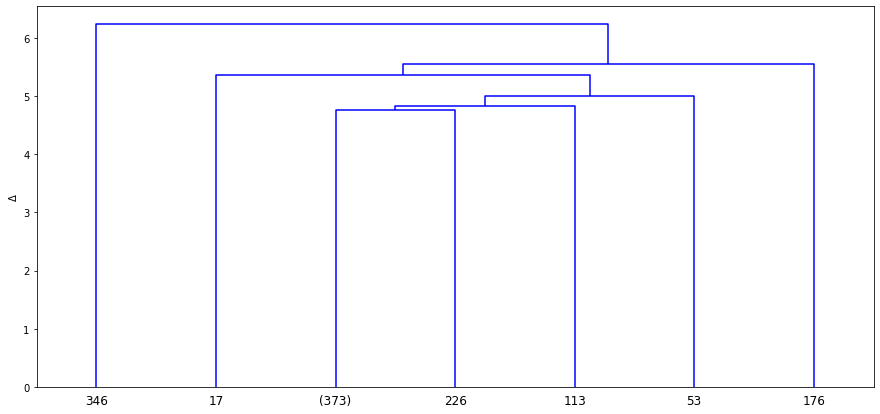

In [64]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

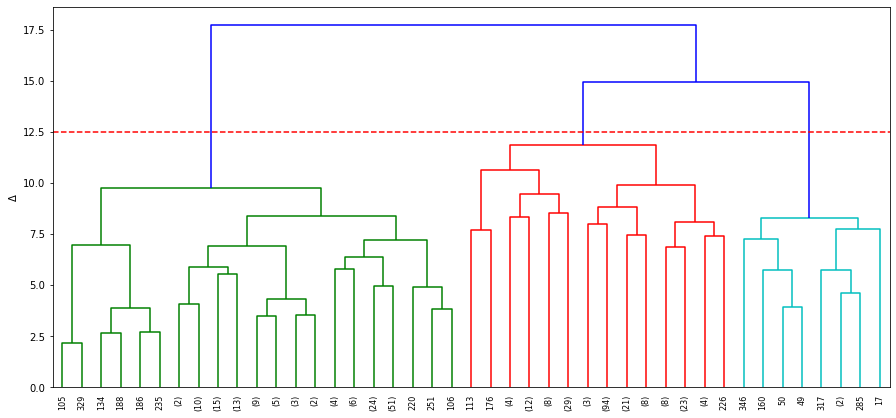

In [65]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(12.5, c='r', linestyle='dashed');

#### Average Linkage Method

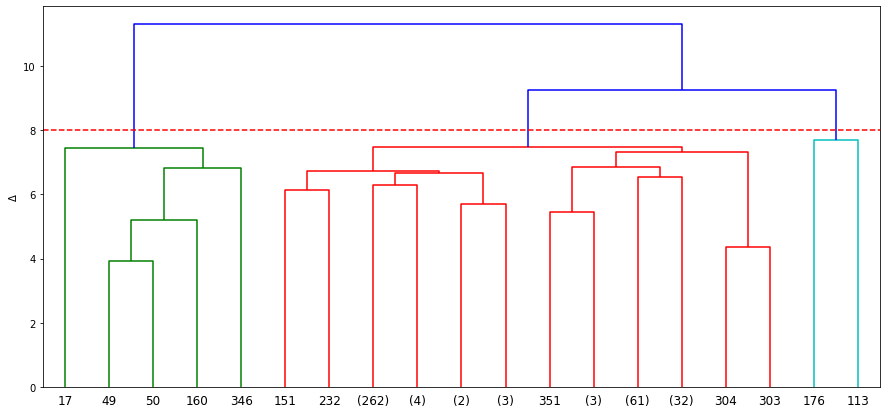

In [66]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(8, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

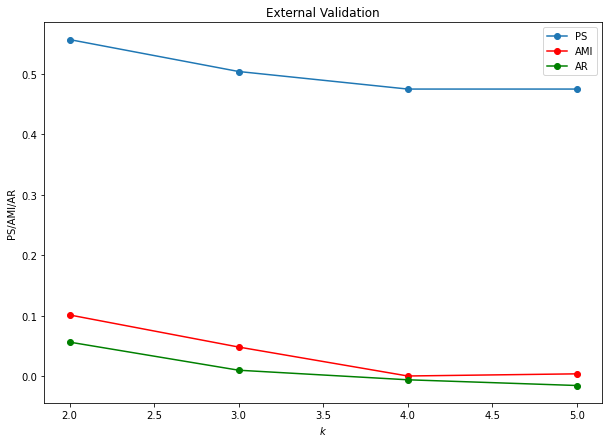

In [100]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=20, t_stop=55, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into 3 groups with the highest distance for every cluster, whereas other methods failed to do so.  Even though the complete linkage method's dendrogram is almost as good as Ward's method, Ward's method overtakes the complete linkage in terms of purity. Validating the clusters with each player's position, we can infer that 3 clusters are the ideal number of groups since it has the highest adjusted mutual information and adjusted rand index. Even though increasing the clusters also increases adjusted mutual and rand index, we prioritize a higher purity.

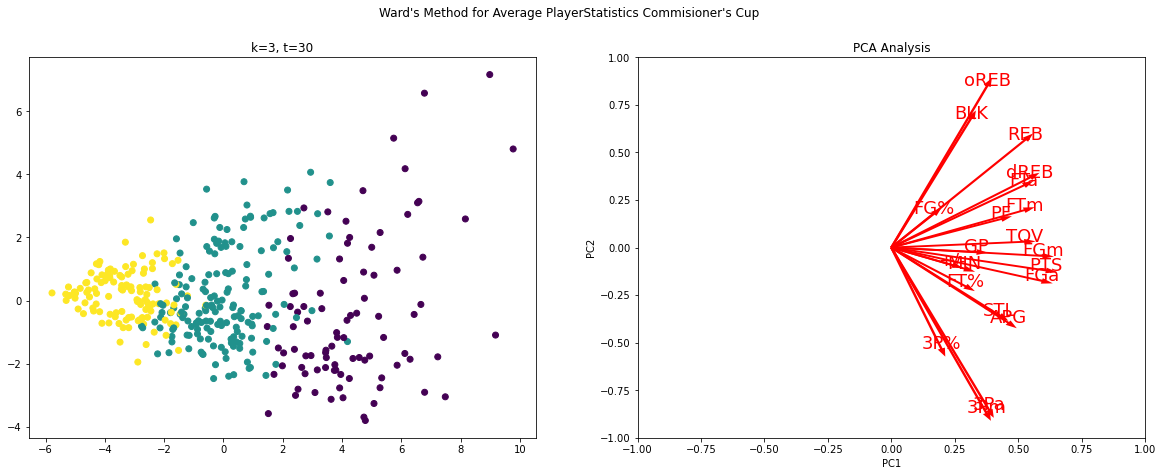

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 30, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

plt.suptitle("Ward's Method for Average Player"
             "Statistics Commisioner's Cup");

Observing the PC1 and PC2 of the decomposed dataset, we can find that the most dominant feature in PC2 is three points percentage, attempted and made, rebounds amd blocks. While the most dominant feature in PC1 is the average points, minutes per game, turover and field goals. Upon further examination of the data, we can see that three points vectors also have no correlation to blocks and rebounds since they are orthogonal to each other. Thus inferring that most three point shooters are smaller than people who excel in rebounds and blocks but compensates in shooting.

In [120]:
y_cluster = fcluster(Z_ward, t=30, criterion='distance')
df_avg_player_ph['cluster'] = y_cluster

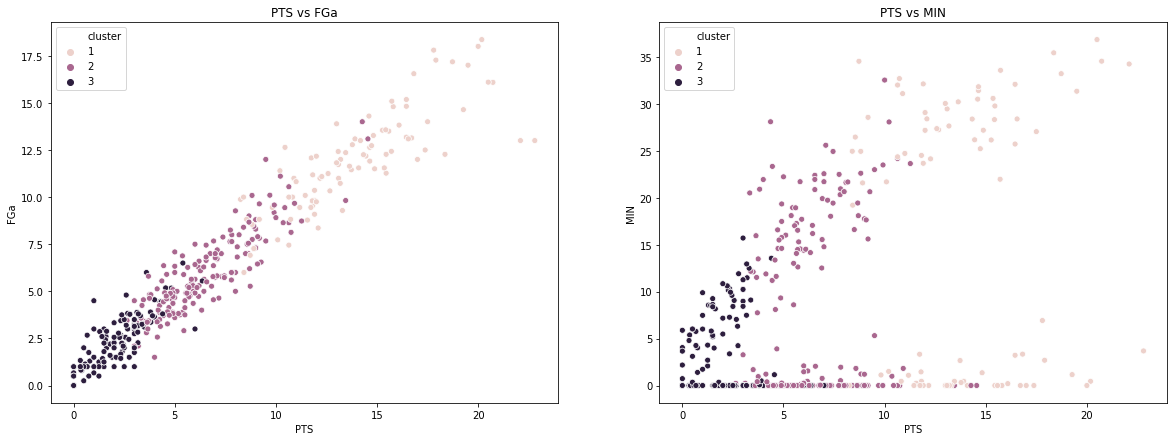

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.set_title('PTS vs FGa')
sns.scatterplot(x='PTS', y='FGa', hue='cluster', legend='full',
                data=df_avg_player_ph, ax=ax1)

ax2.set_title('PTS vs MIN')
sns.scatterplot(x='PTS', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_ph, ax=ax2);

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 3 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are benchwarmers or defensive players. While players who belong in group 1 have high field goal attempts and points made are a imports and offensive players.  Upon further investigation, we can see that the identified imports in cluster 1 have the longest playing time in the court. In contrast, players who are identified benchwarmers have the shortest time in the court.

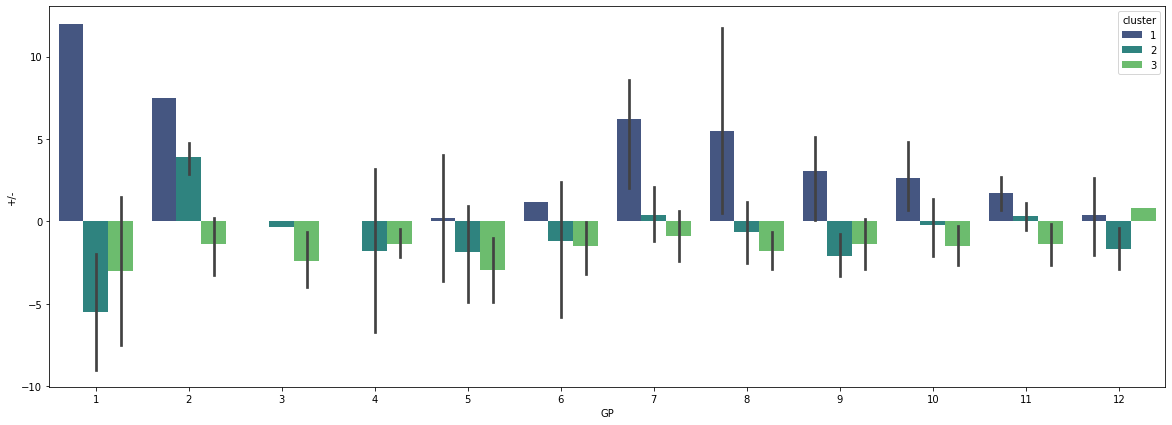

In [122]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='GP', y='+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_ph)
plt.show()

Based on the plot above, we can see that players who have a few numbers of games played have low-performance efficiency. Although the number of games played by the player increases, we can see an improvement in player efficiency. Based on these results, we can infer that teams with great players having high offensive and defensive attributes have the highest number of games. Teams with such players are not eliminated in the early round, thus a higher chance of becoming champions. In contrast, teams with players with negative player efficiency (High number of missed field goals and free throws, and turnover) tend to be eliminated at the start of the season. We can also see that players with the highest player efficiency belong in group 1 identified as starters.

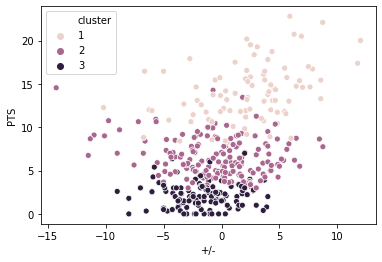

In [123]:
sns.scatterplot(x='+/-', y='PTS', hue='cluster', legend='full',
                data=df_avg_player_ph)

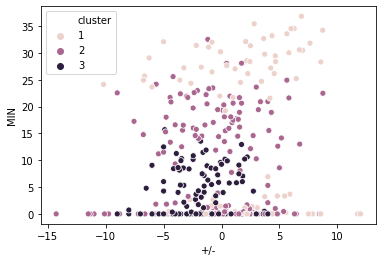

In [124]:
sns.scatterplot(x='+/-', y='MIN', hue='cluster', legend='full',
                data=df_avg_player_ph)

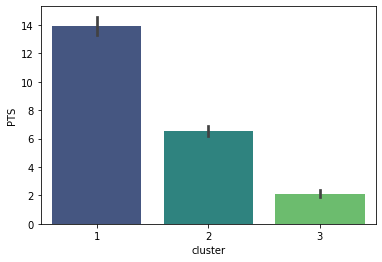

In [125]:
sns.barplot(x='cluster', y='PTS', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

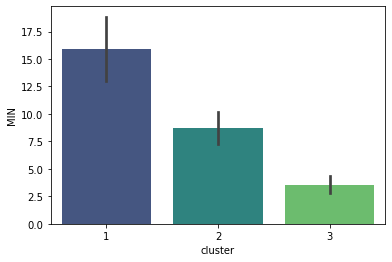

In [126]:
sns.barplot(x='cluster', y='MIN', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

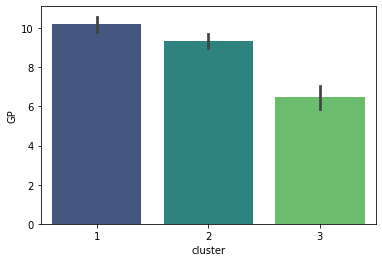

In [127]:
sns.barplot(x='cluster', y='GP', data=df_avg_player_ph,
            palette='viridis', estimator=np.mean)

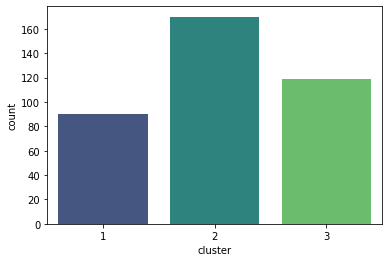

In [128]:
sns.countplot(x='cluster', data=df_avg_player_ph,
             palette='viridis')

#### Radar plot

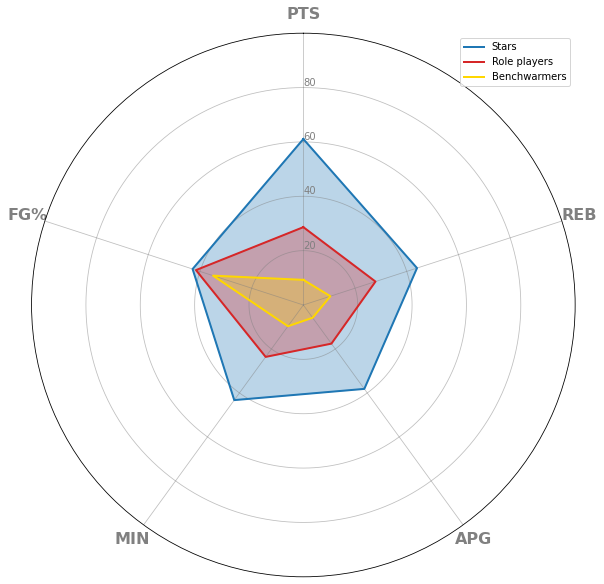

In [132]:
fig = plt.figure(figsize=(20,10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_ph[['cluster','PTS',
                                  'REB', 'APG', 'MIN',
                                  'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:red', 'gold'])
plt.legend(['Stars', 'Role players', 'Benchwarmers']);

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, minutes player, and field goal percentage of each player. Players that have been identified as benchwarmers can bee seen with the lowest attributes. Benchwarmer players' highest attributes are FG%, almost 40% field goals, and other clusters, which are still quite small. The second clustered group we have identified are role players. These players have a higher skill set than benchwarmers, thus having a longer time is spent in the court. Although imports have the highest skillset over all the other groups, the change in the field goal percentage of role and star players is not significant. Furthermore, we have observed that besides field goal percentage and average points per game, there is less than a 20% increase for each attribute in each cluster.

## Average Player + Team Statistics By Conference

In [965]:
df_avg_player_team = fetcher.get_avg_player_team()
df_avg_player_team = (df_avg_player_team
                      .loc[df_avg_player_team.year.astype(int) < 2020])

### All average player statistics

In [966]:
feature_raw = df_avg_player_team.drop(['year', 'conference', 'player_name',
                                       'team_name', 'pos',
                                       'j_number'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team.pos)
target = lbl_enc.transform(df_avg_player_team.pos)

#### Explore Dimensionality Reduction

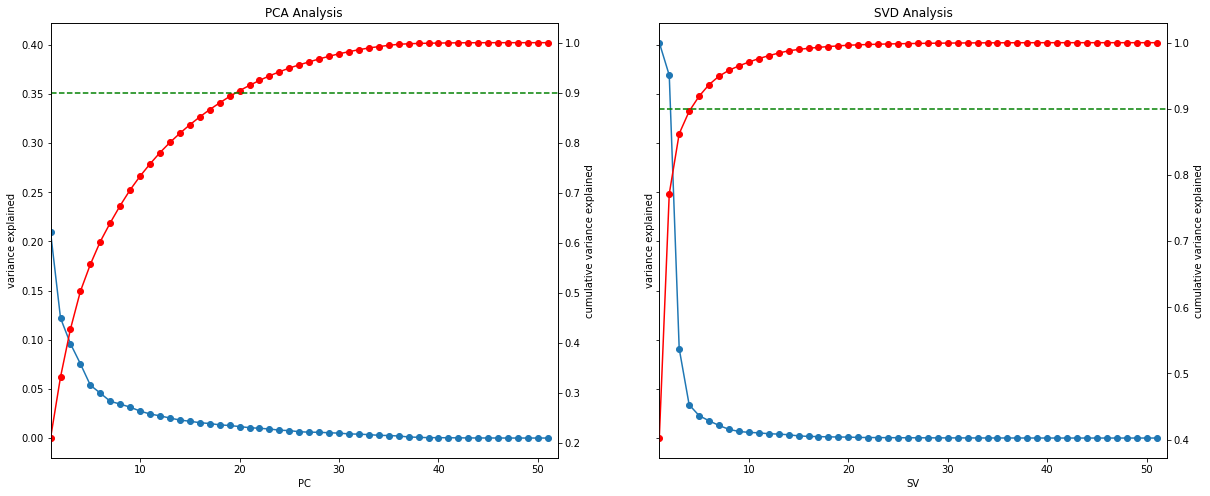

In [967]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
svd_all = TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw)
plot_variance(svd_all, 'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just nine components where using PCA needed 18 components.

In [968]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

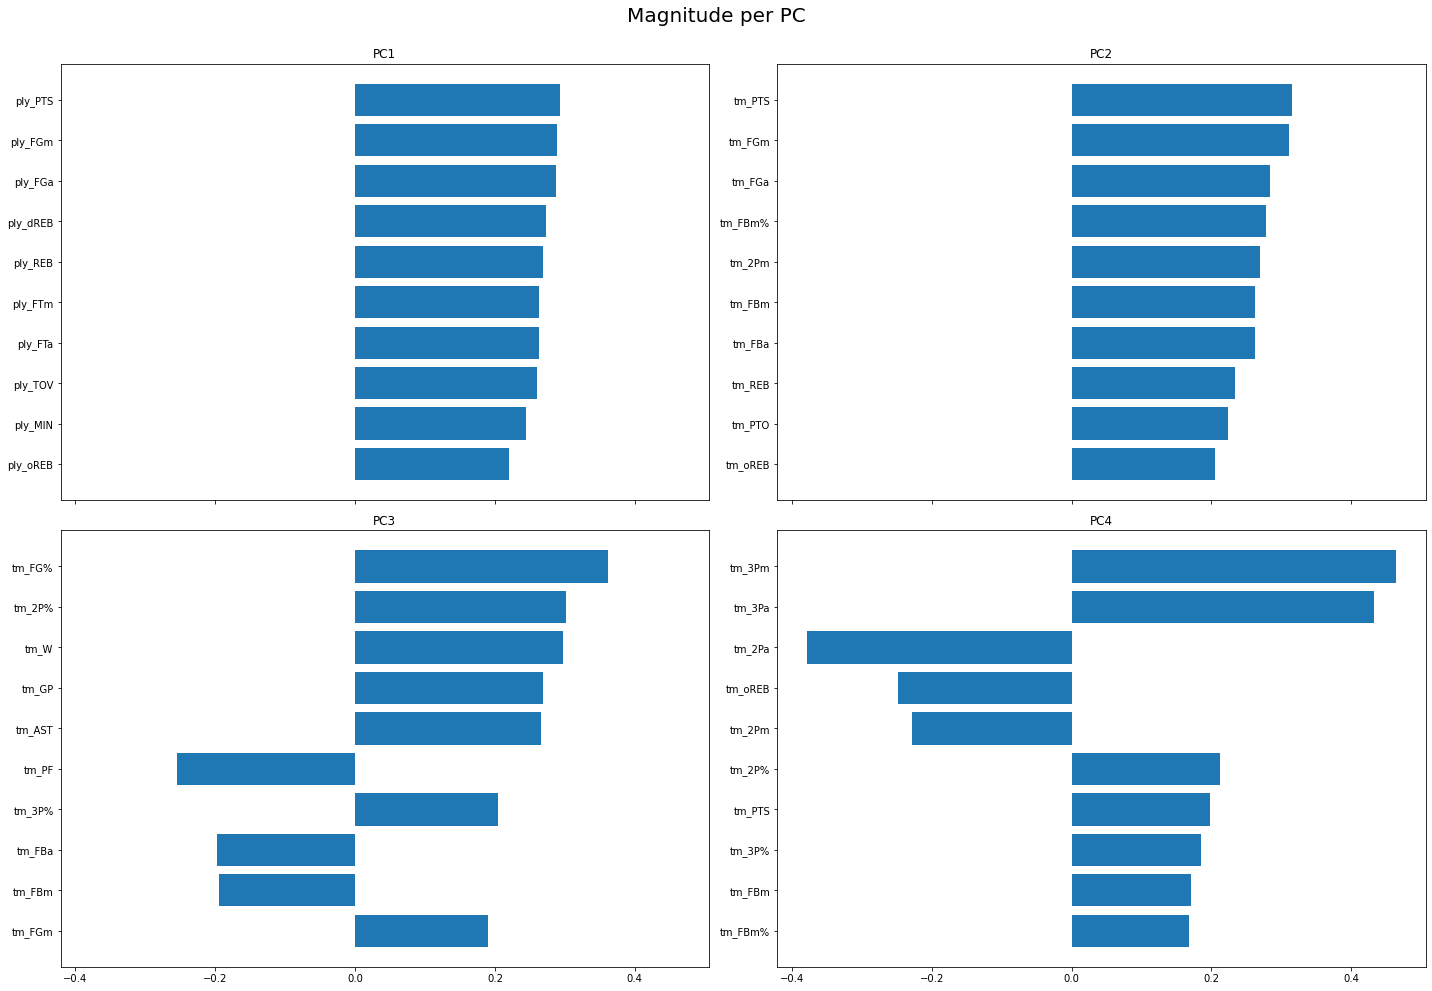

In [969]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

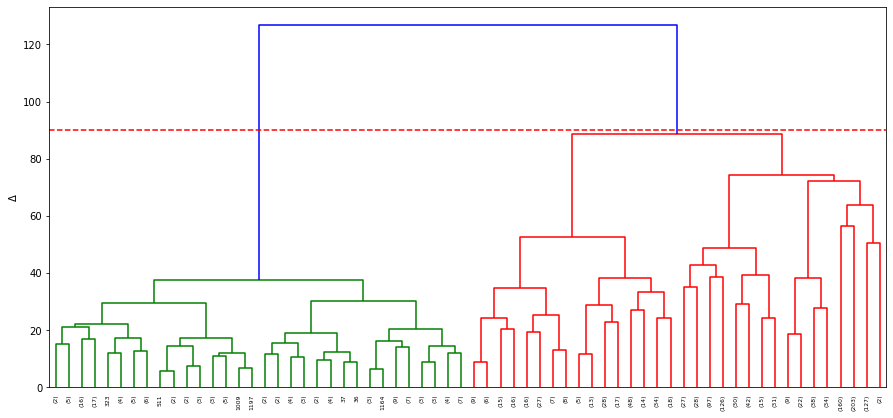

In [970]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(90, c='r', linestyle='dashed');

#### Single Linkage Method

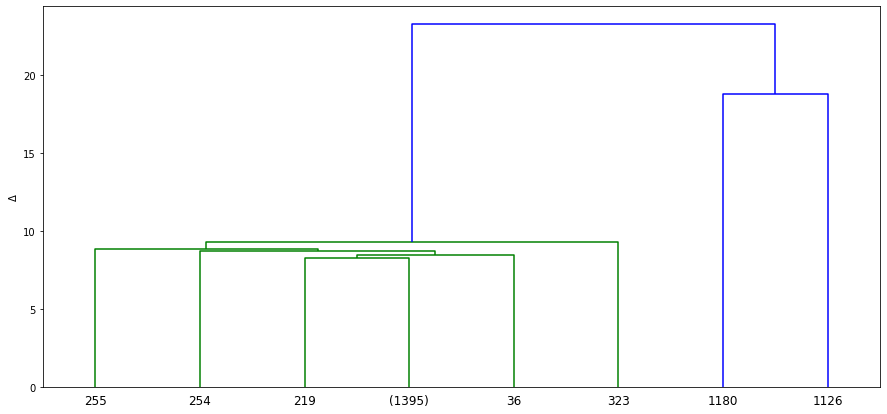

In [971]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

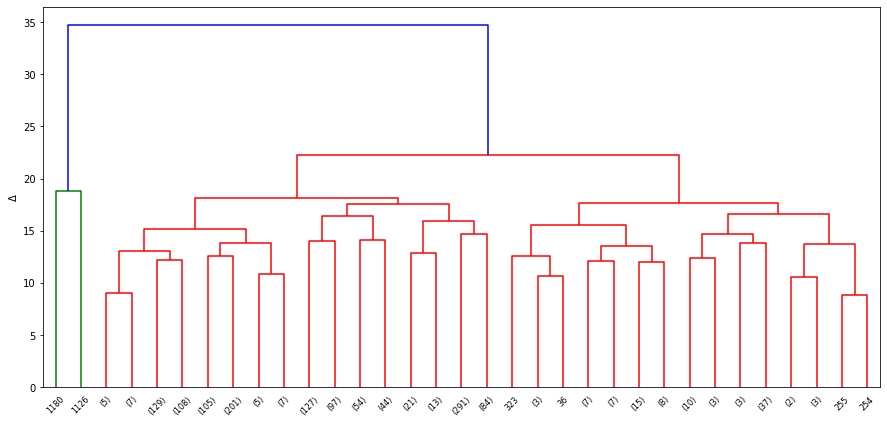

In [972]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(70, c='r', linestyle='dashed');

#### Average Linkage Method

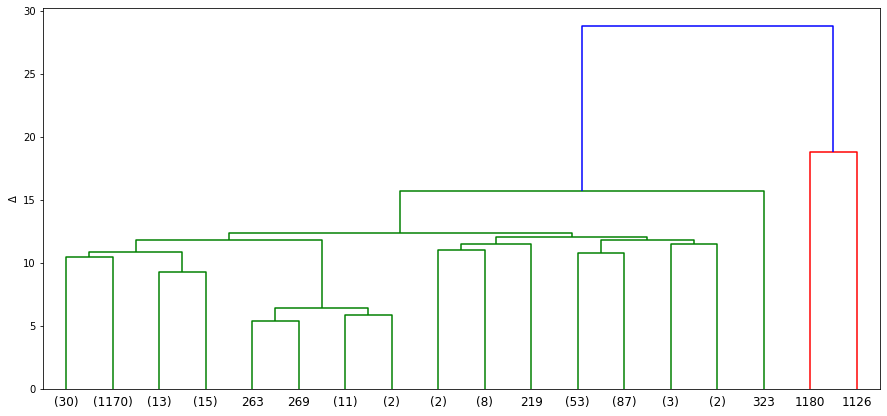

In [973]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(40, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

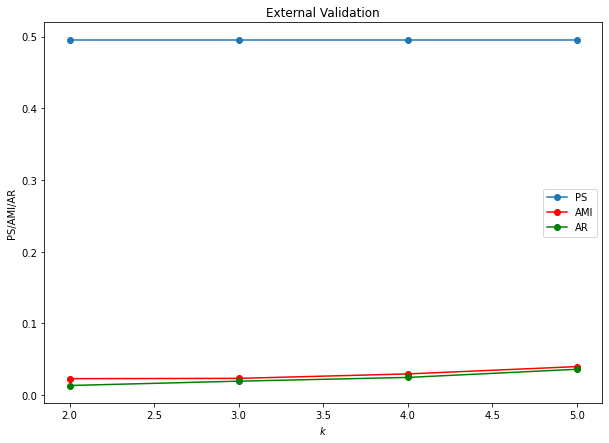

In [646]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=70, t_stop=90, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

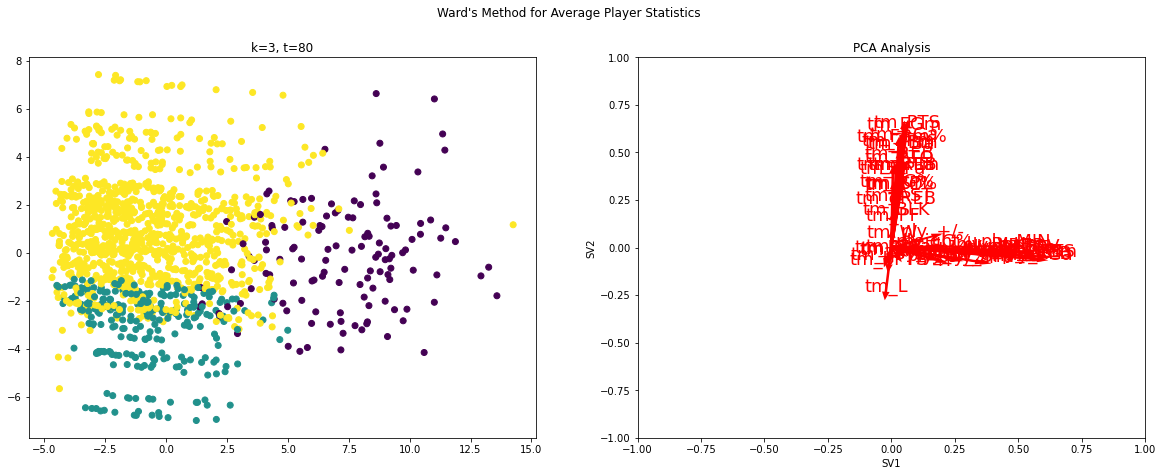

In [974]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 80, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [975]:
y_cluster = fcluster(Z_ward, t=80, criterion='distance')
df_avg_player_team_cluster = df_avg_player_team.copy()
df_avg_player_team_cluster['cluster'] = y_cluster

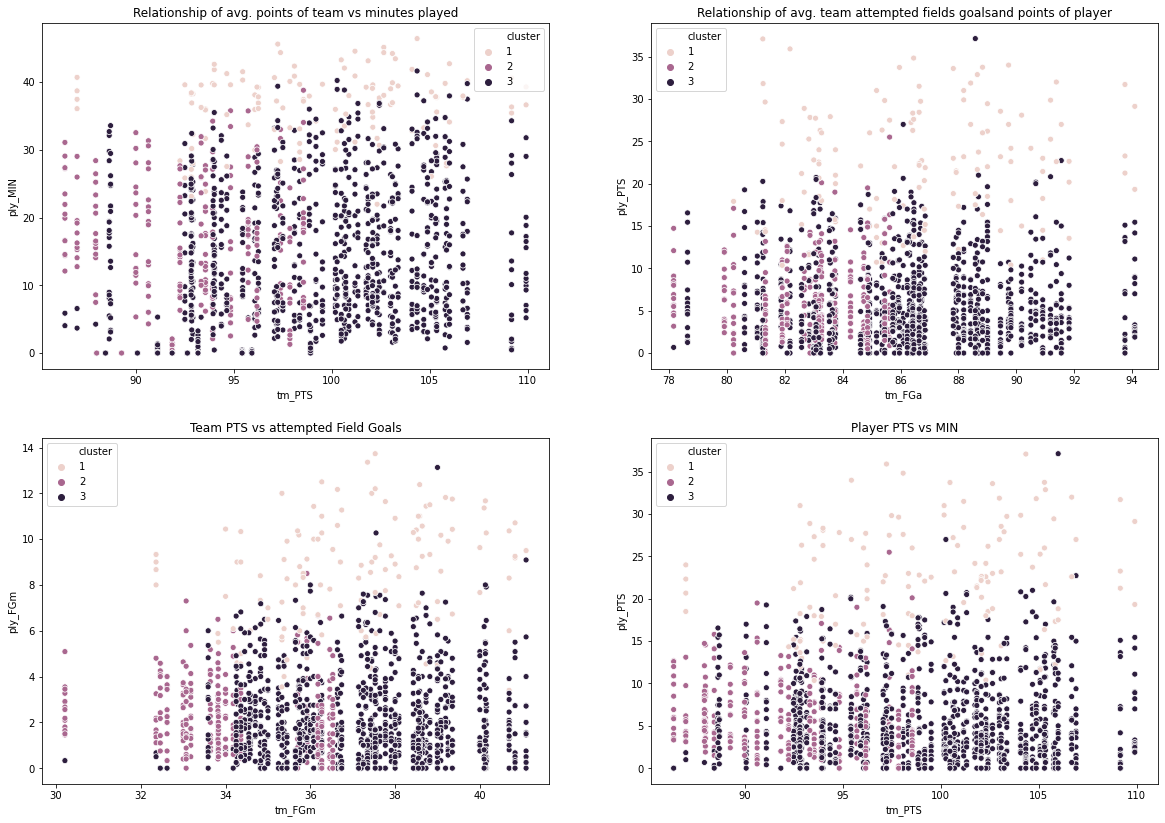

In [976]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_cluster, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

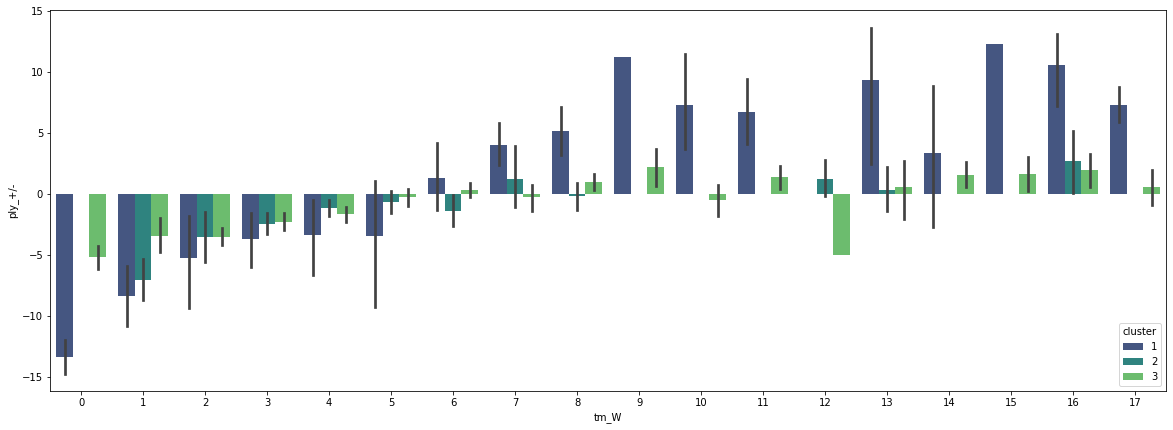

In [977]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_cluster)
plt.show()

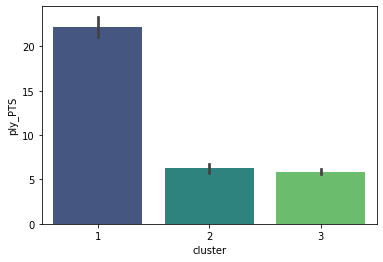

In [978]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

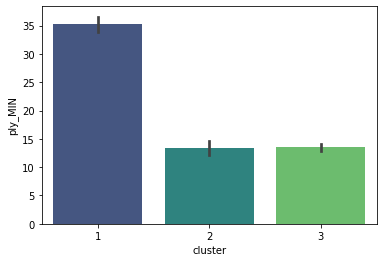

In [979]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

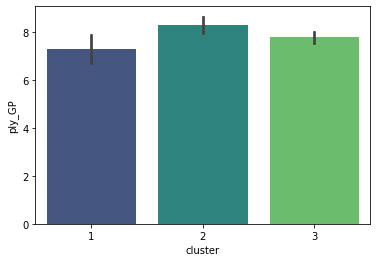

In [980]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_cluster,
            palette='viridis', estimator=np.mean)

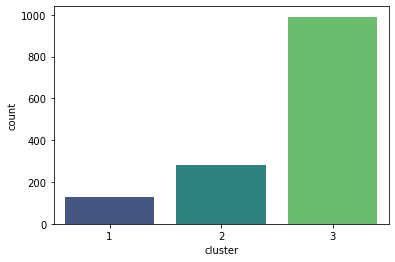

In [981]:
sns.countplot(x='cluster', data=df_avg_player_team_cluster,
             palette='viridis');

#### Radar plot

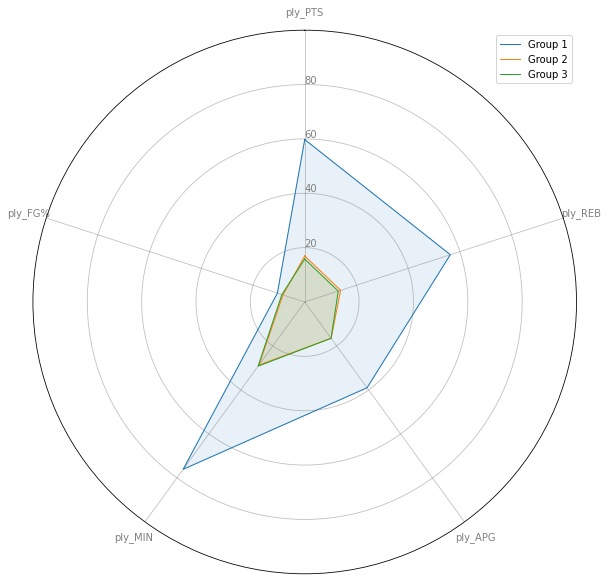

In [982]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_cluster[['cluster', 'ply_PTS',
                               'ply_REB', 'ply_APG', 'ply_MIN',
                               'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green'])
plt.legend();

### Average Player Statistics Governor's Cup

In [999]:
m1 = df_avg_player_team.conference == 'GOV'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_gov = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_gov.drop(['year', 'conference',
                                           'player_name',
                                           'team_name', 'pos', 'j_number',
                                           'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_gov.pos)
target = lbl_enc.transform(df_avg_player_team_gov.pos)

#### Explore Dimensionality Reduction

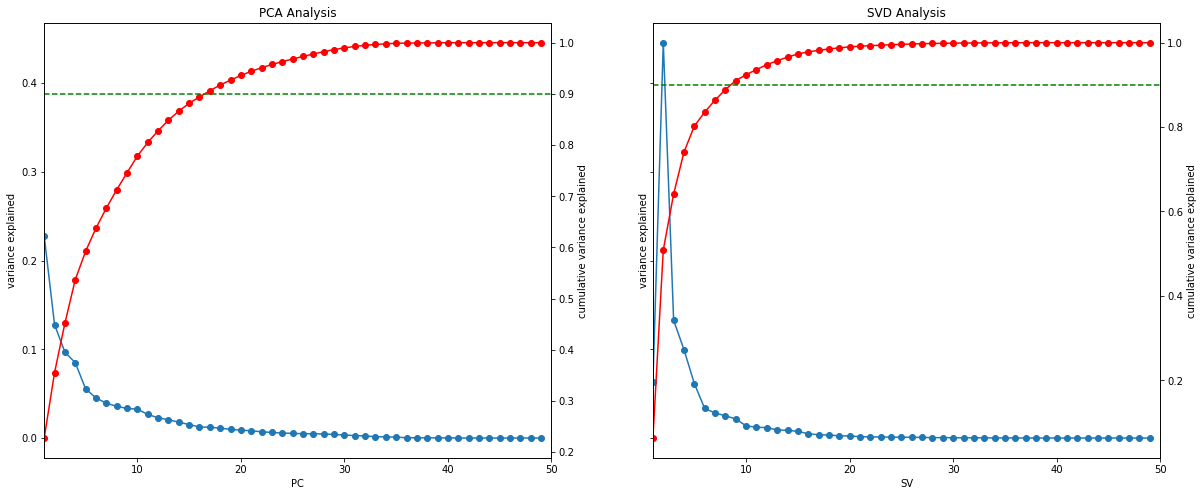

In [1000]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 93% cumulative explained variance with just 8 components where using PCA needed 17 components.

In [1001]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

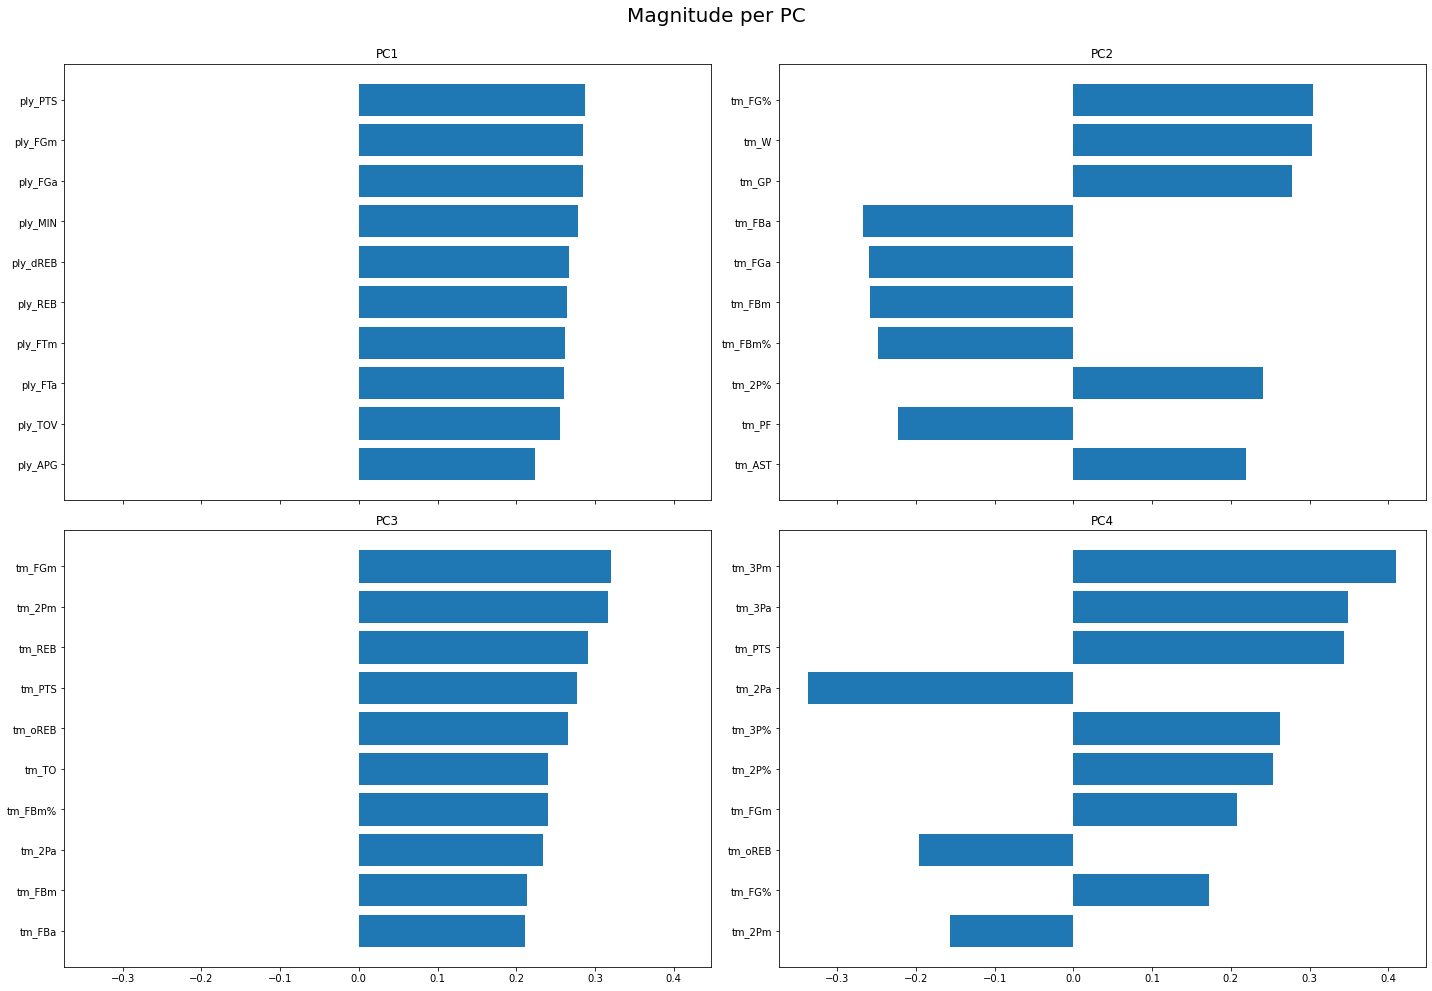

In [1002]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

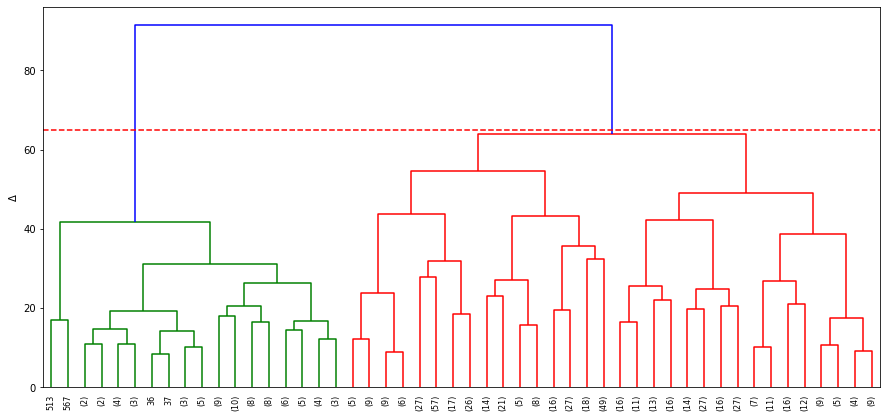

In [1003]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(65, c='r', linestyle='dashed');

#### Single Linkage Method

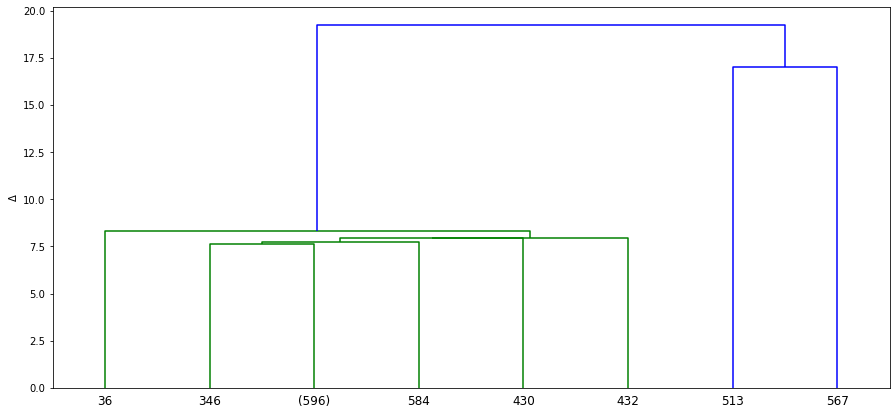

In [1004]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

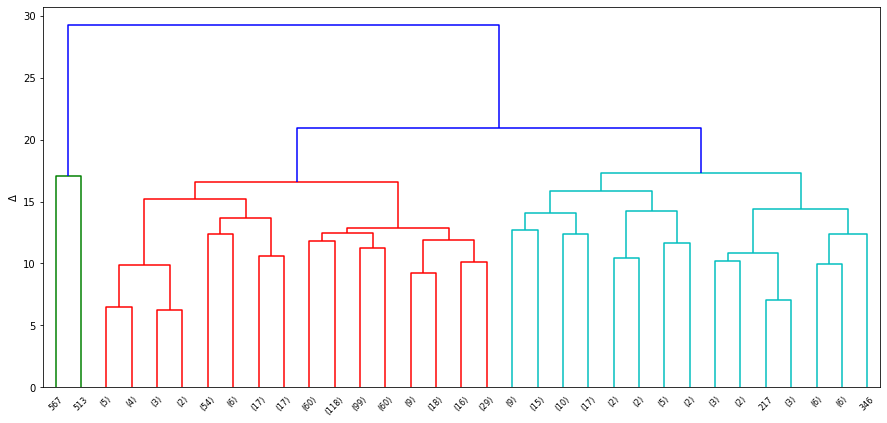

In [1005]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(60, c='r', linestyle='dashed');

#### Average Linkage Method

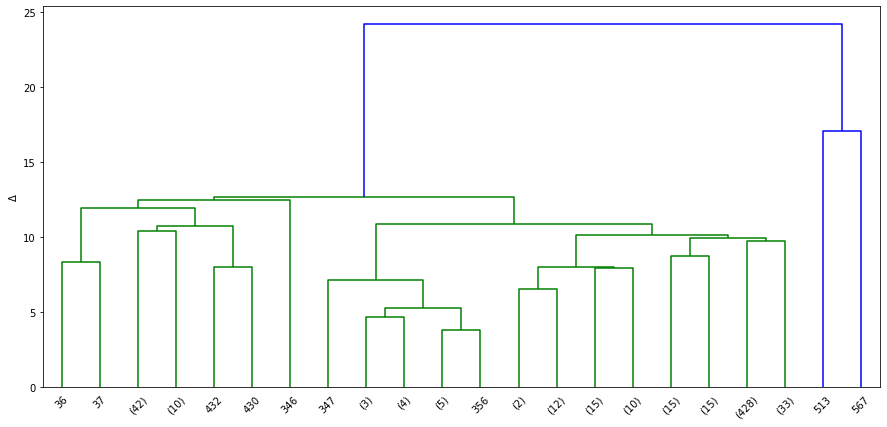

In [1006]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(33, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

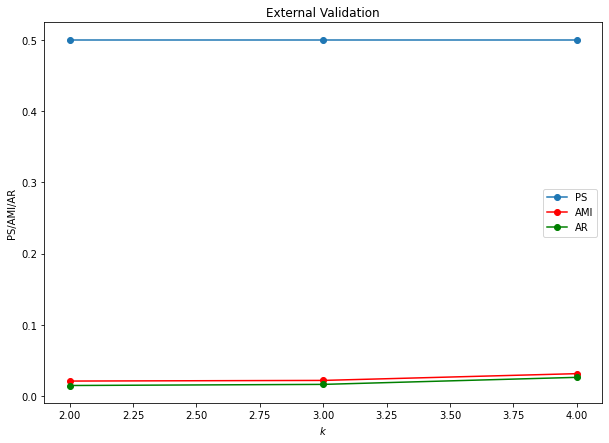

In [716]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'ward',
                          t_start=50, t_stop=65, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

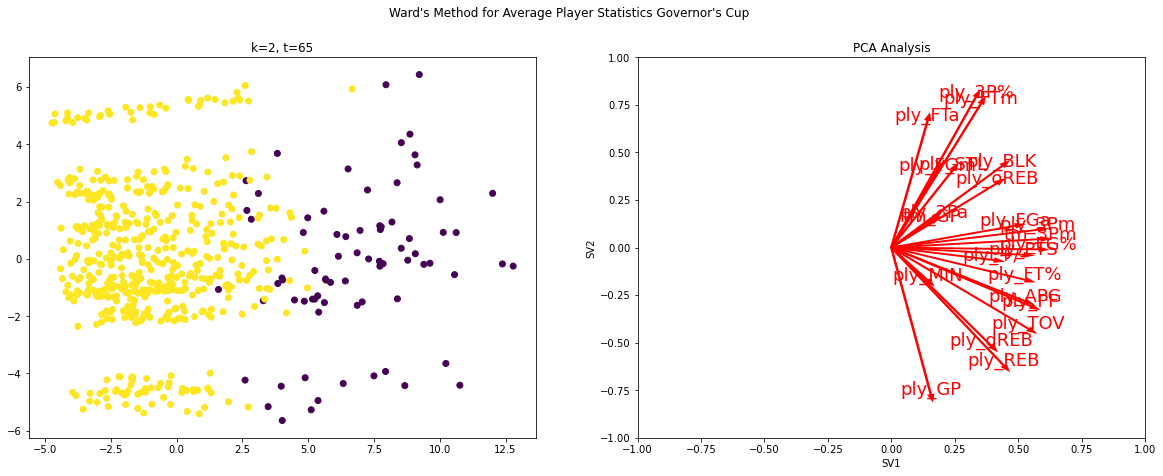

In [991]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 65, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Player Statistics Governor's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1008]:
y_cluster = fcluster(Z_ward, t=65, criterion='distance')
df_avg_player_team_gov['cluster'] = y_cluster

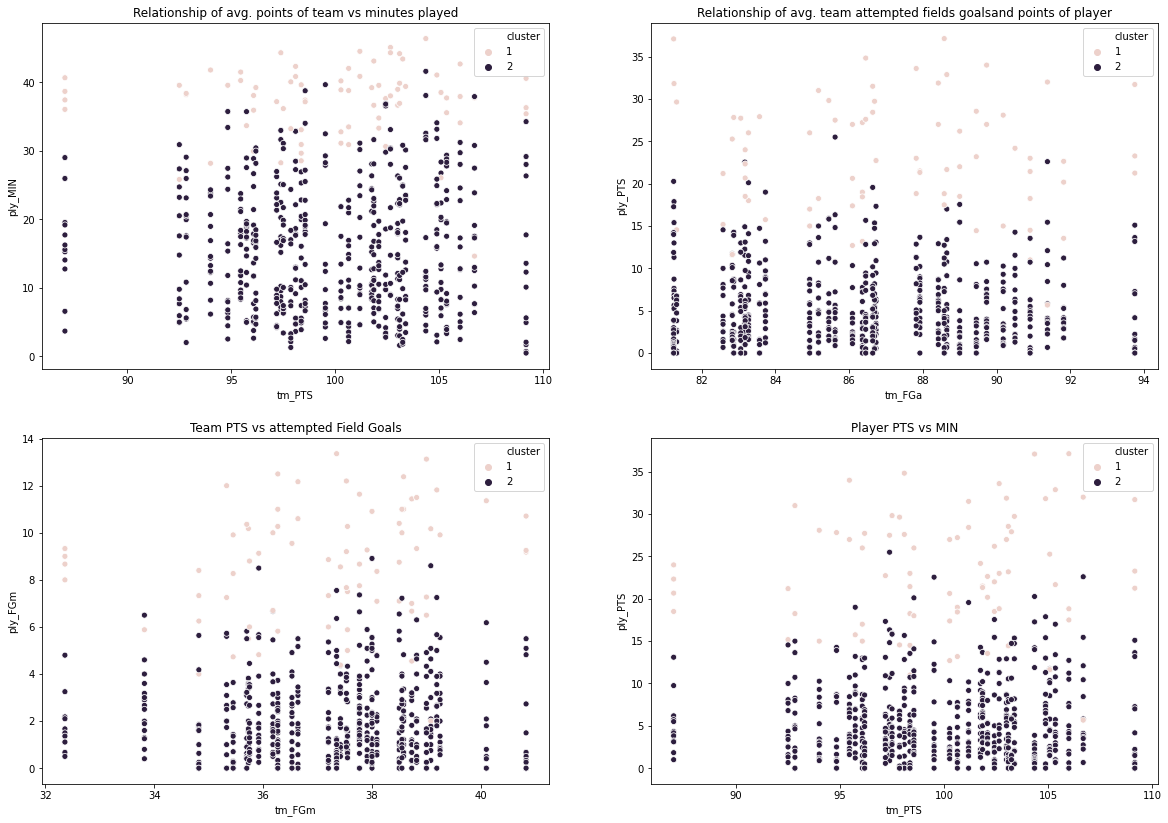

In [1010]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_gov, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

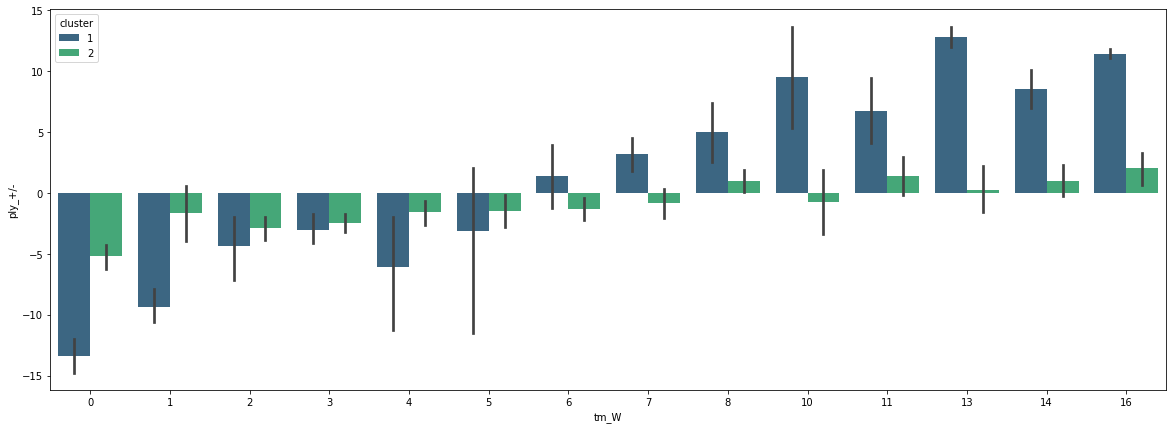

In [1011]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_gov)
plt.show()

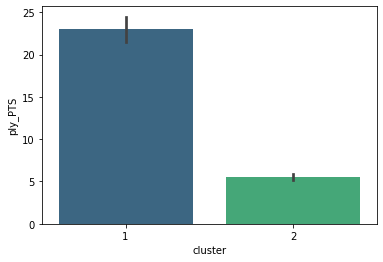

In [1012]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_gov,
            palette='viridis', estimator=np.mean)

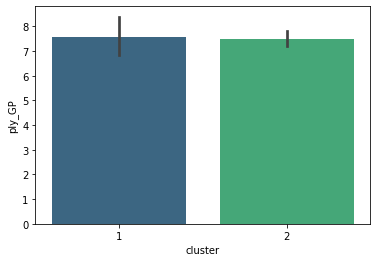

In [1013]:
# sns.barplot(x='cluster', y='MIN', data=df_avg_player_cluster,
#             estimator=np.mean)
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_gov,
            palette='viridis', estimator=np.mean)

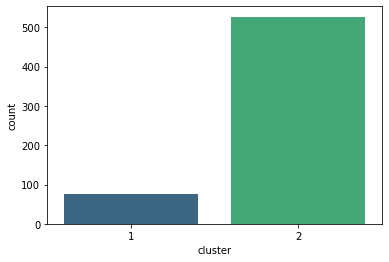

In [1014]:
sns.countplot(x='cluster', data=df_avg_player_team_gov,
             palette='viridis');

#### Radar plot

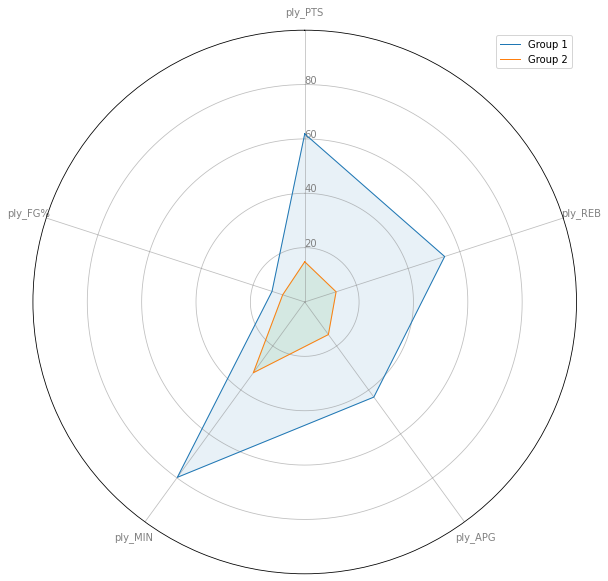

In [1015]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_gov[['cluster', 'ply_PTS',
                                   'ply_REB', 'ply_APG', 'ply_MIN',
                                   'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average Player Statistics Commisioner's Cup

In [1016]:
m1 = df_avg_player_team.conference == 'COM'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_com = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_com.drop(['year', 'conference',
                                           'player_name', 'team_name',
                                           'pos', 'j_number',
                                           'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_com.pos)
target = lbl_enc.transform(df_avg_player_team_com.pos)

#### Explore Dimensionality Reduction

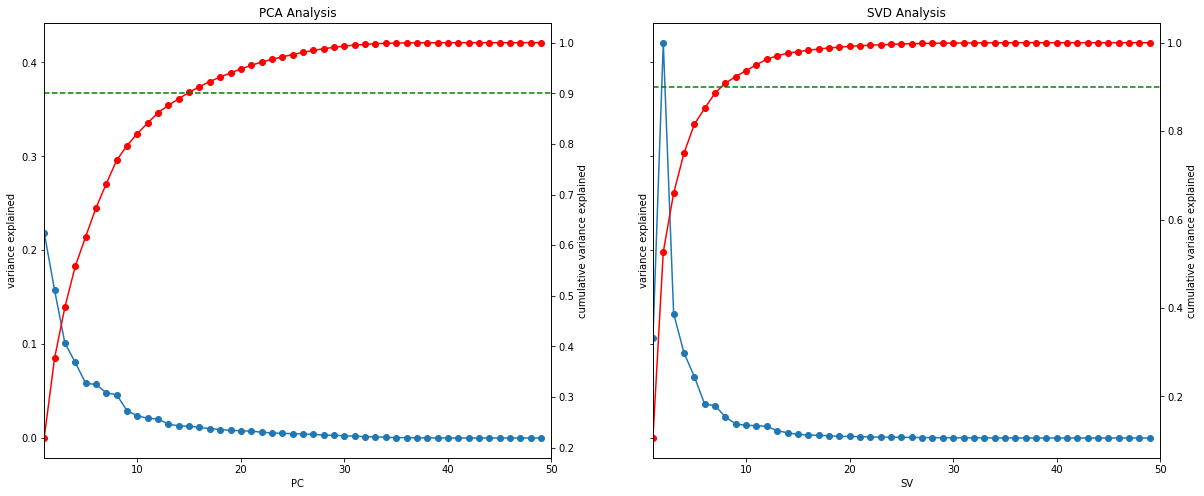

In [1017]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just 7 components where using PCA needed 15 components.

In [1018]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

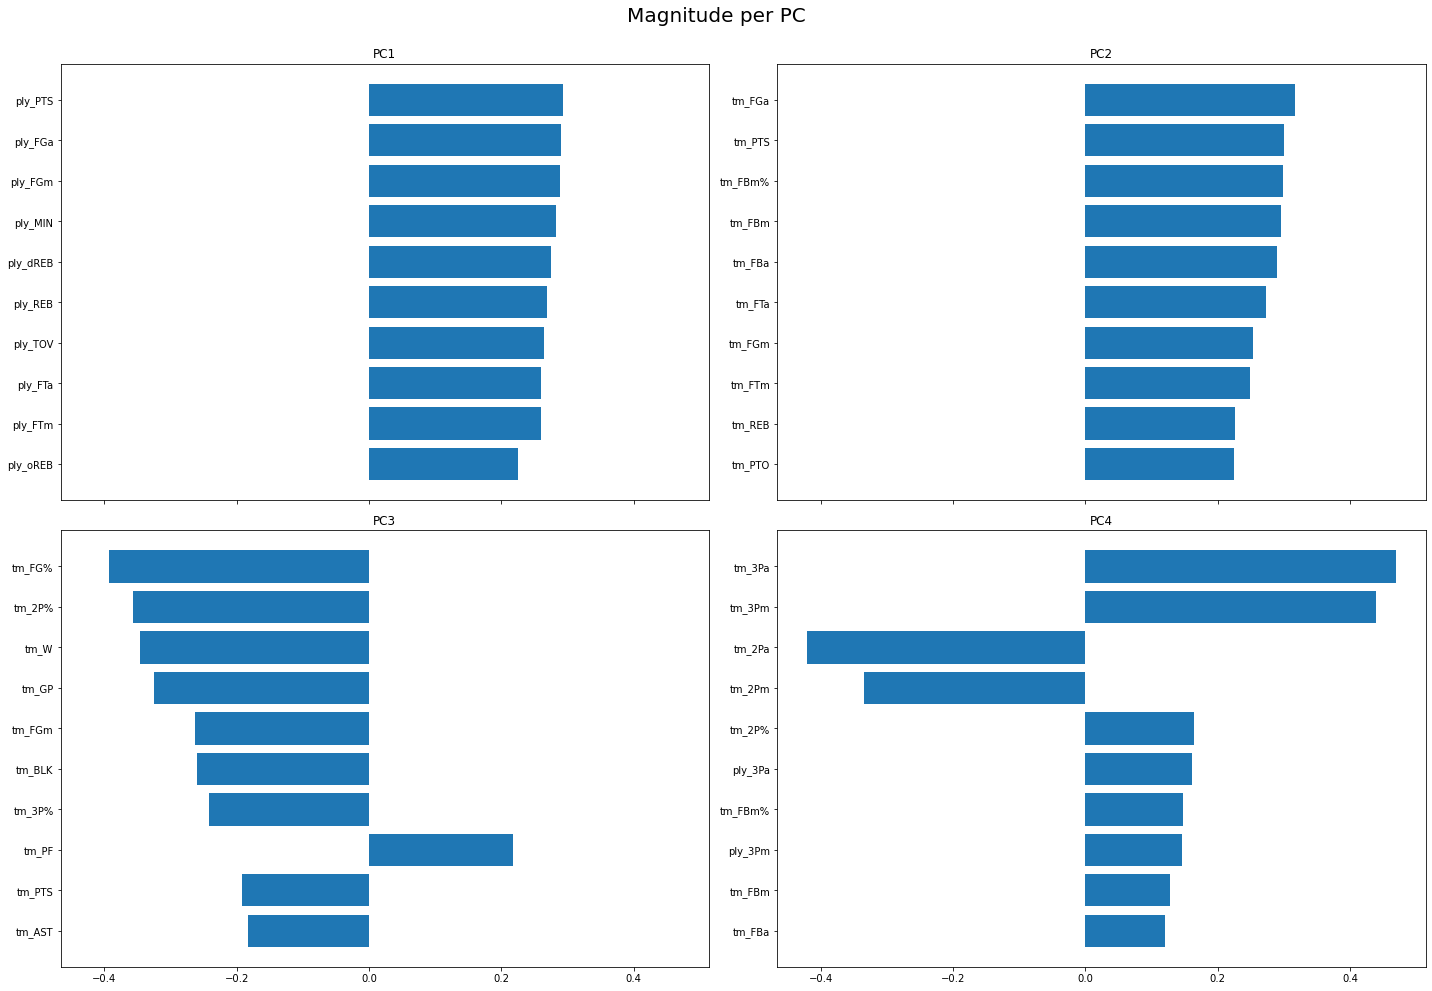

In [1019]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

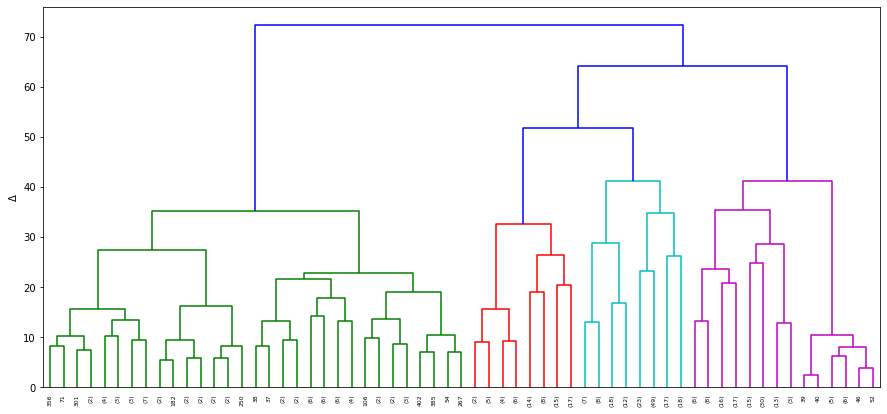

In [1020]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(200, c='r', linestyle='dashed');

#### Single Linkage Method

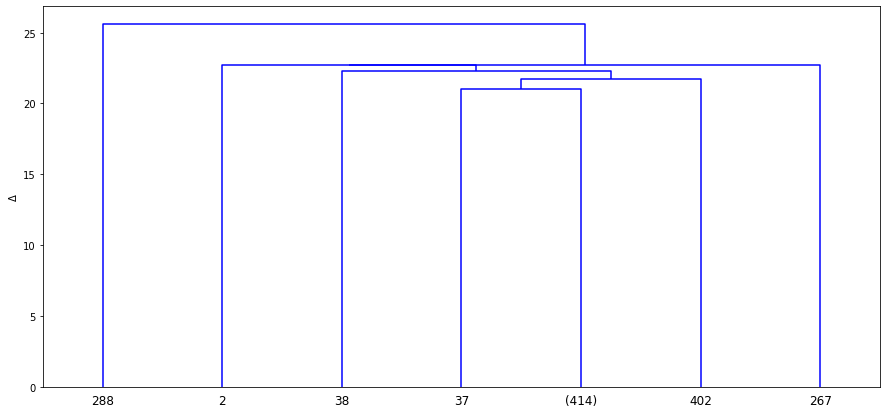

In [1021]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature_raw, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

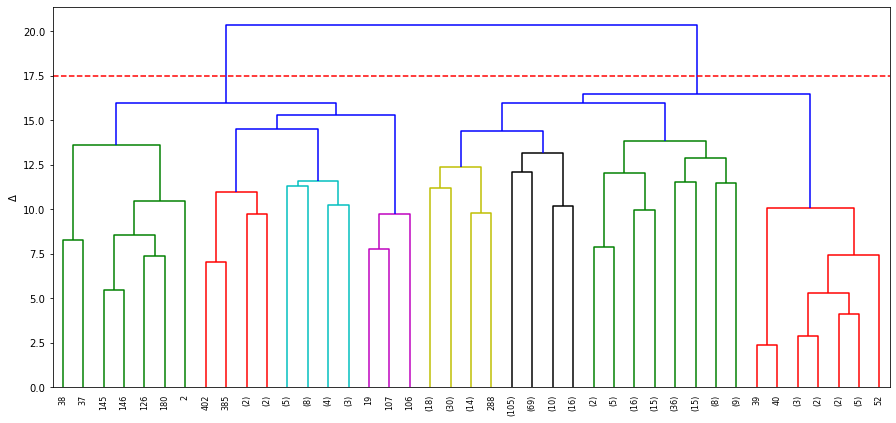

In [1022]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(17.5, c='r', linestyle='dashed');

#### Average Linkage Method

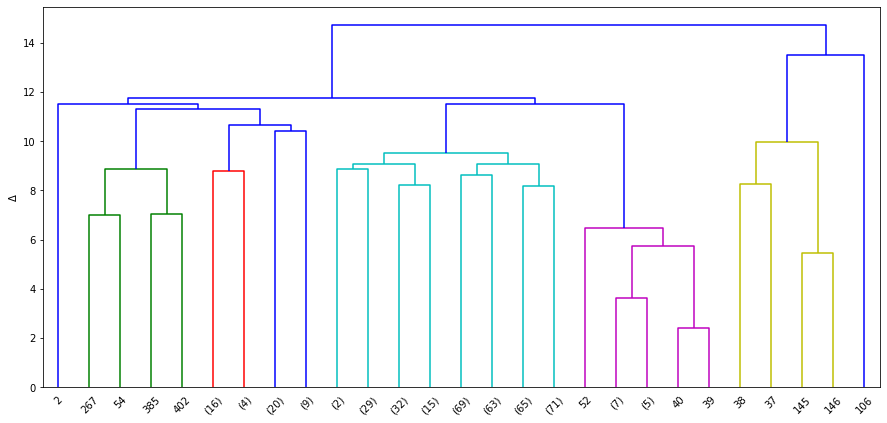

In [1023]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(28, c='r', linestyle='dashed');

#### Result

##### Choosing the right threshold

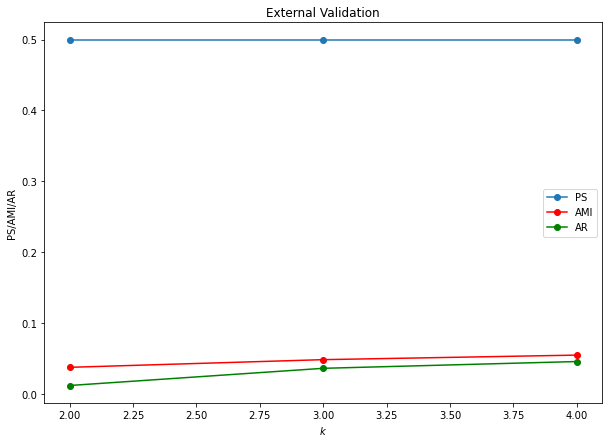

In [742]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'complete',
                          t_start=15, t_stop=17.5, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

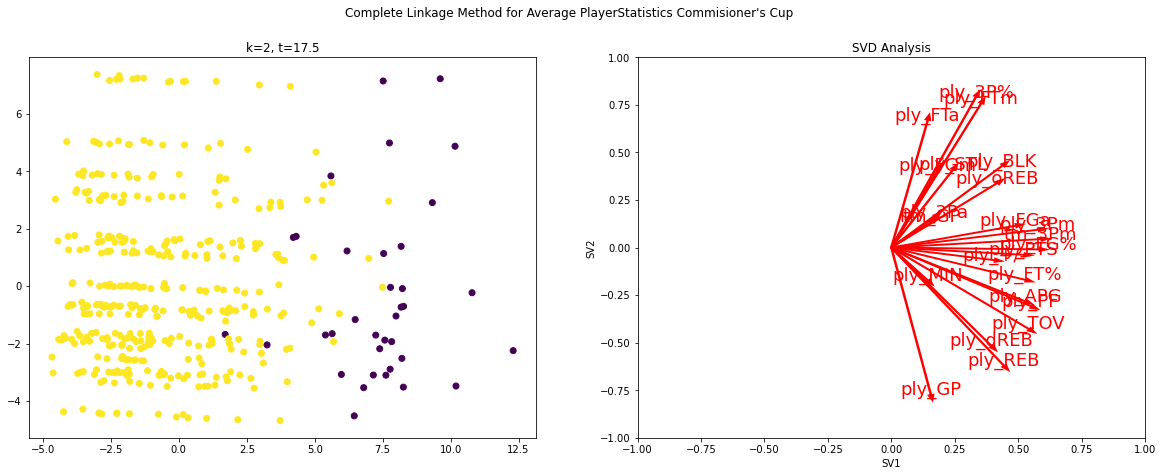

In [1024]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 17.5, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('SVD Analysis')

plt.suptitle("Complete Linkage Method for Average Player"
             "Statistics Commisioner's Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1025]:
y_cluster = fcluster(Z_complete, t=17.5, criterion='distance')
df_avg_player_team_com['cluster'] = y_cluster

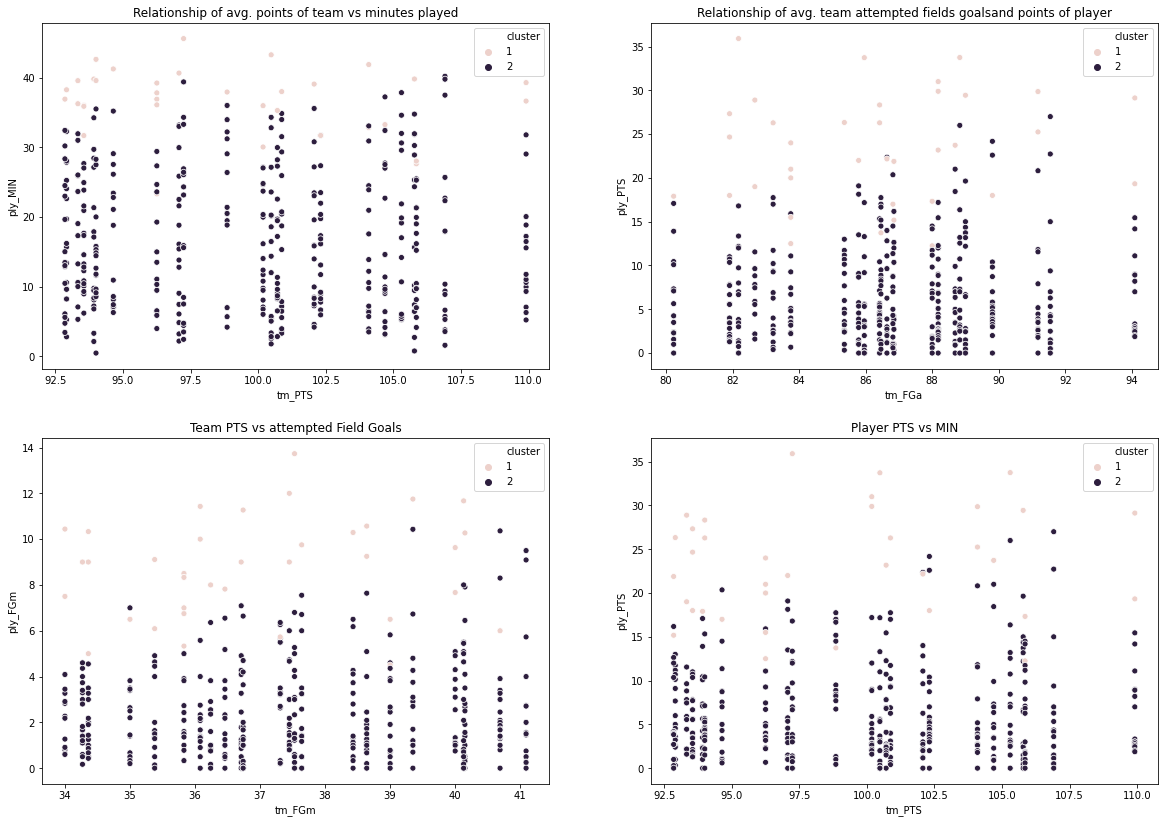

In [1026]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_com, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

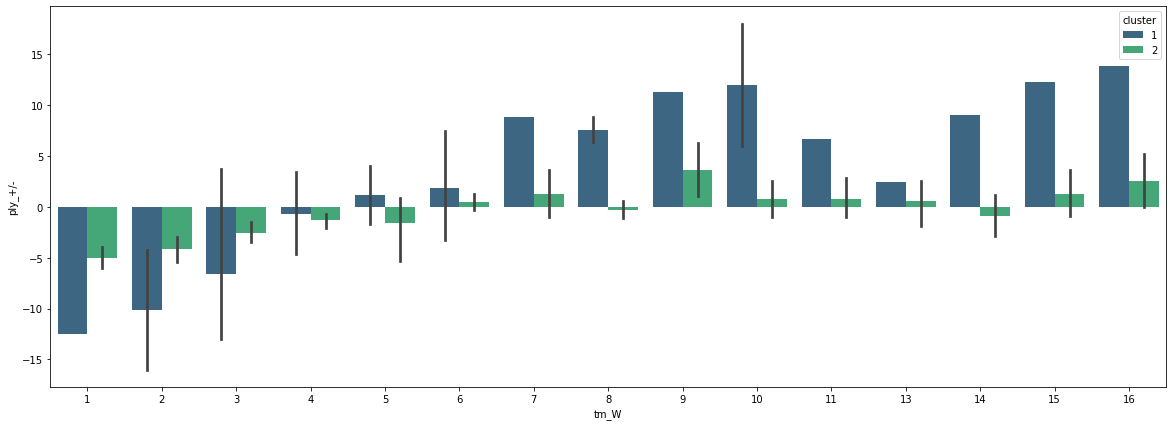

In [1027]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_com)
plt.show()

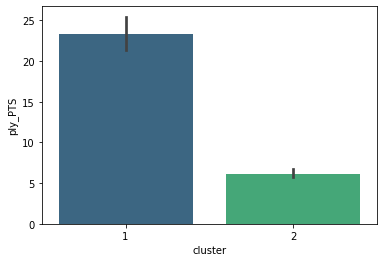

In [1028]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

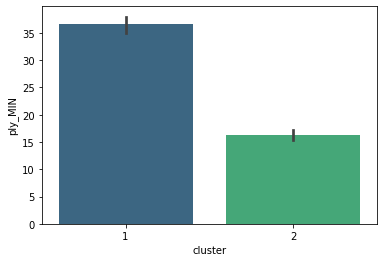

In [1029]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

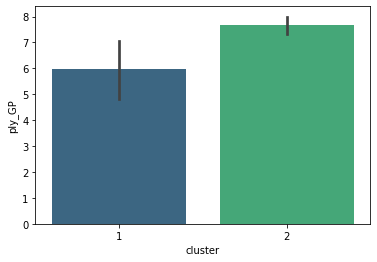

In [1030]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_com,
            palette='viridis', estimator=np.mean)

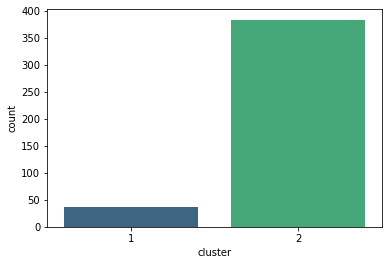

In [1031]:
sns.countplot(x='cluster', data=df_avg_player_team_com,
             palette='viridis');

#### Radar plot

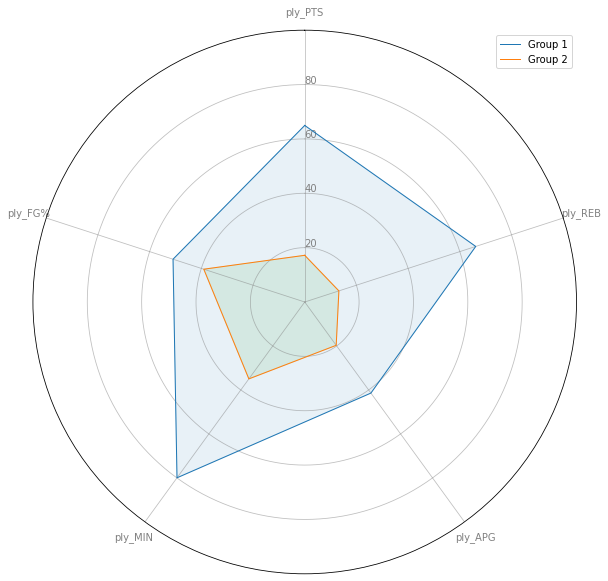

In [1032]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_com[['cluster', 'ply_PTS',
                                   'ply_REB', 'ply_APG', 'ply_MIN',
                                   'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:green'])
plt.legend();

### Average Player Statistics Philippine Cup

In [1033]:
m1 = df_avg_player_team.conference == 'PH'
m2 = df_avg_player_team.year.astype(int) < 2020
df_avg_player_team_ph = df_avg_player_team.loc[m1 & m2].copy()

feature_raw = df_avg_player_team_ph.drop(['year', 'conference', 'player_name',
                                      'team_name', 'pos', 'j_number',
                                      'height', 'weight'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)
lbl_enc = LabelEncoder().fit(df_avg_player_team_ph.pos)
target = lbl_enc.transform(df_avg_player_team_ph.pos)

#### Explore Dimensionality Reduction

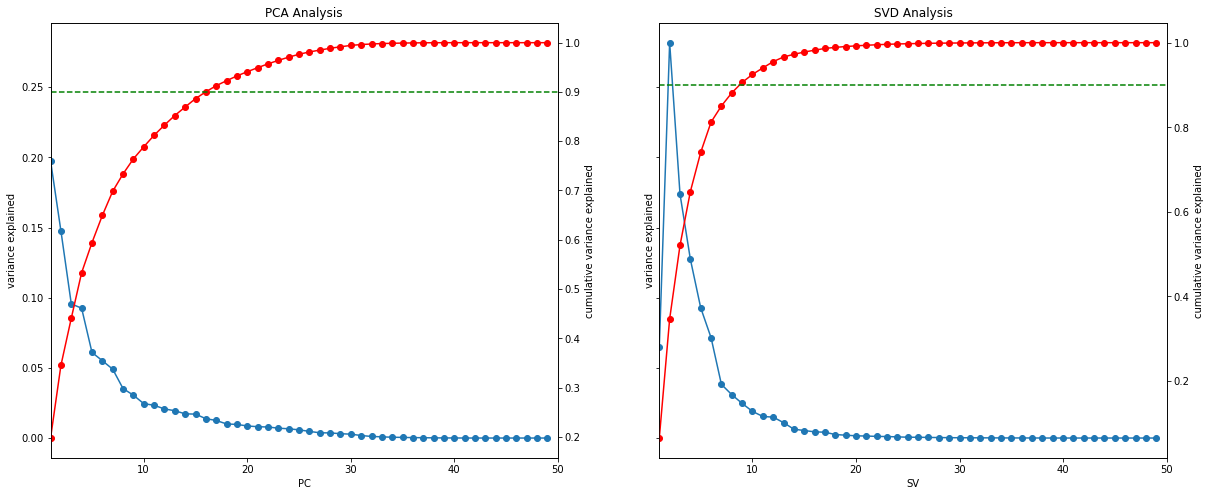

In [1034]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True,
                               sharex=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using Truncated SVD is better than using PCA since we achieved an estimated 90% cumulative explained variance with just 9 components where using PCA needed 16 components.

In [1035]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

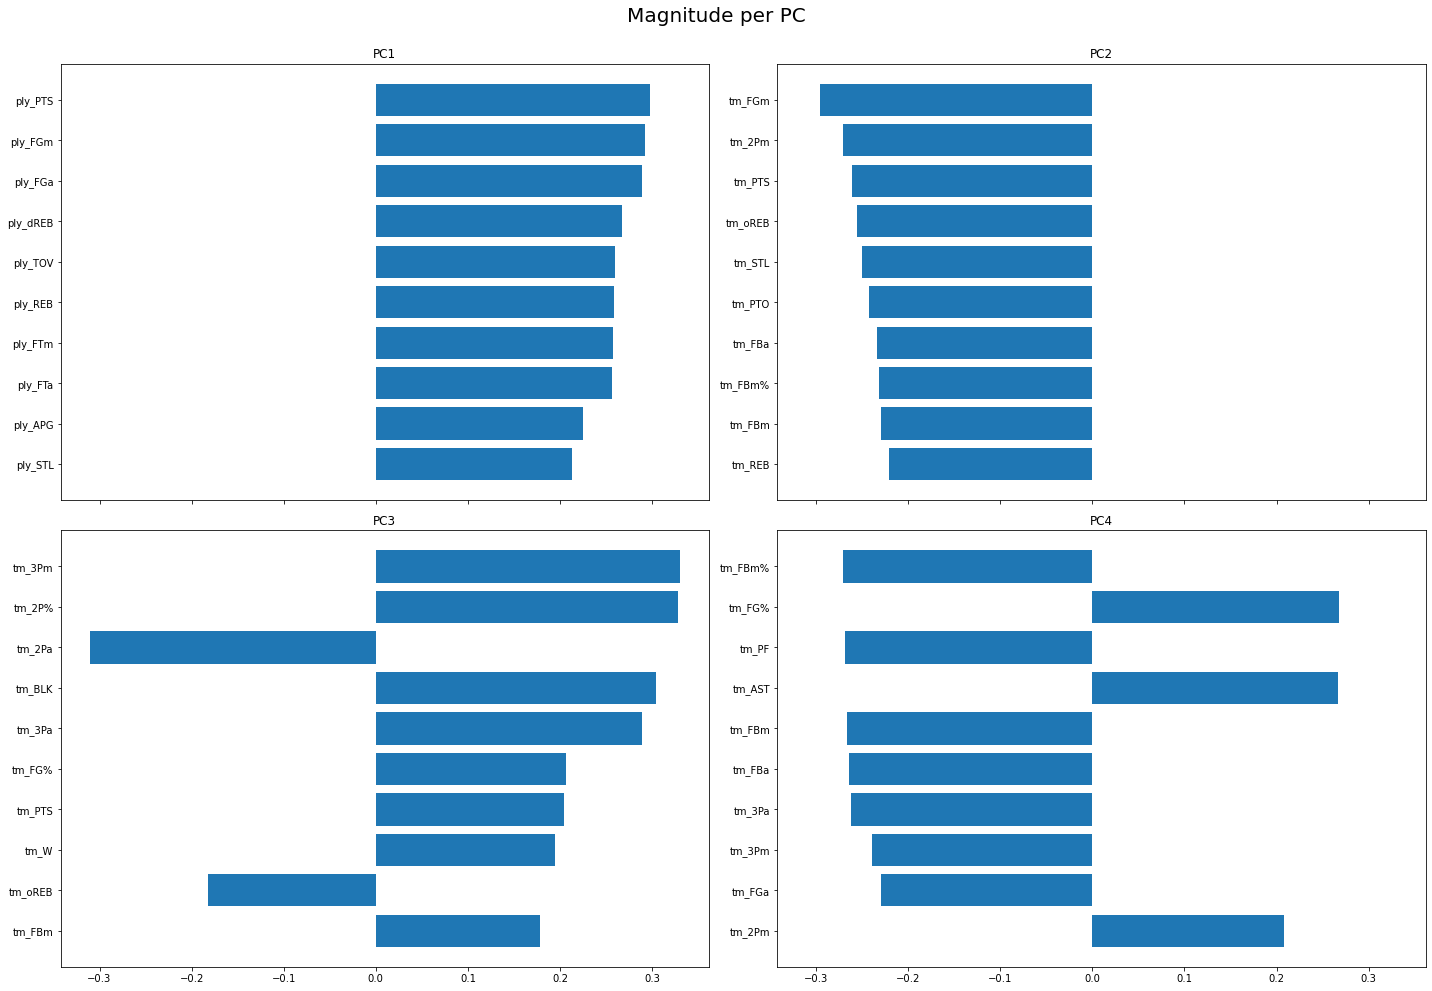

In [1036]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

#### Ward's Method

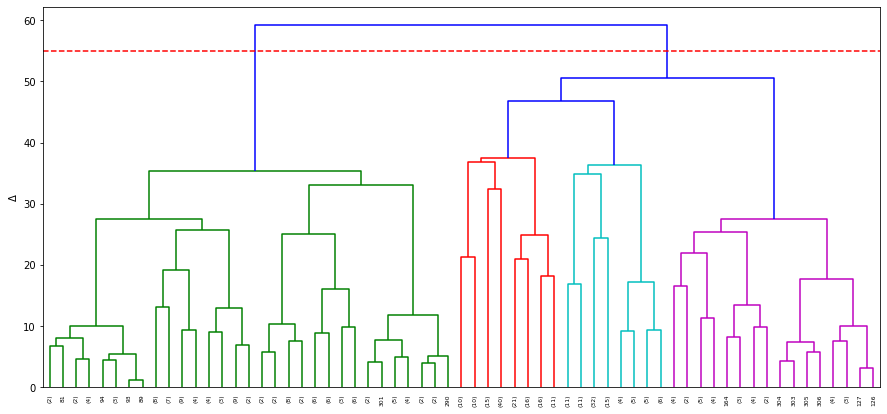

In [1037]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(55, c='r', linestyle='dashed');

#### Single Linkage Method

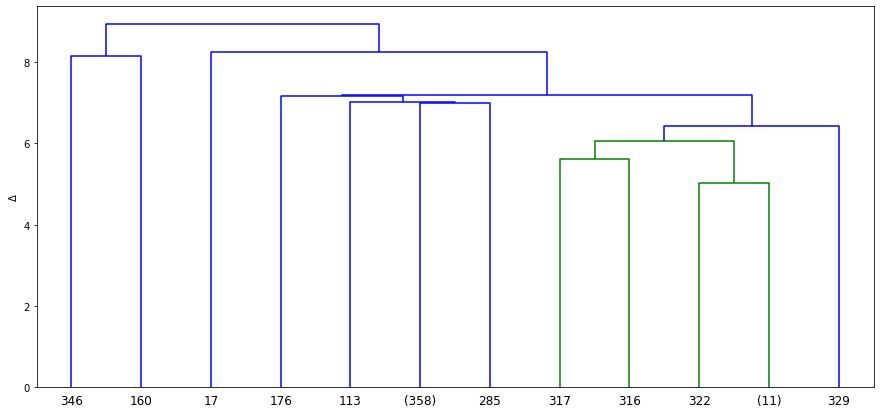

In [1038]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

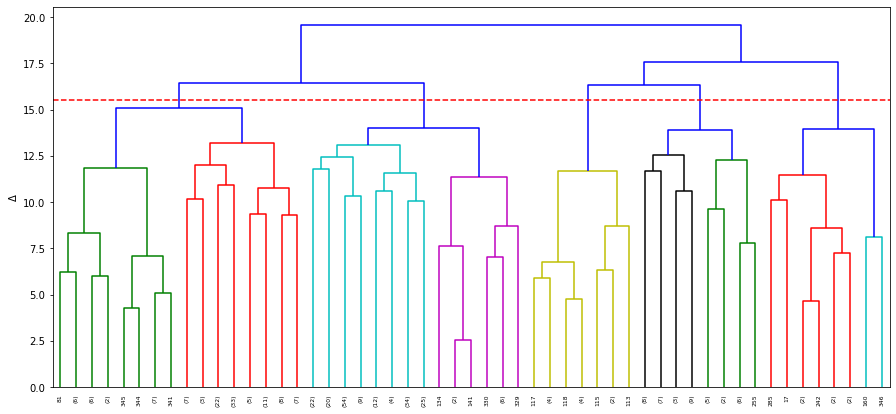

In [1042]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(15.5, c='r', linestyle='dashed');

#### Average Linkage Method

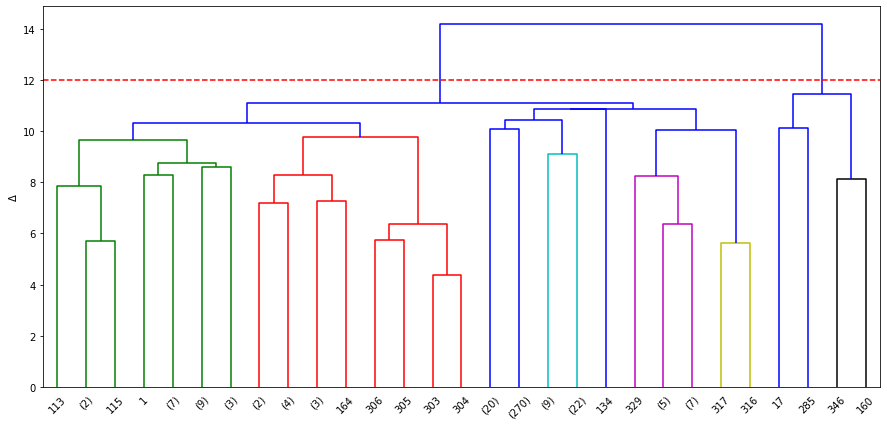

In [1040]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)
ax.axhline(12, c='r', linestyle='dashed');

#### Result

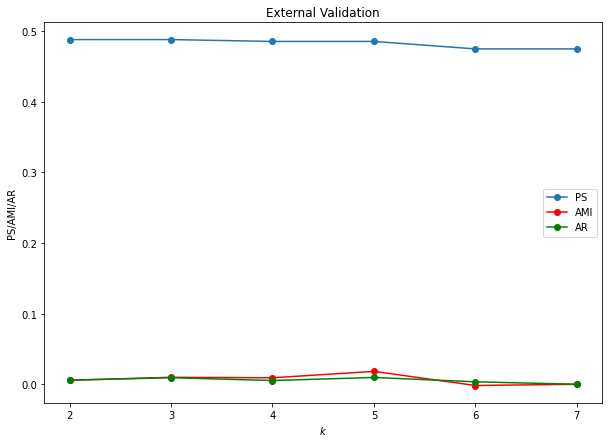

In [763]:
fig, ax = plt.subplots(figsize=(10, 7))
res = agglo_cluster_range(feature, 'complete',
                          t_start=13, t_stop=20, actual=target)
plot_external(res['ps'], res['amis'], res['ars'], ax)
ax.set_title('External Validation')
plt.show()

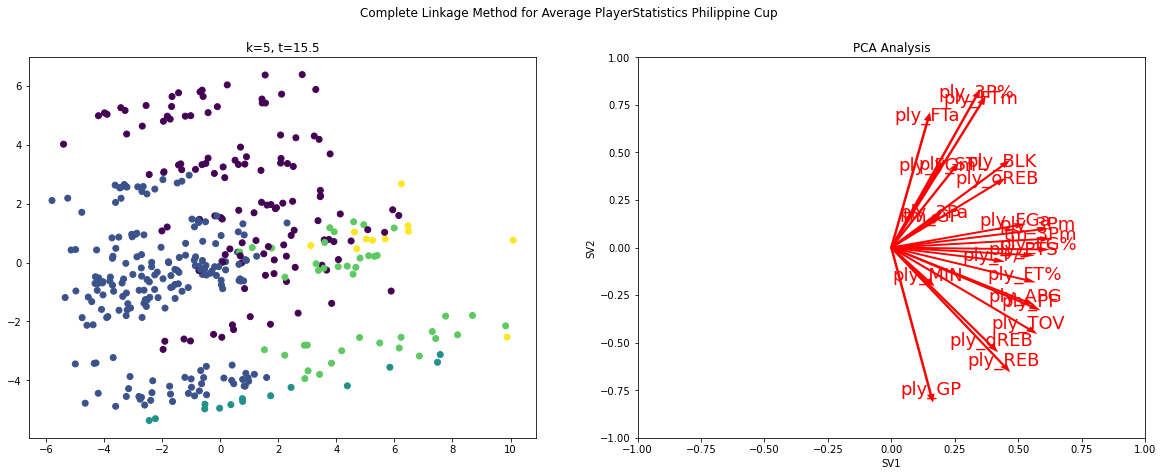

In [1043]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 15.5, ax1)
ax2= plot_svd(feature_raw.columns, svd_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Complete Linkage Method for Average Player"
             "Statistics Philippine Cup");

Even though using Ward's method generates a dendrogram, the generated top-level clusters are far from the complete linkage method, overtaking Ward's method in the cost of the delta.  Using the Complete linkage method produced clusters that are clearly separated from each other with a threshold of 45, where the threshold of Ward's method is 250, five times larger. The average linkage method also performed well in clustering the player statistics, although we still choose the Complete linkage method since to accomplish a more balanced cluster.

Observing the SV1 and SV2 of the decomposed dataset, we can find that the most dominant feature in SV2 is PTS, while MIN is the most dominant feature in SV1. The number of average minutes per game of the player is slightly correlated with the average number of games the player has played. As the player plays more games, the average minutes per game would most likely increase. However, the number of games played by the player and the average points the player vectors are orthogonal. Thus, we can say that there is no correlation between the GP and PTS. Even though players who have played numerous do not increase the average points, they would in the season. Upon further examining the plot above, we infer that the average field goals attempted by the player is correlated to the points he makes. As players who have numerous attempts to score a point would most likely increase average points they make per season.

In [1053]:
y_cluster = fcluster(Z_complete, t=15.5, criterion='distance')
df_avg_player_team_ph['cluster'] = y_cluster

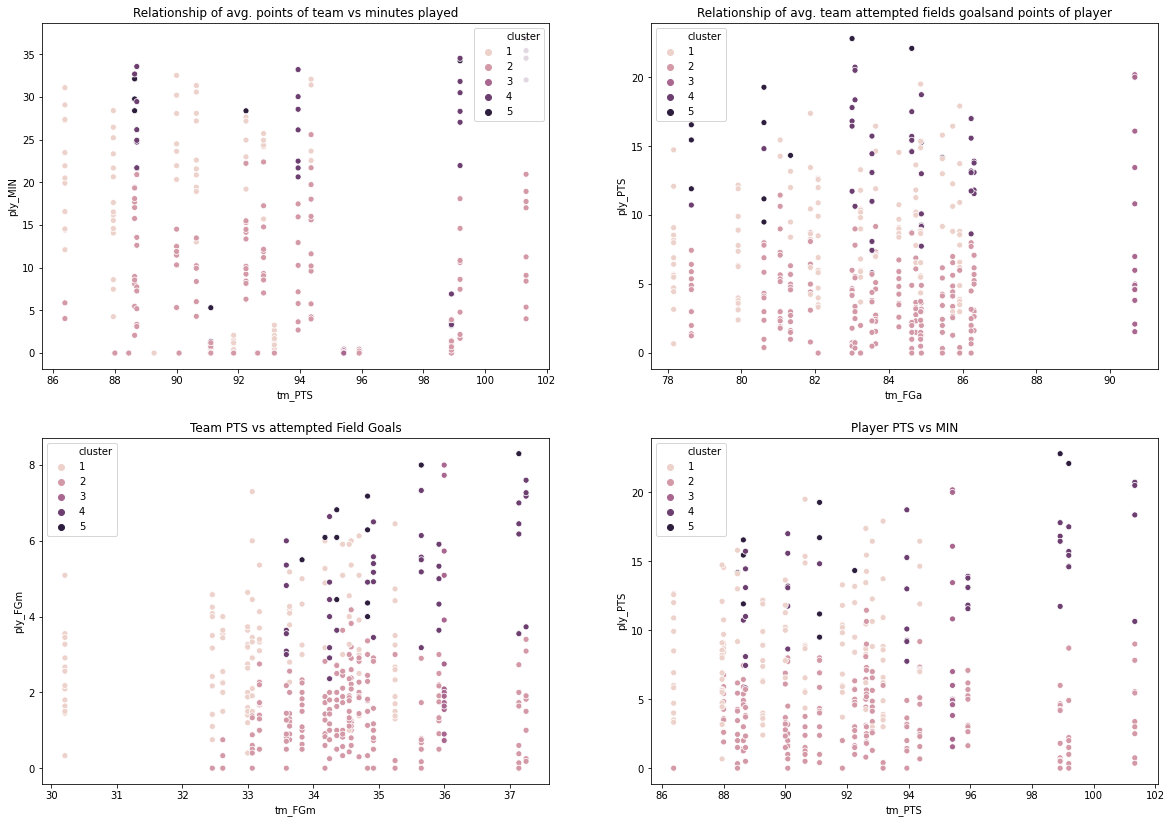

In [1054]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14))

ax1.set_title('Relationship of avg. points of team vs minutes played')
sns.scatterplot(x='tm_PTS', y='ply_MIN', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax1)

ax2.set_title('Relationship of avg. team attempted fields goals'
              'and points of player')
sns.scatterplot(x='tm_FGa', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax2)

ax3.set_title('Team PTS vs attempted Field Goals')
sns.scatterplot(x='tm_FGm', y='ply_FGm', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax3)

ax4.set_title('Player PTS vs MIN')
sns.scatterplot(x='tm_PTS', y='ply_PTS', hue='cluster', legend='full',
                data=df_avg_player_team_ph, ax=ax4)
plt.show()

From the plot above, as the average of points and FGa attempted increases, the predicted group of the cluster change as well. Most of the players who have been clustered in group 1 have minimal attempts to make a score and earn points. We can infer that players that have been clustered in this group are backup defensive players. While players who belong in group 4 have high field goal attempts and points made are starting and offensive players.  Upon further investigation, we also observed players who have low average minutes per game they played belong in group 1. Most of the players who reside in cluster 4 have high average minutes per game. However, we can see players who have numerous games played belongs to group 3. We can infer that players in this group have a good average on earning points and belong to a strong team, thus playing in numerous games while most players belonging to group 4 are from the teams that are eliminated earlier in the season.

(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.

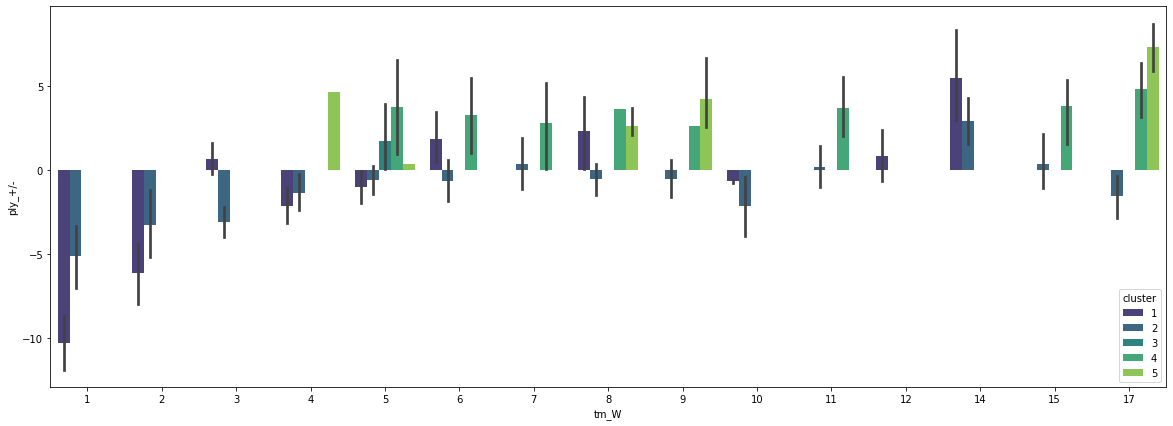

In [1055]:
plt.subplots(figsize=(20, 7))
sns.barplot(x='tm_W', y='ply_+/-', hue='cluster',
            estimator=np.mean, palette='viridis',
            data=df_avg_player_team_ph)
plt.show()

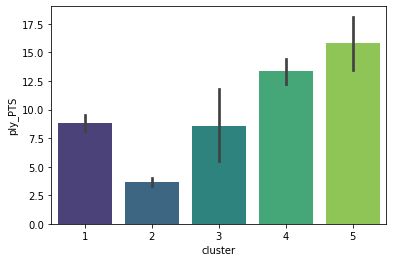

In [1056]:
sns.barplot(x='cluster', y='ply_PTS', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

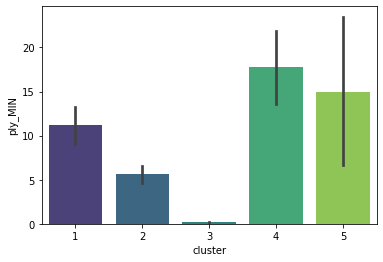

In [1057]:
sns.barplot(x='cluster', y='ply_MIN', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

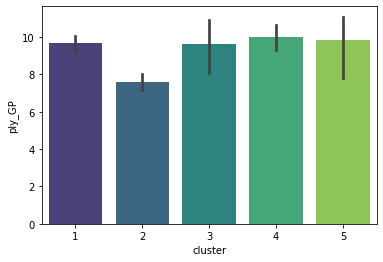

In [1058]:
sns.barplot(x='cluster', y='ply_GP', data=df_avg_player_team_ph,
            palette='viridis', estimator=np.mean)

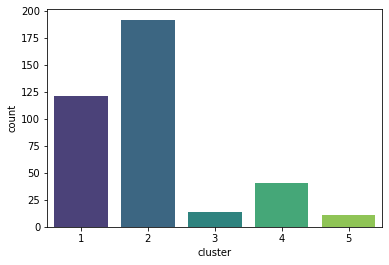

In [1059]:
sns.countplot(x='cluster', data=df_avg_player_team_ph,
             palette='viridis');

#### Radar plot

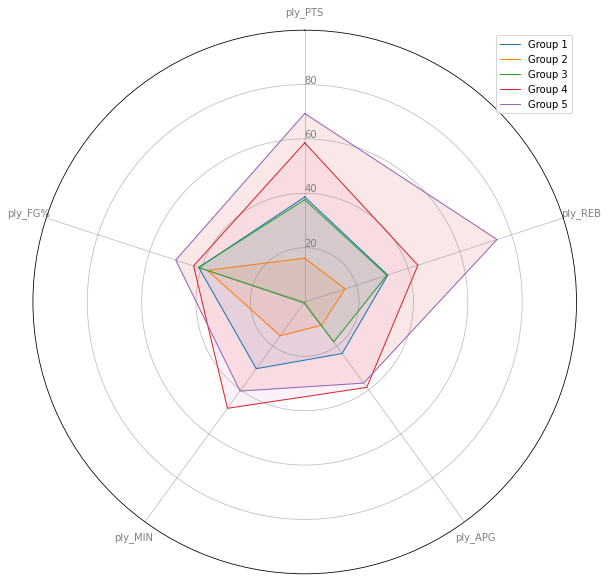

In [1060]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_player_team_ph[['cluster', 'ply_PTS',
                                  'ply_REB', 'ply_APG', 'ply_MIN',
                                  'ply_FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'tab:orange', 'tab:green',
                         'tab:pink', 'tab:red'])
plt.legend();

## Average Team Statistics

### All average team statistics

In [70]:
df_avg_team = fetcher.get_avg_team()
df_avg_team = df_avg_team.loc[df_avg_team.year.astype(int) < 2020]
feature_raw = df_avg_team.drop(['year', 'conference', 'team_name'], axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

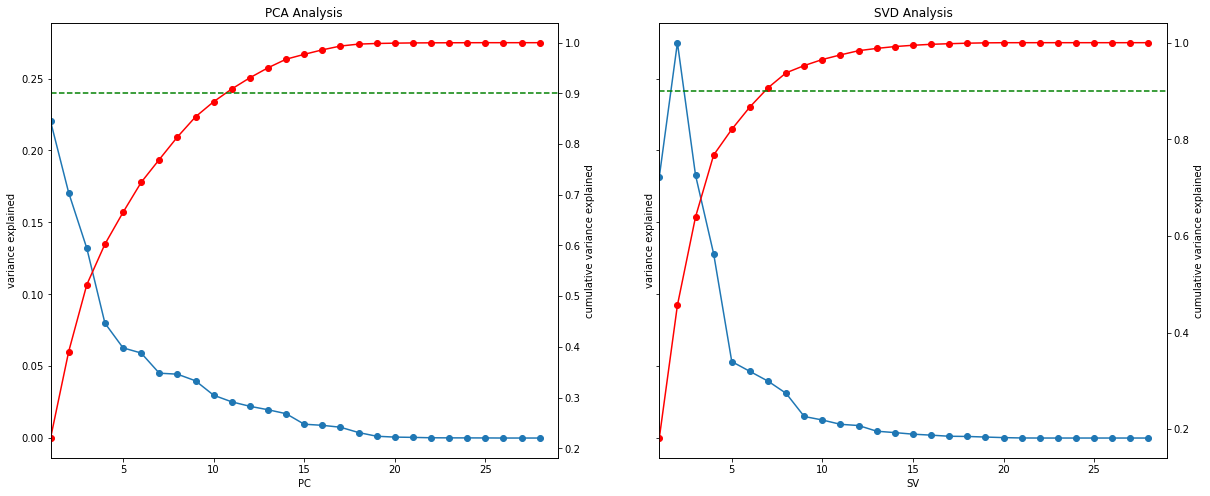

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(feature.shape[1] - 1).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 90% cumulative explained variance with just 7 components where using PCA needed 11 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [72]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

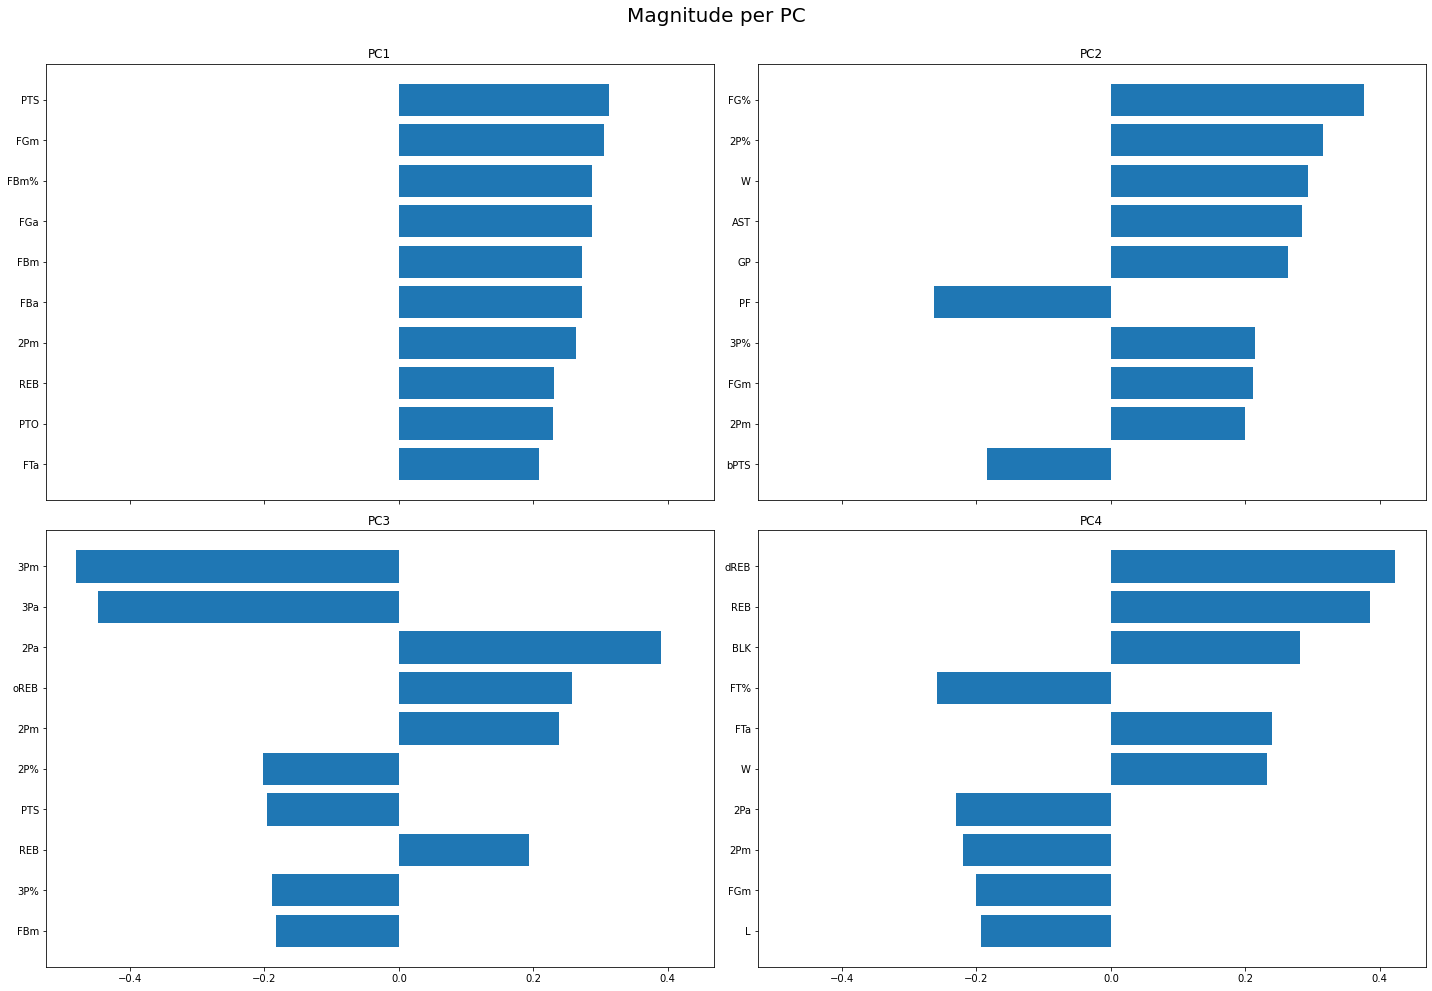

In [73]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that average points, field goals made and percentage are among the top features of Principal components 1 and 2.

#### Ward's Method

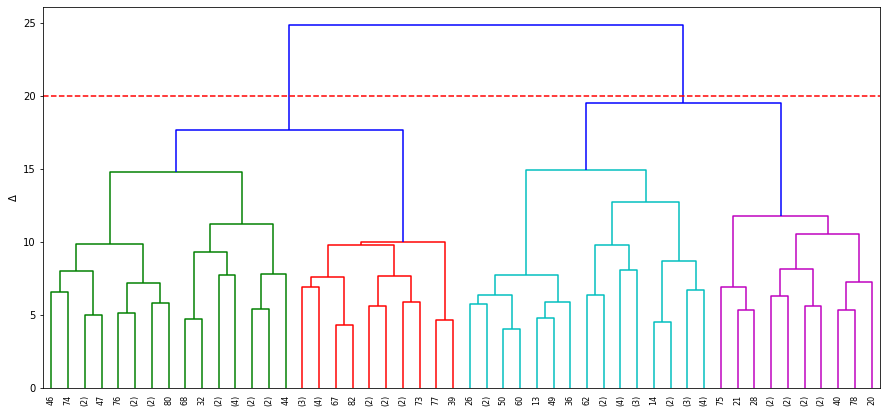

In [74]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(20, c='r', linestyle='dashed');

#### Single Linkage Method

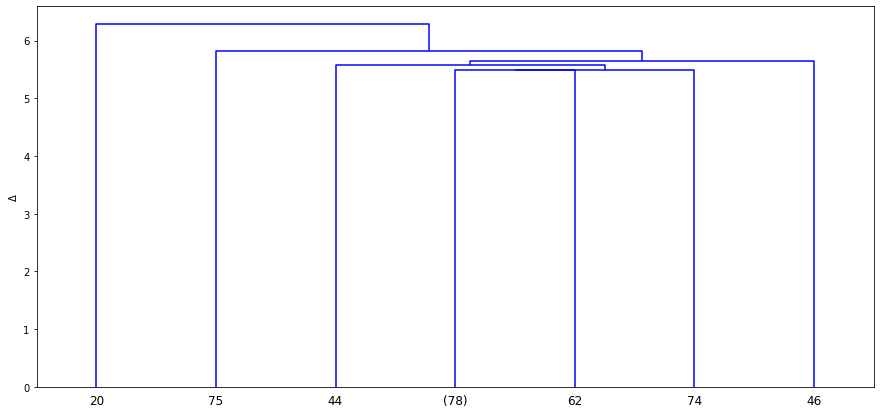

In [75]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

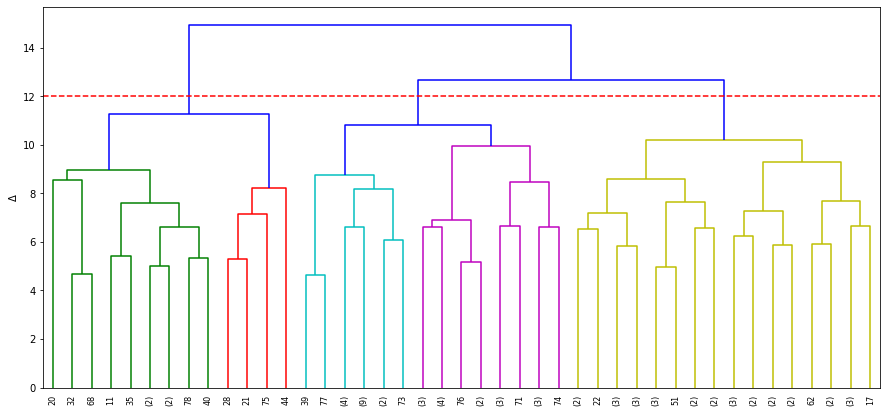

In [76]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(12, c='r', linestyle='dashed');

#### Average Linkage Method

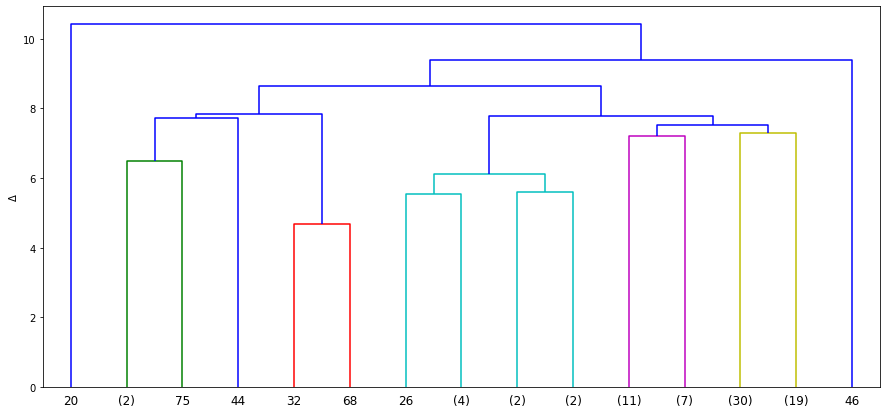

In [77]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

Comparing different hierarchical clustering methods, we conclude that using Complete Linkage method is the most suitable. The complete linkage method outperforms single and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into 2 groups with the highest distance for every cluster, whereas complete linkage formed 3 groups which is more balanced.

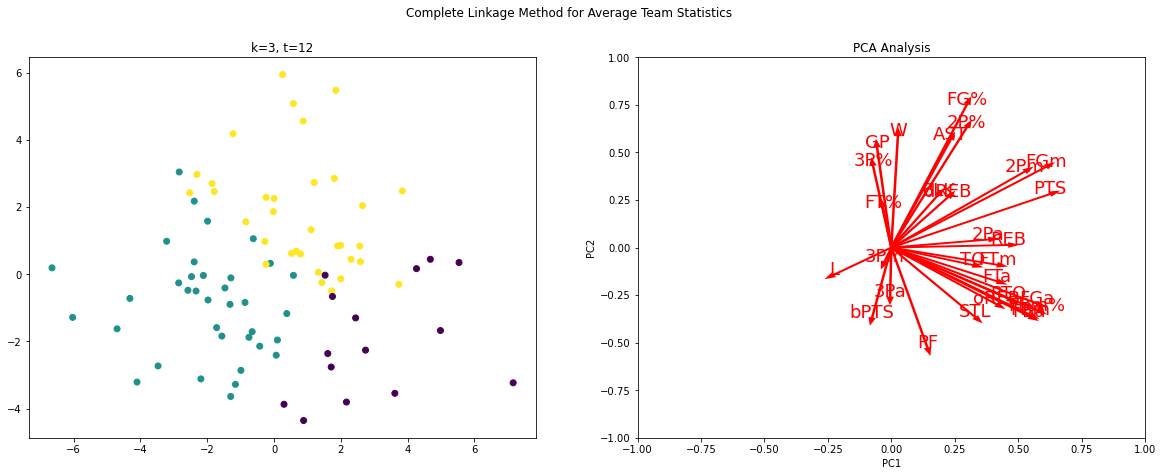

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 12, ax1)
ax2= plot_pca(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')
ax

plt.suptitle("Complete Linkage Method for Average Team Statistics");

Observing the PC1 and PC2 of the decomposed dataset, we can find that the most dominant feature in PC2 is the three-point blocks, rebound and percentage, attempted, made and height. While the most dominant feature in PC1 is the average points, field goals attempted and made. Upon further examining the plot above, we infer that offensive teams that excel with three-point shots most probably does not excel in height or defense attributes like block and rebounds. Since the the assist per game and steals is orthogonal to blocks and rebounds, we can infer that there is no correlation between the pair.

In [79]:
y_cluster = fcluster(Z_complete, t=12, criterion='distance')
df_avg_team_cluster = df_avg_team.copy()
df_avg_team_cluster['cluster'] = y_cluster

#### Radar plot

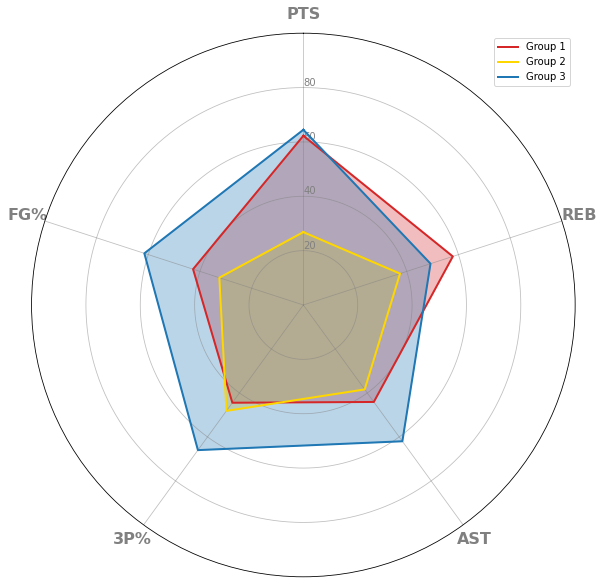

In [81]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_cluster[['cluster', 'PTS',
                                'REB', 'AST', '3P%',
                                'FG%']].copy()
plot_radar(df_radar, ax, ['tab:red', 'gold', 'tab:blue'])
plt.legend()

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, 3-points%, and field goal percentage of each clustered team. We have identified group 2 as teams that need improvement as they have the lowest skillset. However, these teams have a higher 3-points % than group 1, which are identified as defensive teams. Compared to the other clusters, the last group excels significantly on 3-points %, Field Goal %, and assist per game. This group relies heavily relies on teamwork, where 60% of their plays come with an assist.

### Average team statistics Governor's Cup

In [82]:
m1 = df_avg_team.conference == 'GOV'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_gov = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_gov.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

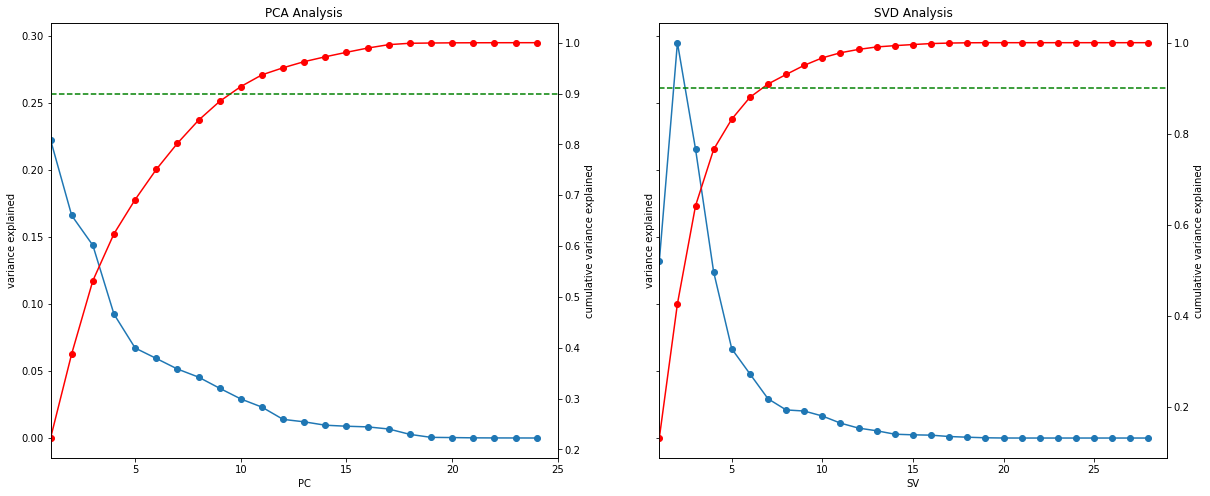

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 90% cumulative explained variance with just 7 components where using PCA needed 11 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [84]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

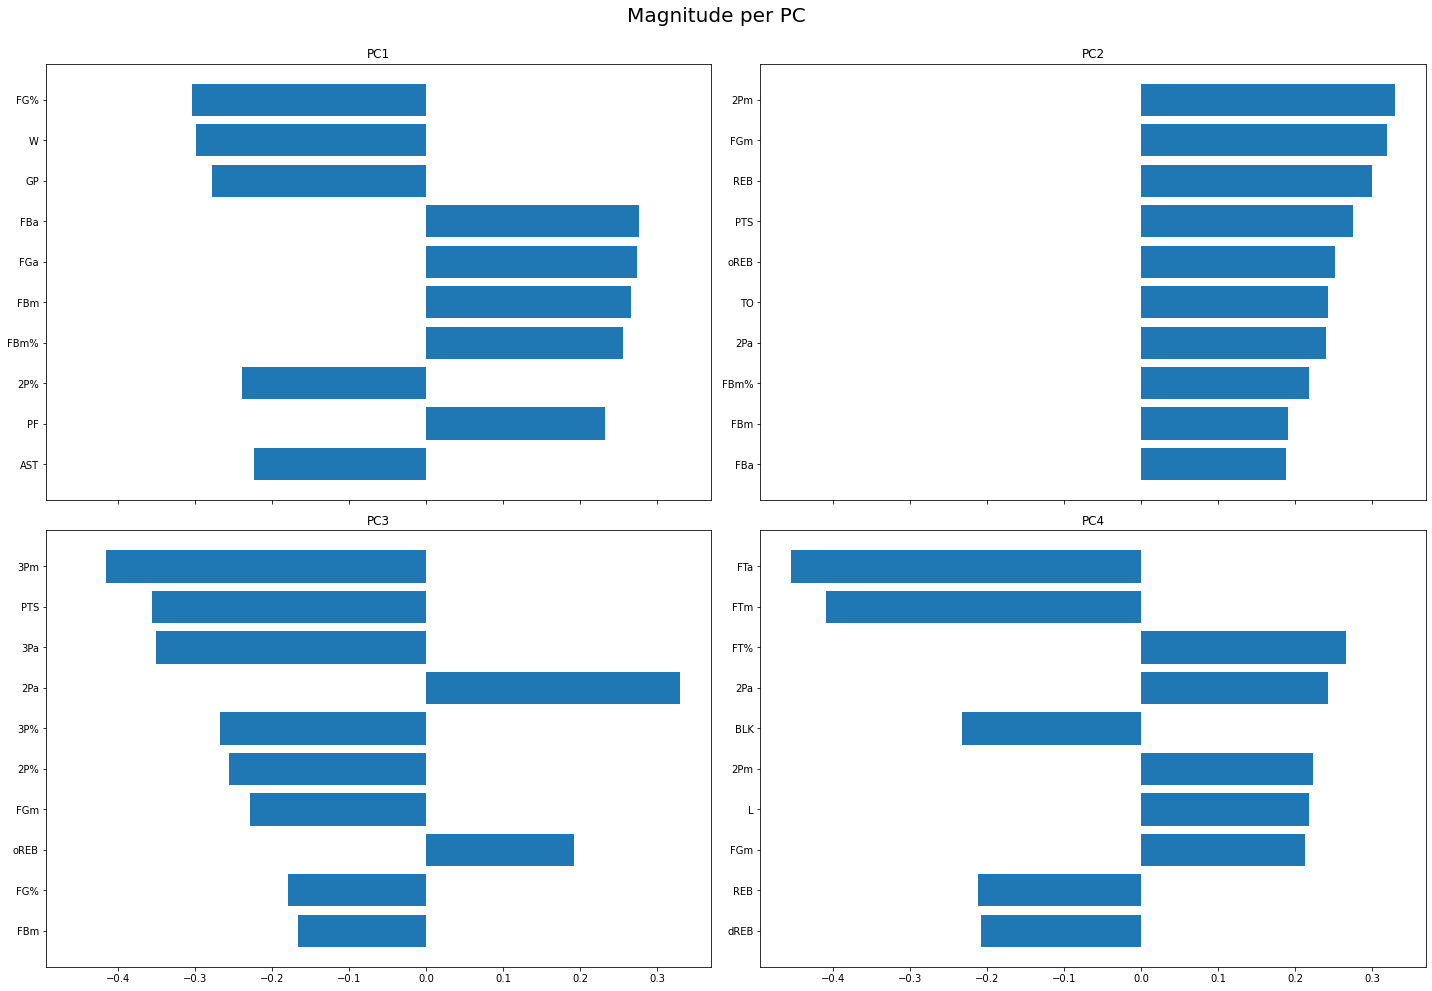

In [85]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that 2 points made, field goals made and percentage, and average team wins are among the top features of Principal components 1 and 2.

#### Ward's Method

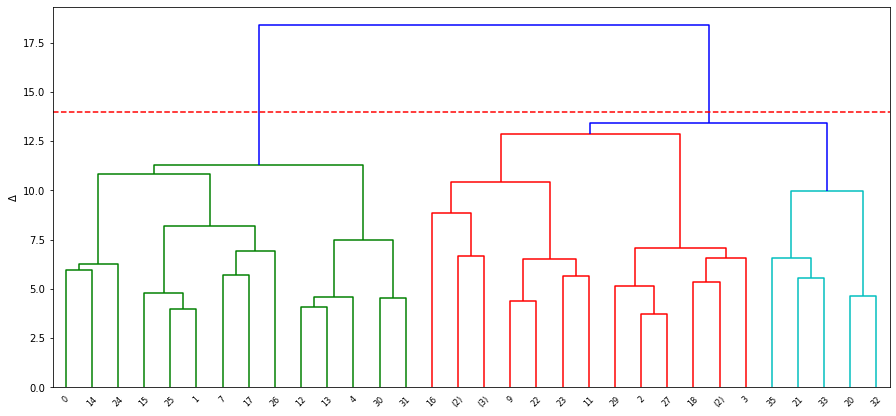

In [86]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(14, c='r', linestyle='dashed');

#### Single Linkage Method

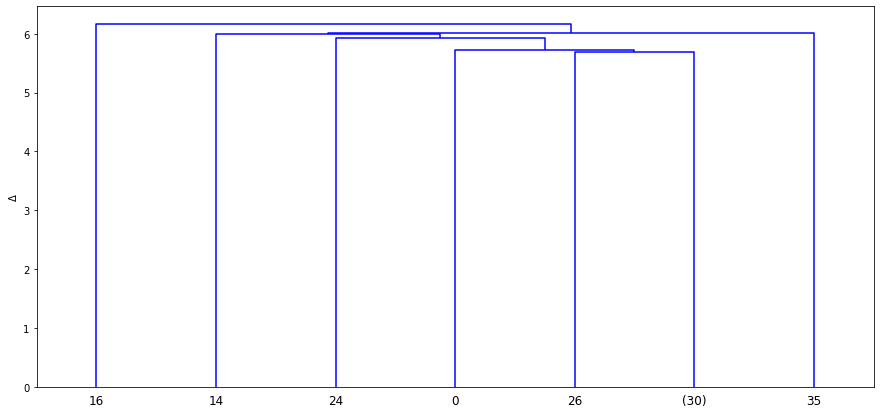

In [87]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

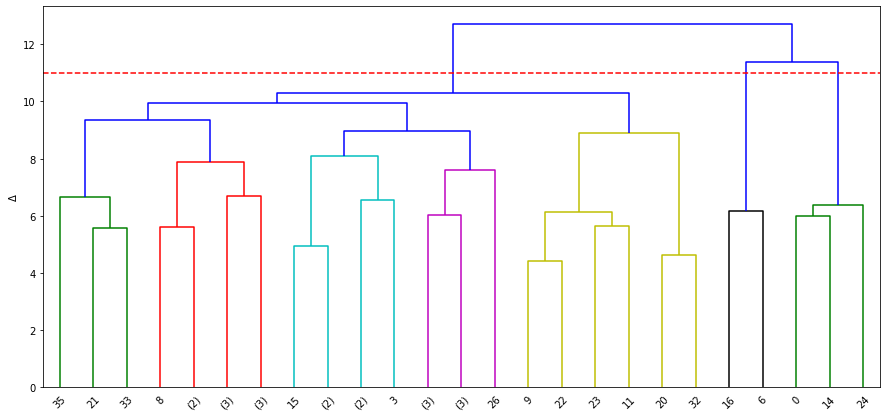

In [88]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

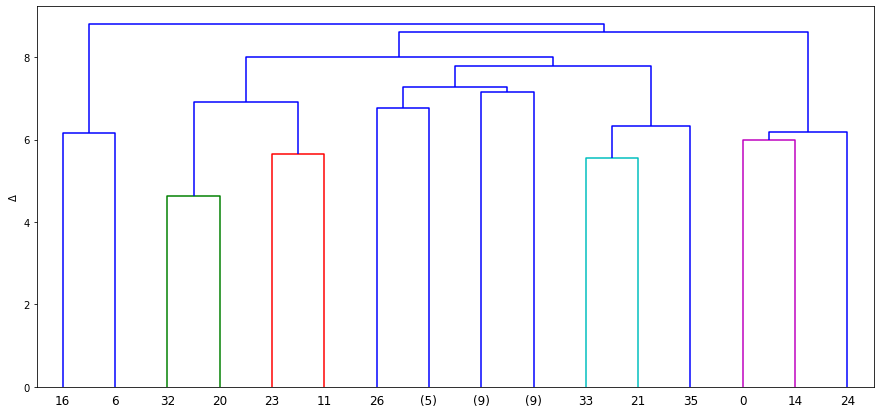

In [89]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

Comparing different hierarchical clustering methods, we conclude that using Complete Linkage method is the most suitable. The complete linkage method outperforms single and average linkage methods. Plotting the dendrogram of each method shows that Ward's method separated the dataset into 2 groups with the highest distance for every cluster, whereas complete linkage formed 3 groups which is more balanced and lower delta between clusters.

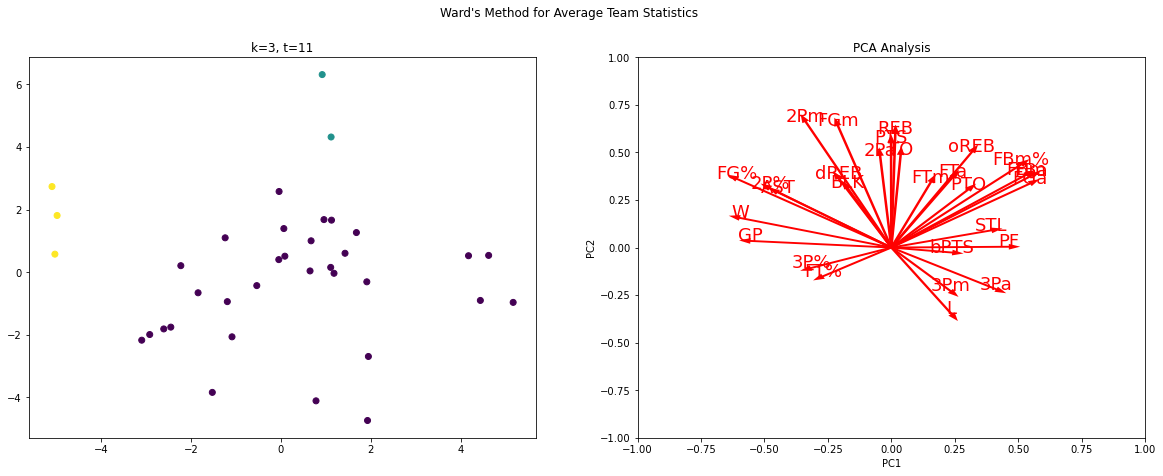

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_complete, 11, ax1)
ax2= plot_pca(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

Observing the PC1 and PC2 of the decomposed dataset, we find the average games the team has played and win, personal foul, and steals are the most dominant feature in principal component 1. In comparison, the most dominant feature of PC2 is the average number of rebounds, turnovers, and 2 points made by the player. Upon further investigation, the vector GP and W is heading towards the left direction while the PF head towards the right. We can infer that these two features are negatively correlated where if a team has a high number of a personal foul, those teams would most likely have fewer wins and games played. Observing other vectors that have this kind of relationship is the 2-points made and the number of losses of the team. We can also see that 2-Pm is also negatively correlated with 3-Pm. Teams that excel at earning scores at a score range mostly do not have good 3 point shooters.

In [91]:
y_cluster = fcluster(Z_complete, t=11, criterion='distance')
df_avg_team_gov['cluster'] = y_cluster

#### Radar plot

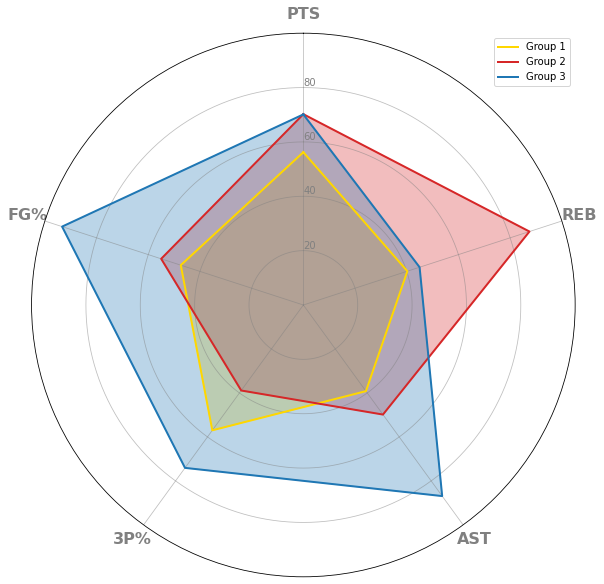

In [93]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_gov[['cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']].copy()
plot_radar(df_radar, ax, ['gold', 'tab:red', 'tab:blue'])
plt.legend();

### Average team statistics Commisioner's Cup

In [104]:
m1 = df_avg_team.conference == 'COM'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_com = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_com.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

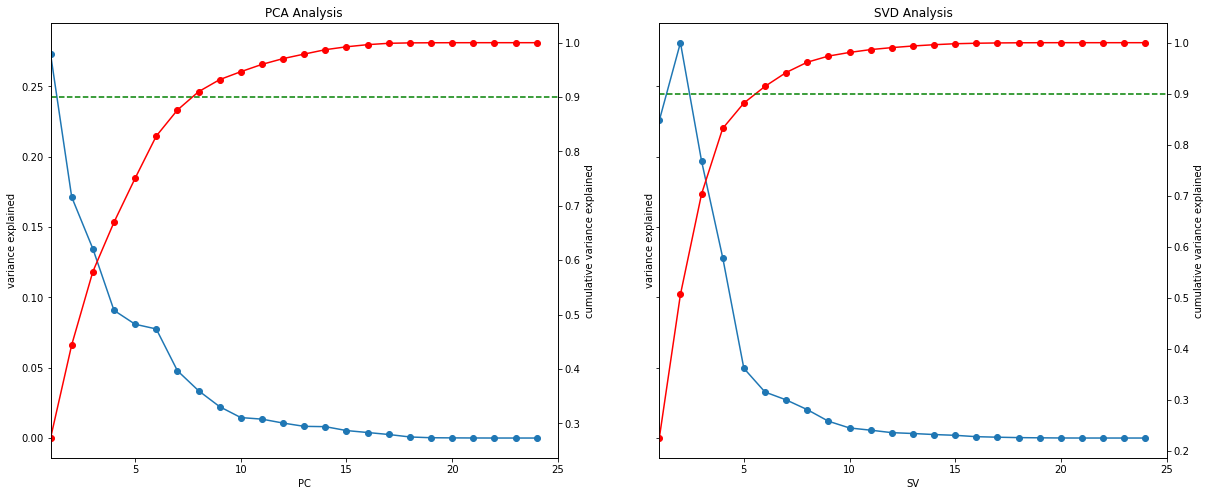

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 90% cumulative explained variance with just 7 components where using PCA needed 11 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [106]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

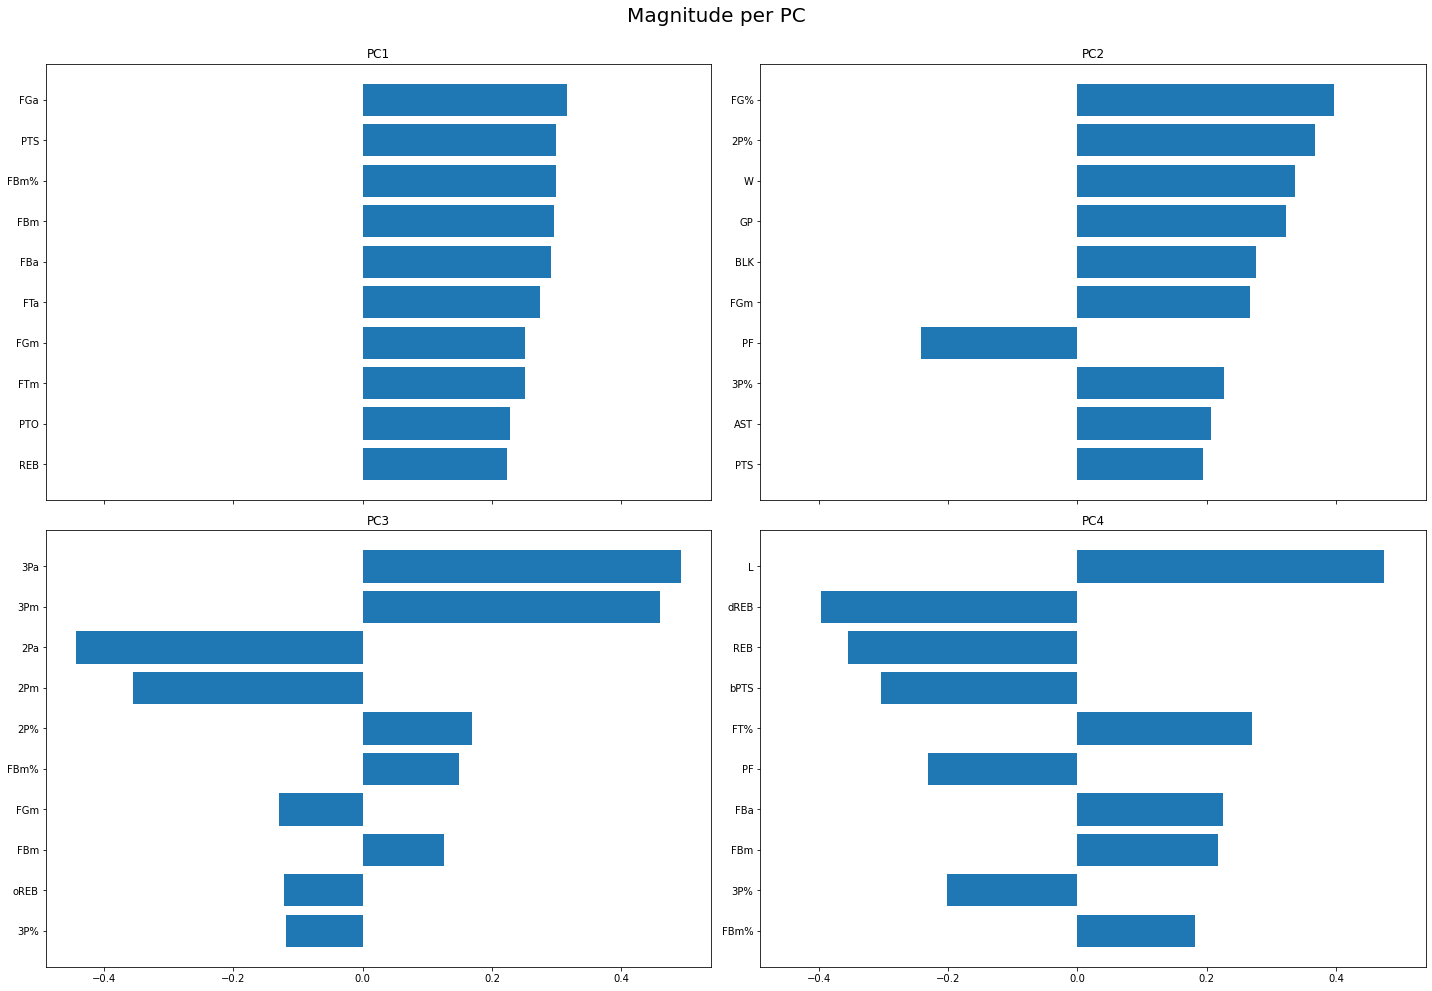

In [107]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that 2 points made, field goals made and percentage, and average team wins are among the top features of Principal components 1 and 2.

#### Ward's Method

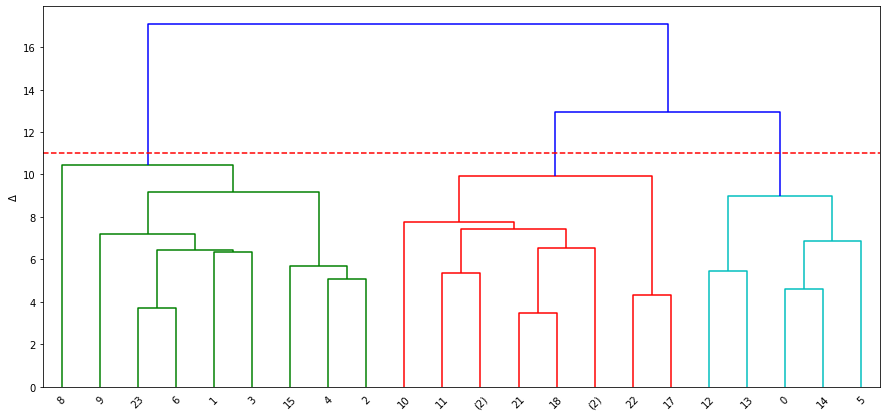

In [108]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Single Linkage Method

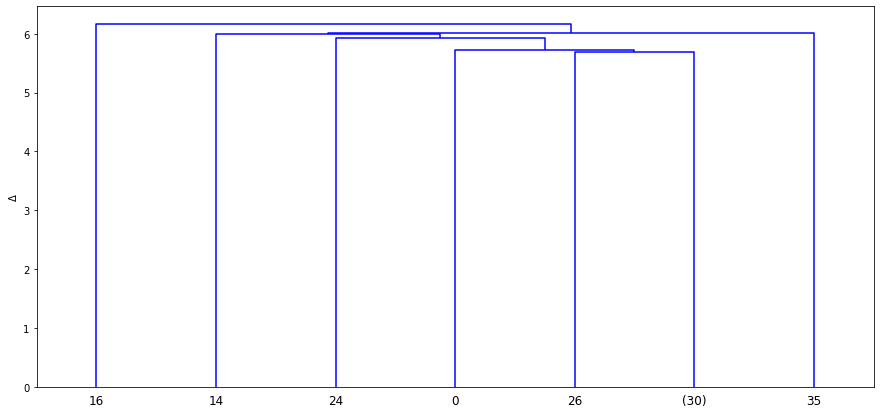

In [100]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

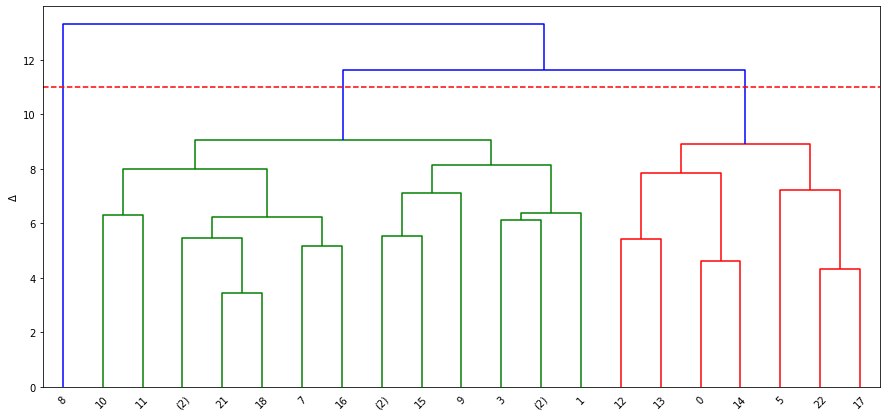

In [109]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

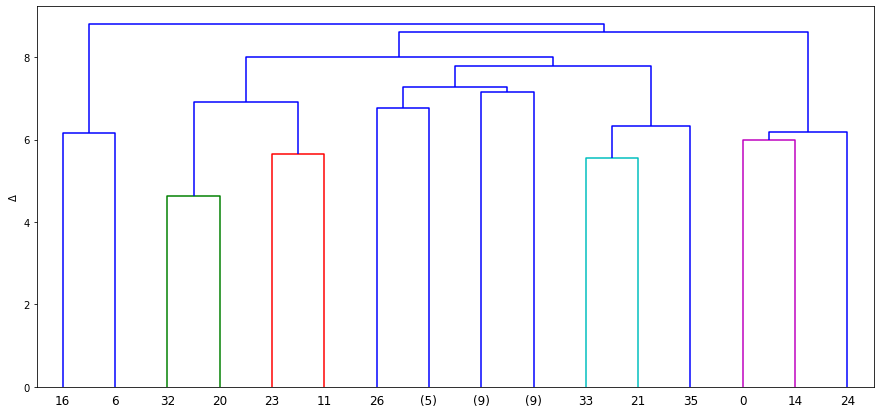

In [102]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Although the Completed Linkage method came close to Ward's method, it failed to separate the cluster into balanced groups. Plotting the dendrogram of each method shows that Ward's method divided the dataset into three groups with the highest distance for every cluster, whereas other methods failed to do so.

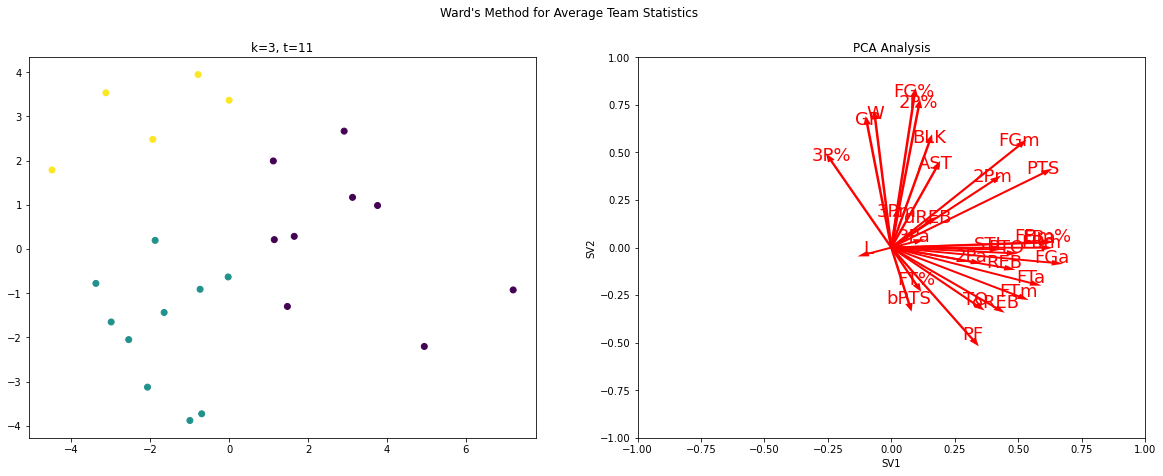

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 11, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

Observing the PC1 and PC2 of the decomposed dataset, we find the average games the team win, field goal, and 2-points percentage are the most dominant feature in principal component 2.  In comparison, the most dominant feature of principal component 1 is the average points earned per team and field goal attempted, made, and percentage. From the plot above, we infer that the 3-points percentage and personal foul are negatively correlated with each other as the two vectors have opposite directions. Teams with a higher number of 3-point shooters tend to have lesser fouls as plays inside the three-point line are more intense.

In [112]:
y_cluster = fcluster(Z_ward, t=11, criterion='distance')
df_avg_team_com['cluster'] = y_cluster

#### Radar plot

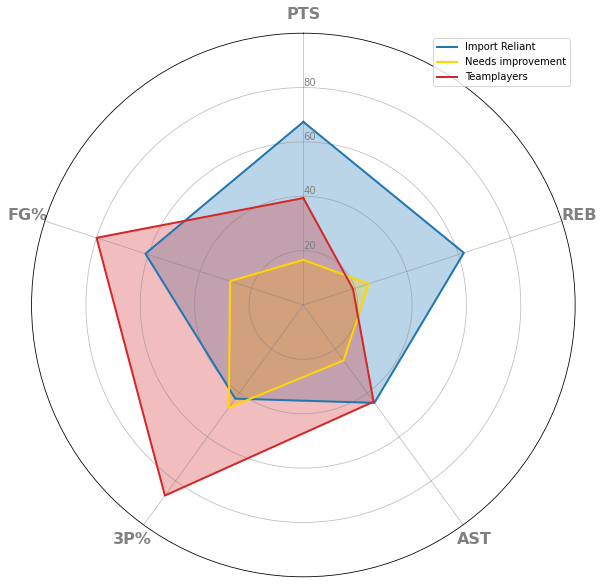

In [115]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_com[['cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']].copy()
plot_radar(df_radar, ax, ['tab:blue', 'gold', 'tab:red'])
plt.legend(['Import Reliant', 'Needs improvement', 'Teamplayers']);

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, 3-points%, and field goal percentage of each clustered team. We have identified cluster 2 as teams that need improvement as they have the lowest skillset. However, these teams have a higher 3-points % than group 1, which are identified as import reliant teams. Import reliant teams have the highest percentage of rebounds with a huge gap of 40% from other groups, and average points per game of 60%. In comparison, the last group we have identified as team players has the highest field goal and 3-points percentage.

### Average team statistics Philippine Cup

In [116]:
m1 = df_avg_team.conference == 'PH'
m2 = df_avg_team.year.astype(int) < 2020
df_avg_team_ph = df_avg_team.loc[m1 & m2].copy()
feature_raw = df_avg_team_ph.drop(['year', 'conference', 'team_name'],
                                   axis=1)
feature = StandardScaler().fit_transform(feature_raw)

#### Explore Dimensionality Reduction

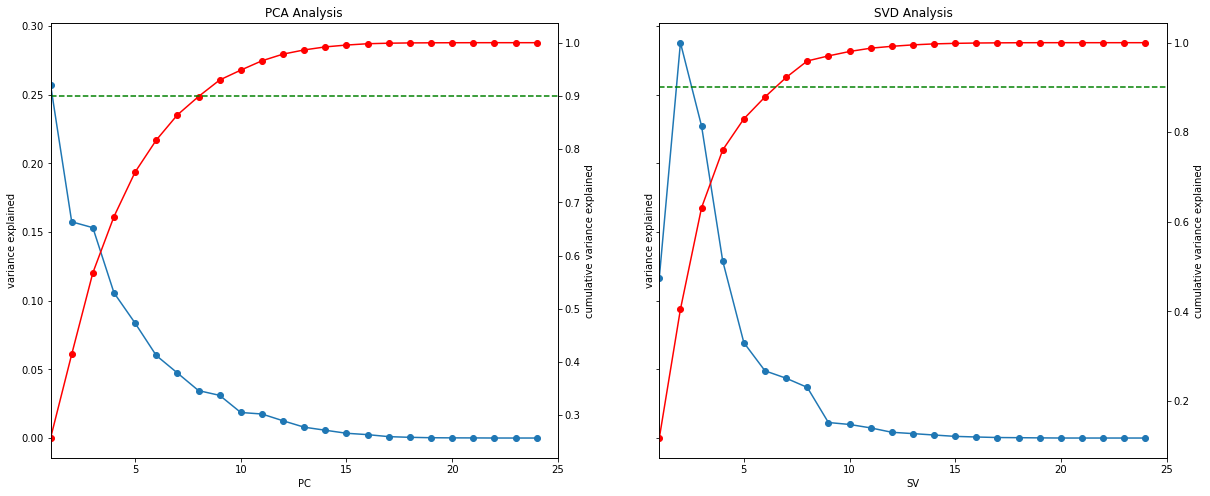

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
plot_variance(PCA(24).fit(feature),
              'PCA Analysis', ax1, xlabel='PC')
plot_variance(TruncatedSVD(feature_raw.shape[1] - 1).fit(feature_raw),
              'SVD Analysis', ax2, xlabel='SV');

In this report, we have performed a dimensional reduction analysis for the team statistics to reduce the number of dimensions. Comparing two-dimensionality reduction methods, PCA and Truncated SVD, we determined using PCA is better than using Truncated SVD even though SVD achieved an estimated 90% cumulative explained variance with just 6 components where using PCA needed 8 components. Since the height and weight have a high value compared to the other features, using SVD transforms the data biased to height and weight.

In [118]:
pca_avg = PCA(2).fit(feature)
feature_new = pca_avg.transform(feature)

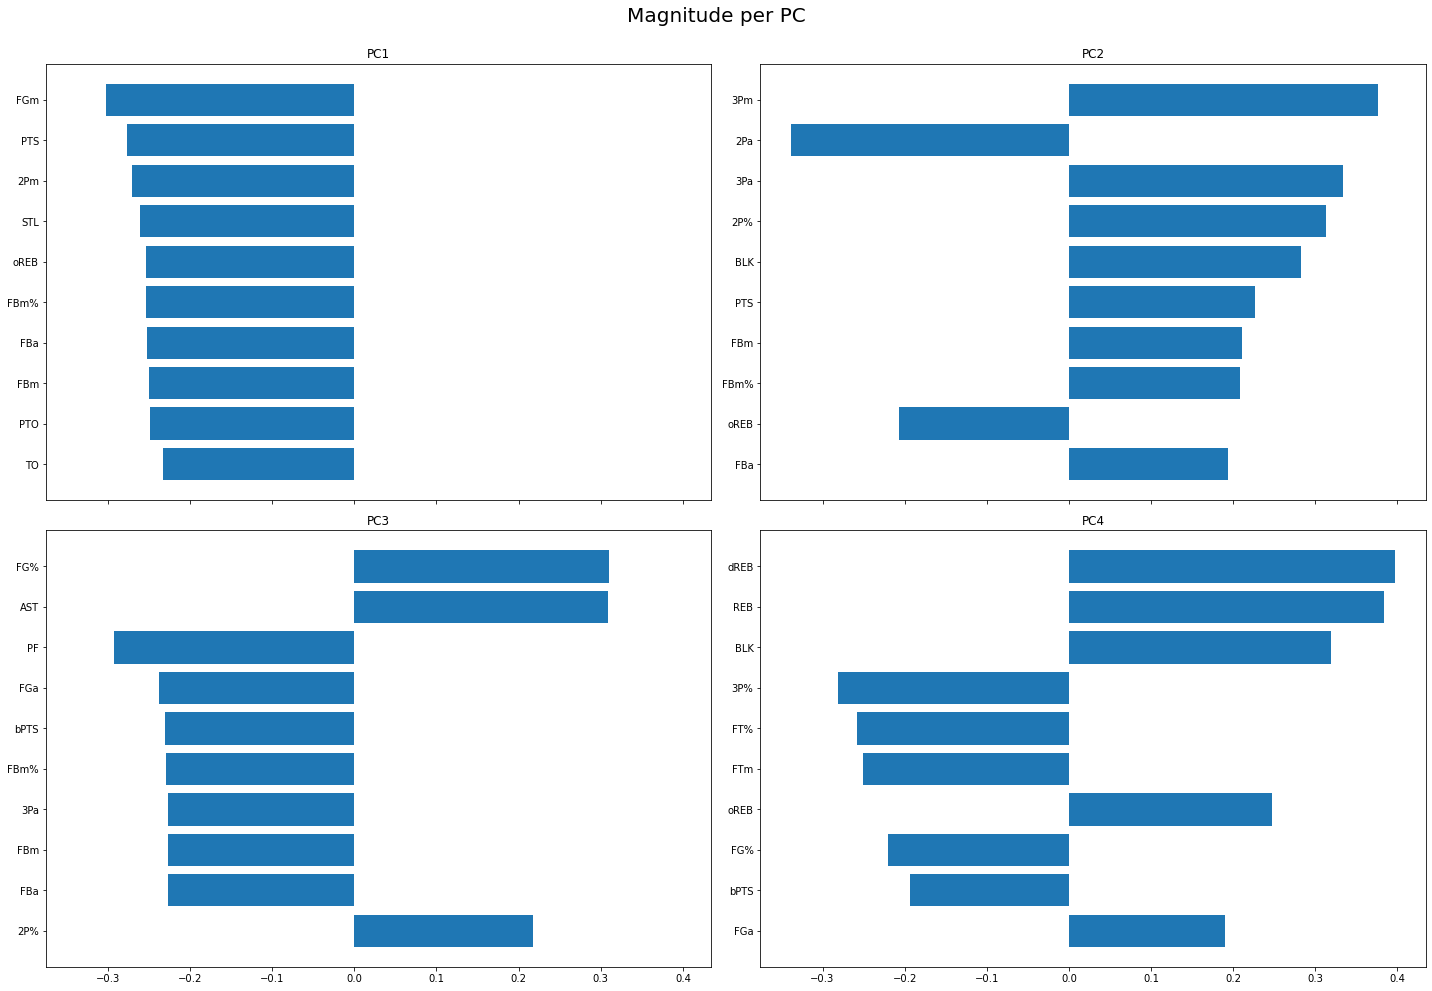

In [119]:
pca_all = PCA(4).fit(feature)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 14),
                                             sharex=True)

ax1.set_title('PC1')
plot_svd_bar(feature_raw.columns, pca_all.components_[0], ax1)

ax2.set_title('PC2')
plot_svd_bar(feature_raw.columns, pca_all.components_[1], ax2)

ax3.set_title('PC3')
plot_svd_bar(feature_raw.columns, pca_all.components_[2], ax3)

ax4.set_title('PC4')
plot_svd_bar(feature_raw.columns, pca_all.components_[3], ax4)

plt.suptitle('Magnitude per PC', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

Plotting each feature's magnitude in the principal components above, we can observe that 3-points made and attempted, 2 points made and attempted, field goals made, and average points per team are among the top features of Principal components 1 and 2. Further investigating the magnitudes in PC2, the 2-points vector has a negative magnitude heading towards a different direction of 3-points made.

#### Ward's Method

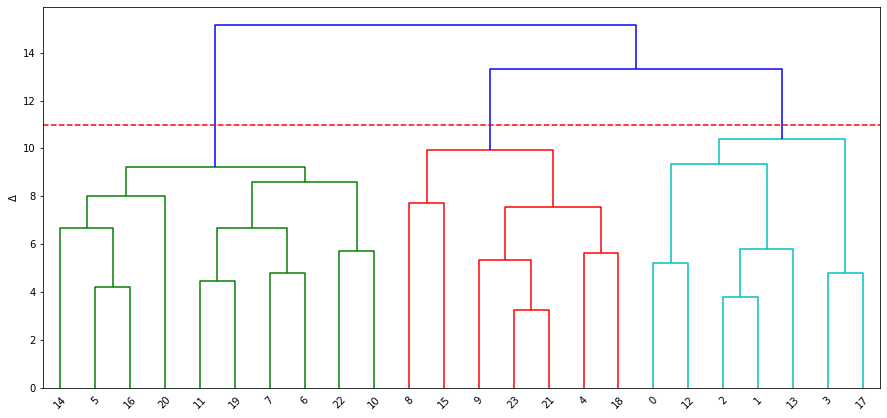

In [120]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_ward = linkage(feature, method='ward', optimal_ordering=True)
ax = plot_dendrogram(Z_ward, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Single Linkage Method

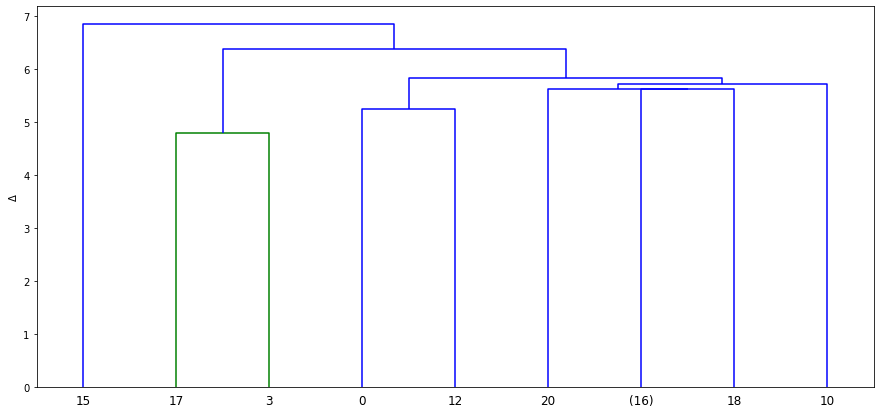

In [121]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_single = linkage(feature, method='single', optimal_ordering=True)
ax = plot_dendrogram(Z_single, ax)

#### Complete Linkage Method

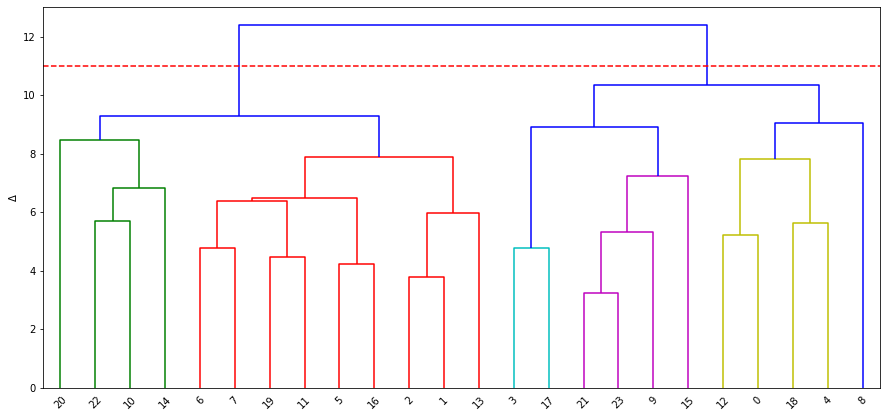

In [122]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_complete = linkage(feature, method='complete', optimal_ordering=True)
ax = plot_dendrogram(Z_complete, ax)
ax.axhline(11, c='r', linestyle='dashed');

#### Average Linkage Method

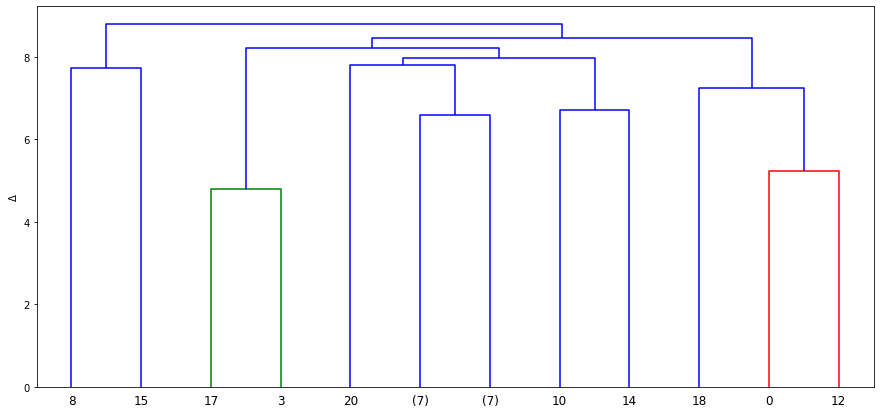

In [123]:
fig, ax = plt.subplots(figsize=(15, 7))
Z_average = linkage(feature, method='average', optimal_ordering=True)
ax = plot_dendrogram(Z_average, ax)

#### Result

Comparing different hierarchical clustering methods, we conclude that using Ward's method is the most suitable. Ward's method outperforms single, complete, and average linkage methods. Although the Completed Linkage method came close to Ward's method, it failed to separate the cluster into balanced groups. Plotting the dendrogram of each method shows that Ward's method divided the dataset into three groups with the highest distance for every cluster, whereas other methods failed to do so.

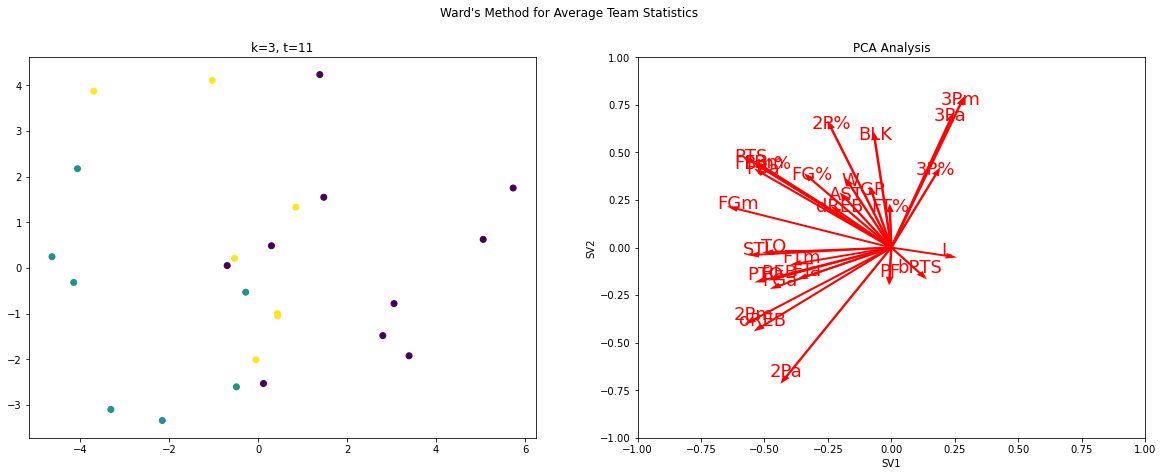

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1 = plot_cluster(feature_new, Z_ward, 11, ax1)
ax2= plot_svd(feature_raw.columns, pca_avg.components_.T, ax2)
ax2.set_title('PCA Analysis')

plt.suptitle("Ward's Method for Average Team Statistics");

Observing the PC1 and PC2 of the decomposed dataset, we find the 3-points made, attempted,  and the percentage is the most dominant feature in principal component 2.  In comparison, the most dominant feature of principal component 2 is the steals and turnovers the team has committed. From the plot above, we infer that the 3-points percentage and 2-points attempted are negatively correlated with each other as the two vectors have opposite directions. Teams with a higher number of 3-point shooters tend to have lesser players who excel inside the 3-point line.

In [124]:
y_cluster = fcluster(Z_ward, t=11, criterion='distance')
df_avg_team_ph['cluster'] = y_cluster

#### Radar plot

In [125]:
m1 = df_avg_team_ph.cluster == 1
m2 = df_avg_team_ph.year == '2019'
df_avg_team_ph.loc[m1 & m2, ['team_name', 'cluster', 'PTS',
                            'REB', 'AST', '3P%',
                            'FG%']]

team_name  cluster    PTS    REB    AST   3P%   FG%
74       ROS        1  87.95  45.58  18.84  0.32  0.39
76       TNT        1  90.64  49.14  20.00  0.28  0.39
79       ALA        1  86.38  46.69  18.15  0.31  0.40
80       NLX        1  92.25  48.67  24.67  0.34  0.42
82       MER        1  90.00  47.91  21.18  0.29  0.40

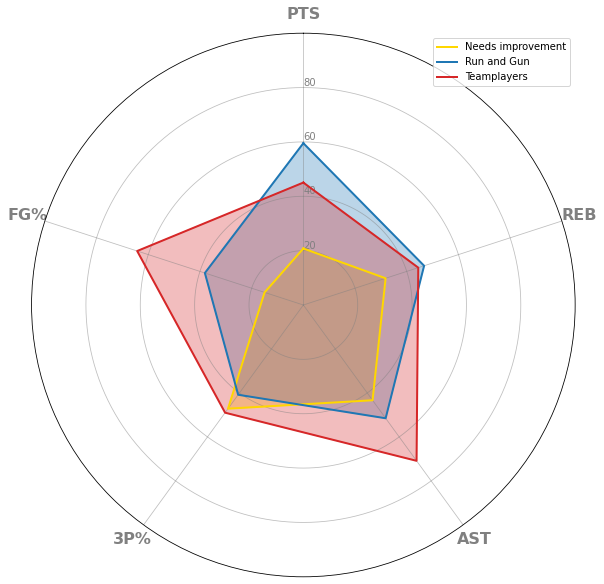

In [128]:
fig = plt.figure(figsize=(20, 10))
ax = plt.gca(polar=True)
df_radar = df_avg_team_ph[['cluster', 'PTS',
                           'REB', 'AST', '3P%',
                           'FG%']].copy()
plot_radar(df_radar, ax, ['gold', 'tab:blue', 'tab:red'])
plt.legend(['Needs improvement', 'Run and Gun', 'Teamplayers']);

The radar plot above exhibits the clustered groups' average statistics for points, rebounds, assist per game, 3-points%, and field goal percentage of each clustered team. We have identified cluster 2 as teams that need improvement as they have the lowest skillset. However, these teams have a higher 3-points % than group 1, which are identified as run and gun teams. Run and gun teams have the highest percentage of rebounds, and average points per game of 60%. In comparison, the last group we have identified as team players has the highest assist, field goal and 3-points percentage. Teams who exercise teamplays has an assist and field goal percentage higher than 60%